<a href="https://colab.research.google.com/github/ETA444/msc_mads/blob/main/premsc-thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pre-Master Thesis S4513096 #

In [ ]:
! pip install tensorflow
! pip install librosa
! pip install numpy==1.21
#! pip3 install torch==1.11.0+cpu torchvision==0.12.0+cpu torchaudio==0.11.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
! pip install transformers
! pip install yfinance
! pip install datetime
! pip install scikit-learn
! pip install nltk
#nltk.download(["names","stopwords","state_union","twitter_samples","movie_reviews","averaged_perceptron_tagger","vader_lexicon","punkt",])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 5.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 596 kB 40.5 MB/s 
     |████████████████████████████████| 101 kB 12.0 MB/s 
     |████████████████████████████████| 6.6 MB 51.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ER

In [ ]:
import numpy as np
from numpy import mean
import pandas as pd
import gzip
import nltk
from nltk.corpus import stopwords
nltk.download(["stopwords","vader_lexicon","punkt"])
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from pprint import pprint
from random import shuffle

from bs4 import BeautifulSoup
import requests
import gzip
import urllib.request
import json
import shutil
import moviepy.editor as mp
import tensorflow as tf
import keras
import librosa
import collections
import io
import glob
import os
from transformers import pipeline
from tqdm.auto import tqdm

import yfinance as yf
import datetime as datetime
from datetime import datetime
from datetime import timedelta, date
import os
import re
import matplotlib
import matplotlib.pyplot as plt

from sklearn import linear_model
import statsmodels.api as sm
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

import textwrap

from array import *

import seaborn as sns

from scipy.interpolate import make_interp_spline, BSpline

from pathlib import Path

from scipy.stats import norm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2318336/45929032 bytes (5.0%)5595136/45929032 bytes (12.2%)8503296/45929032 bytes (18.5%)11706368/45929032 bytes (25.5%)14852096/45929032 bytes (32.3%)18046976/45929032 bytes (39.3%)21241856/45929032 bytes (46.2%)24412160/45929032 bytes (53.2%)27639808/45929032 bytes (60.2%)30572544/45929032 bytes (66.6%)33161216/45929032 bytes (72.2%)35422208/45929032 bytes (77.1%)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/PMT/Datasets/Transcripts

#! mkdir Output

Mounted at /content/drive/
/content/drive/My Drive/PMT/Datasets/Transcripts


#[1] Cleaning
Note: I had to revert back to the seperate for loops because somehow when it's one it doesn't do the if statement, just randomly does some and then leaves others leaving the text with random titles, numbers and so on.

In [ ]:
def calls(path):

  line_by_line = []
  with open(path,'r') as file:
    lines = file.readlines()
    for line in lines:
      line_by_line.append(line)

  #Define PreQA and QA boundaries

  for i,line in enumerate(line_by_line):
    line = line.lower()
    if line.startswith('presentation'):
      pqa = i

    if line == "definitions\n" or "disclaimer\n":
      d = i

    if line == "questions and answers\n":
      qa = i

  PreQA = line_by_line[pqa:qa]
  QA = line_by_line[qa:d]



  #CLEANING PreQA

  for line in PreQA:
    if line.startswith('-'):
      PreQA.remove(line)
  for line in PreQA:
    if line.startswith('='):
      PreQA.remove(line)
  for line in PreQA:
    if line.endswith(']\n'):
      PreQA.remove(line)
  for line in PreQA:
    if line.startswith('Presentation\n'):
      PreQA.remove(line)
  for line in PreQA:
    if line.startswith('\n'):
      PreQA.remove(line)
  for line in PreQA:
    if line is '\n':
      PreQA.remove(line)
  for line in PreQA:
    if line.endswith(')\n'):
      PreQA.remove(line)

  clean_PreQAlines = []
  for line in PreQA:
    clean_PreQAlines.append(line.strip().replace('-','').replace('=','').replace('   ','').replace('  ',' '))

  PreQA_final = ' '.join(clean_PreQAlines)


  #CLEANING QA

  for line in QA:
    if line.startswith('-'):
      QA.remove(line)
  for line in QA:
    if line.startswith('='):
      QA.remove(line)
  for line in QA:
    if line.endswith(']\n'):
      QA.remove(line)
  for line in QA:
    if line.startswith('Questions '):
      QA.remove(line)
  for line in QA:
    if line.endswith(')\n'):
      QA.remove(line)
  for line in QA:
    if line.startswith('\n'):
      QA.remove(line)
  for line in QA:
    if line is '\n':
      QA.remove(line)

  clean_QAlines = []
  for line in QA:
    clean_QAlines.append(line.strip().replace('-','').replace('=','').replace('   ','').replace('  ',' '))

  QA_final = ' '.join(clean_QAlines)


  return (PreQA_final, QA_final)

#[2] Sentiment Analysis (NLTK)

In [ ]:
#Sentiment - "Divide and Conquer"

def sentiment_dac(PreQA_final, QA_final, chunk_size):

  stopwords = nltk.corpus.stopwords.words("english")

  #tokenize PreQA_final and QA_final, as well as exclude punctuation & stopwords
  PreQA_tkn = [w for w in word_tokenize(PreQA_final) if w.isalpha() if w.lower() not in stopwords]
  QA_tkn = [w for w in word_tokenize(QA_final) if w.isalpha() if w.lower() not in stopwords]

  all_tokens = PreQA_tkn + QA_tkn
  bla = ' '.join(all_tokens)
  #chunkify into chunks of x
  PreQA_chunks = textwrap.wrap(' '.join(PreQA_tkn), chunk_size)
  QA_chunks = textwrap.wrap(' '.join(QA_tkn), chunk_size)

  #get sentiment polarity scores (compound, neg, neu, pos)
  sia = SentimentIntensityAnalyzer()
  PreQA_ps_perchunk = []
  for chunk in PreQA_chunks:
    PreQA_ps_perchunk.append(sia.polarity_scores(chunk))

  QA_ps_perchunk = []
  for chunk in QA_chunks:
    QA_ps_perchunk.append(sia.polarity_scores(chunk))

  #mean compound score of all chunks
  PreQA_cs = mean([chunk_ps['compound'] for chunk_ps in PreQA_ps_perchunk]) / chunk_size *100
  QA_cs = mean([chunk_ps['compound'] for chunk_ps in QA_ps_perchunk]) / chunk_size *100



  #define if positive (1) or negative (0) - for fun - arbitrary

  if PreQA_cs > 0:
    PreQA_np = 1
  else:
    PreQA_np = 0

  if QA_cs > 0:
    QA_np = 1
  else:
    QA_np = 0

  return (PreQA_cs, QA_cs, PreQA_np, QA_np, bla, all_tokens)


In [ ]:
#Determine optimal chunk size

#list of chunk sizes ranging from 50 - 800 with interval of 50
#lower bound - 75 characters is the average length of a sentence
#upper bound - 512 characters is the upper limit of sentiment algorithms, however we choose 600 to showcase how the c-score barely changes afterwards
chunk_sizes = list(range(75,800,50))
chunk_sizes

#calls function necessary to run sentiment_dac
path = '/content/drive/My Drive/PMT/Datasets/Transcripts/INTC/2016-Jan-14-INTC.txt'
preqa,qa = calls(path)

PreQA_compound = []
QA_compound = []

for cs in chunk_sizes:
  cs_test = sentiment_dac(preqa,qa,cs)
  PreQA_compound.append(sorted( {cs_test[0],cs} ))
  QA_compound.append(cs_test[1])



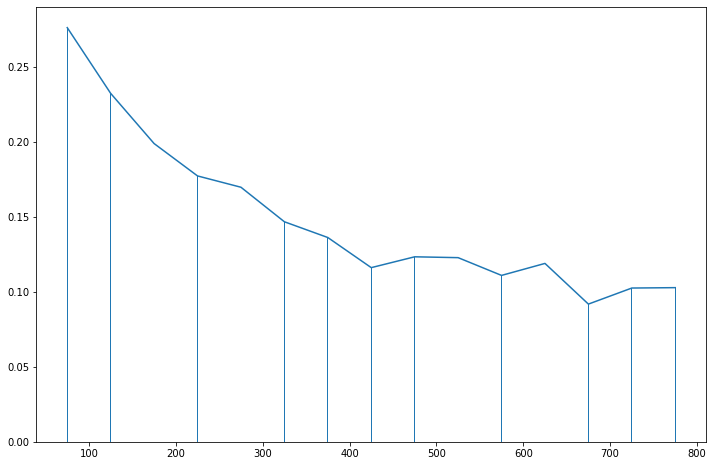

In [ ]:
compound_score, chunk_size = zip(*PreQA_compound) # unpack a list of pairs into two tuples

#plt.plot(chunk_size,compound_score)
plt.figure(figsize=(12,8))
plt.bar(chunk_size,compound_score)
plt.plot(chunk_size,compound_score)
plt.show()


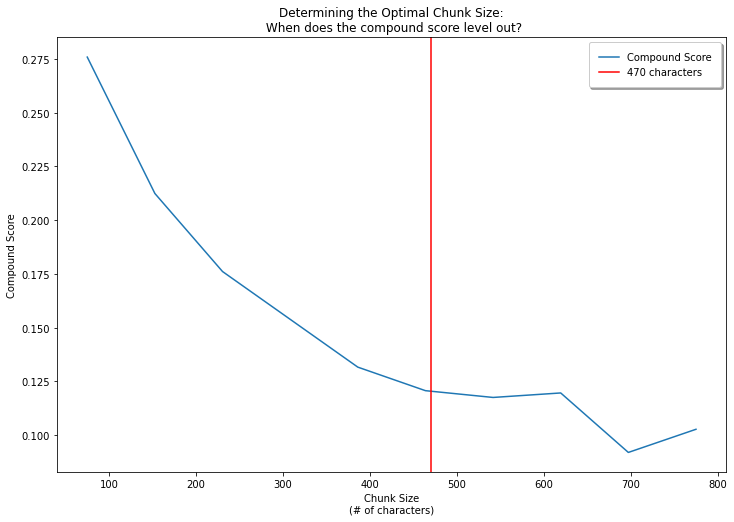

In [ ]:
# 10 represents number of points to make between T.min and T.max
xnew = np.linspace(np.array(chunk_size).min(), np.array(chunk_size).max(), 10)

spl = make_interp_spline(chunk_size, compound_score, k=3)  # type: BSpline
compoundscore_smooth = spl(xnew)

plt.figure(figsize=(12,8))
plt.plot(xnew, compoundscore_smooth, label = "Compound Score")
plt.title("Determining the Optimal Chunk Size:\n When does the compound score level out?")
plt.xlabel("Chunk Size\n(# of characters)")
plt.ylabel("Compound Score")
plt.axvline(x=470,color='red').set_label("470 characters")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.savefig("/content/drive/My Drive/PMT/Datasets/Output/optimal_chunksize-plot")

plt.show()

In [ ]:
PreQA_compound

[[0.2759089743589744, 75],
 [0.2321148387096774, 125],
 [0.19868701298701294, 175],
 [0.17711633986928102, 225],
 [0.16957792207792208, 275],
 [0.14658076923076924, 325],
 [0.1360825396825397, 375],
 [0.11601960784313724, 425],
 [0.12324078947368419, 475],
 [0.12267301587301586, 525],
 [0.11084844720496896, 575],
 [0.11882933333333331, 625],
 [0.09173703703703703, 675],
 [0.10243385579937304, 725],
 [0.10269290322580647, 775]]

#[3] ΔVolatility

In [ ]:
#Volatility Function

def volatility(filename,delta):

    #IV1 and IV2 -------------------------------------------------------------------------

    #ticker from filename
    ticker = filename.split('-')[-1].split('.')[0]

    #calldate from filename
    calldate = datetime.strptime(filename[:11], '%Y-%b-%d')

    beforedate = calldate - timedelta(days=10)
    afterdate = calldate + timedelta(days=10)

    df = yf.download(ticker, start=calldate-timedelta(days=delta), end=calldate+timedelta(days=delta))
    df['Volatility'] = df['Close'].pct_change().rolling(10).std().values

    #compute Δvolatility
    avgvol_before = mean(df['Volatility'].loc[beforedate:calldate].values.tolist())
    avgvol_after = mean(df['Volatility'].loc[calldate:afterdate].values.tolist())

    vol_delta = avgvol_after - avgvol_before

    #binary volatility increase variable: 0=no increase & 1=increase
    if avgvol_after > avgvol_before:
      vol_increase = 1
    else:
      vol_increase = 0

    #plot of volatility + save plot to folder Volatility Graphs
    savepath = '/content/drive/My Drive/PMT/Datasets/Output/Volatility Graphs/' + filename.split('.')[0] + '-plot'
    f = plt.figure()
    df["Volatility"].loc[beforedate:afterdate].plot(title="10 days close price historical volatility before & after the Earning's Call",figsize=(12,8))
    plt.axvline(x=calldate,color='red').set_label("Earning's Call Date")
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
    plt.savefig(savepath);

    # NASDAQ Control Variable -------------------------------------------------------------

    df_nasdaq = yf.download("NDAQ", start=calldate-timedelta(days=delta), end=calldate+timedelta(days=delta))
    df_nasdaq['Volatility'] = df_nasdaq['Close'].pct_change().rolling(10).std().values

    #compute Δvolatility
    avgvol_before_nasdaq = mean(df_nasdaq['Volatility'].loc[beforedate:calldate].values.tolist())
    avgvol_after_nasdaq = mean(df_nasdaq['Volatility'].loc[calldate:afterdate].values.tolist())

    nasdaq_vol_delta = avgvol_after_nasdaq - avgvol_before_nasdaq

    #binary volatility increase variable: 0=no increase & 1=increase
    if avgvol_after_nasdaq > avgvol_before_nasdaq:
      nasdaq_vol_increase = 1
    else:
      nasdaq_vol_increase = 0



    return vol_delta, vol_increase, nasdaq_vol_delta, nasdaq_vol_increase
#    return df.loc[beforedate:afterdate]

# Create Dataframe with IVs and DV
*Note on SENTIMENT: we have Compound score OR we can use a binary Negative-Positive variable.*

*   **IV 1:** PreQA Sentiment
*   **IV 2:** QA Sentiment
*   **DV:** Δ-Volatility
*   **CV:** NASDAQ Δ-Volatility





  0%|          | 0/12 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

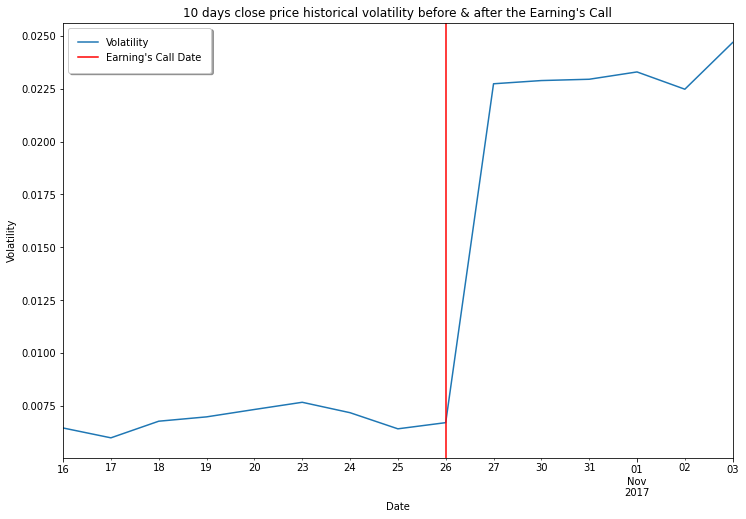

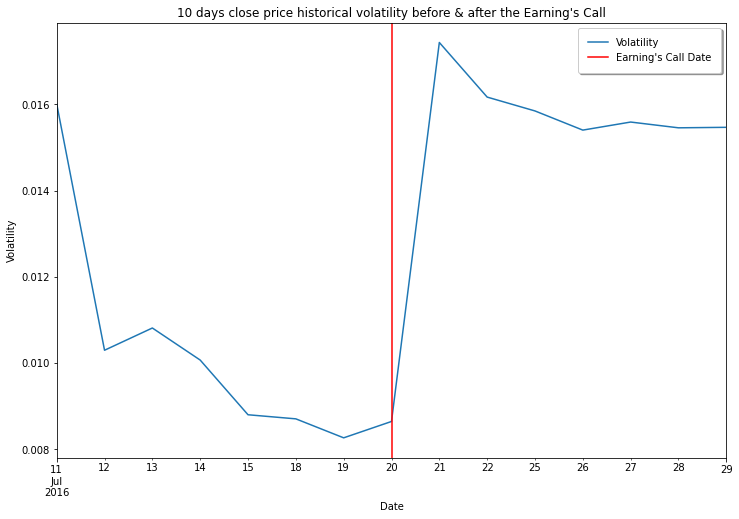

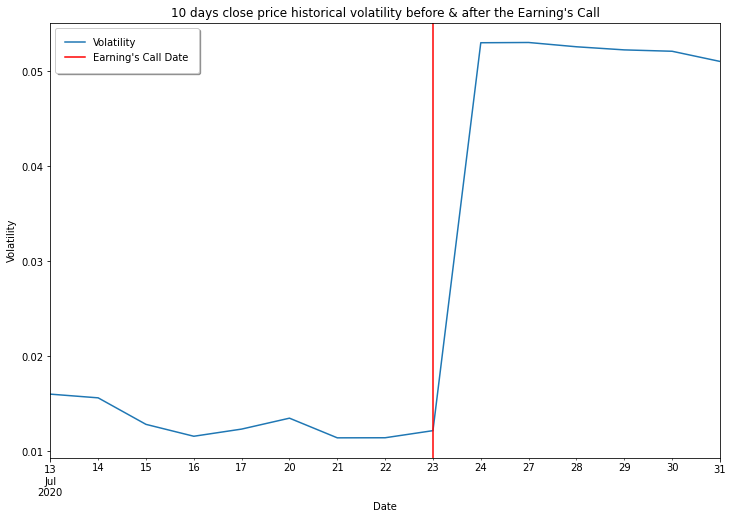

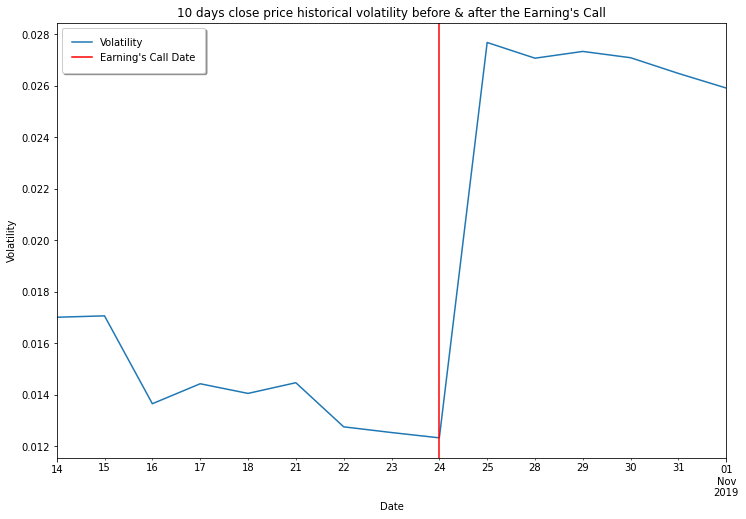

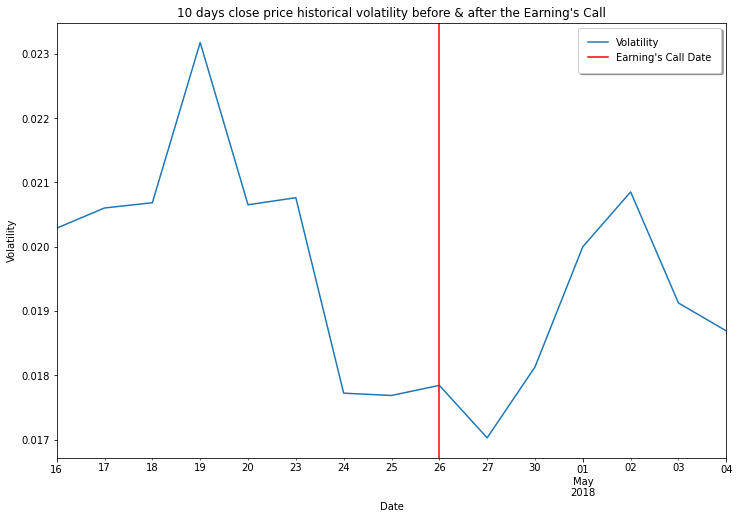

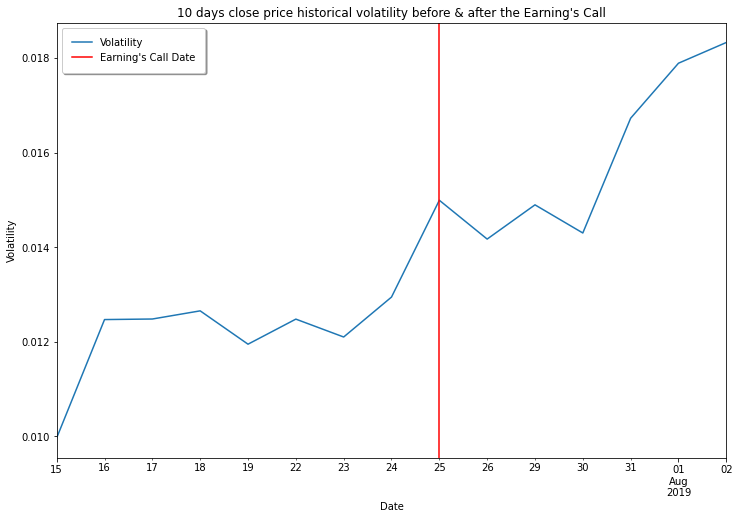

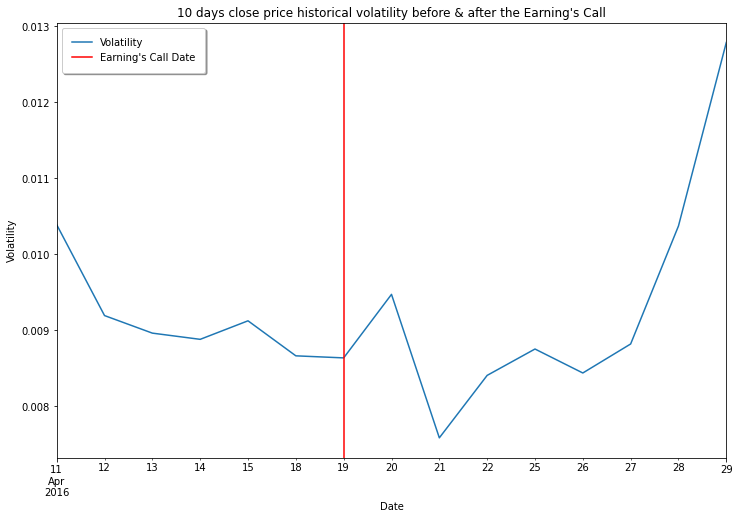

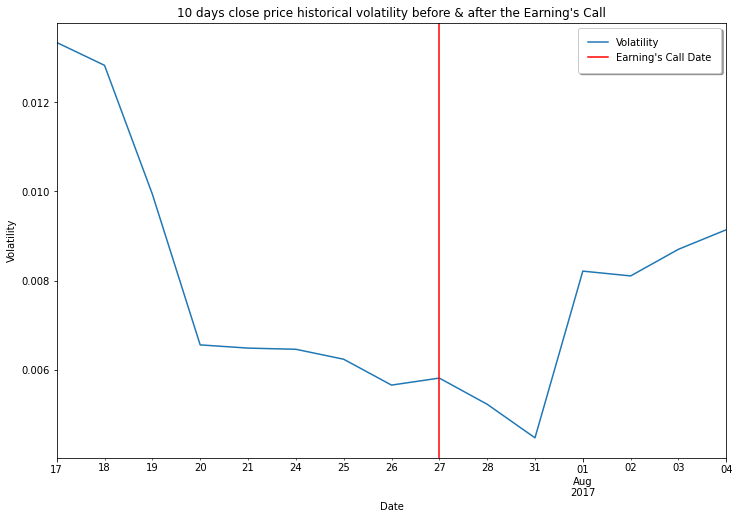

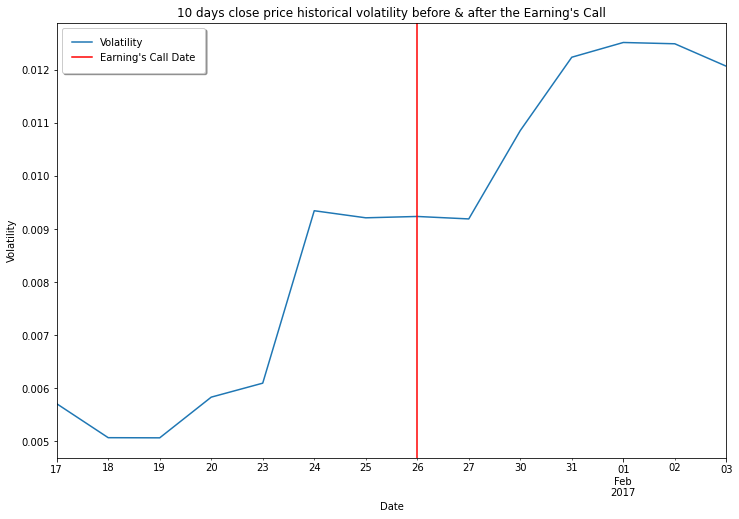

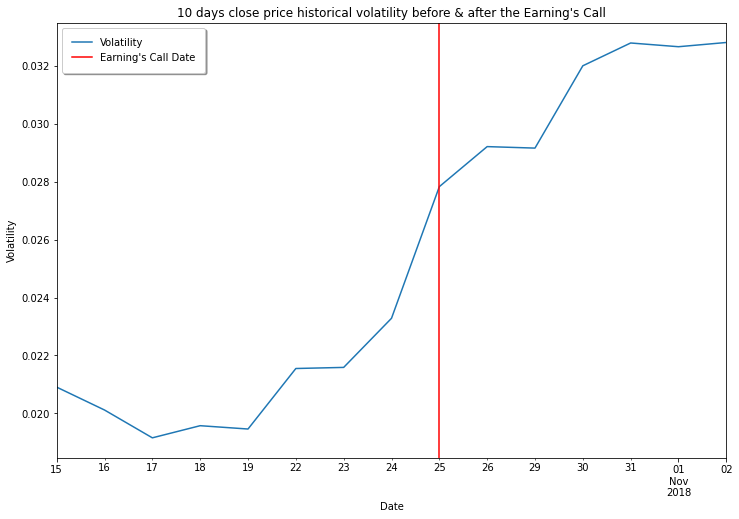

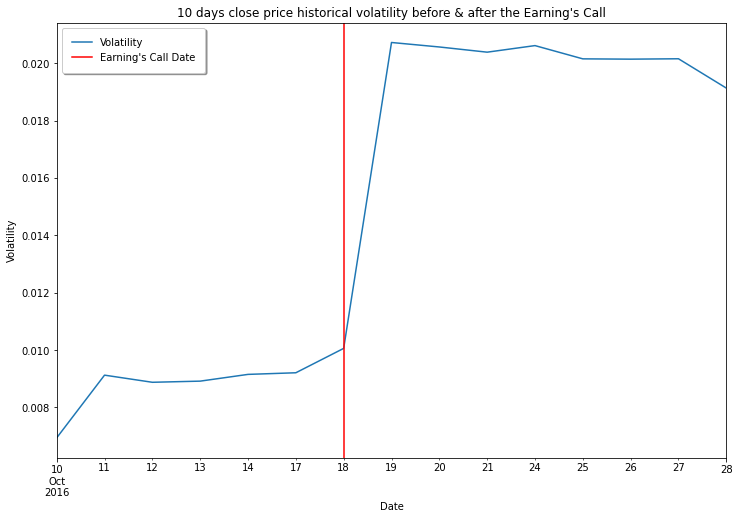

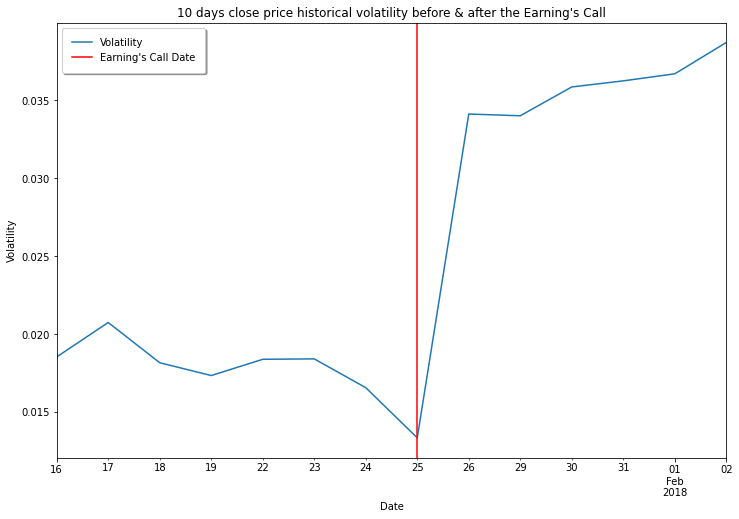

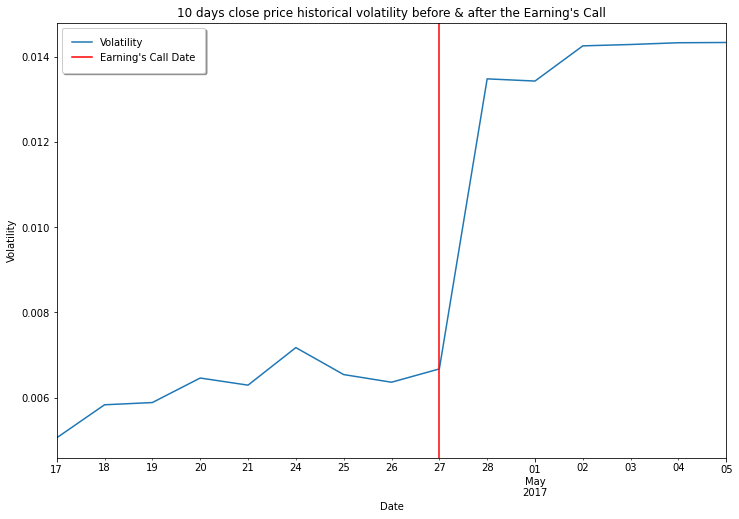

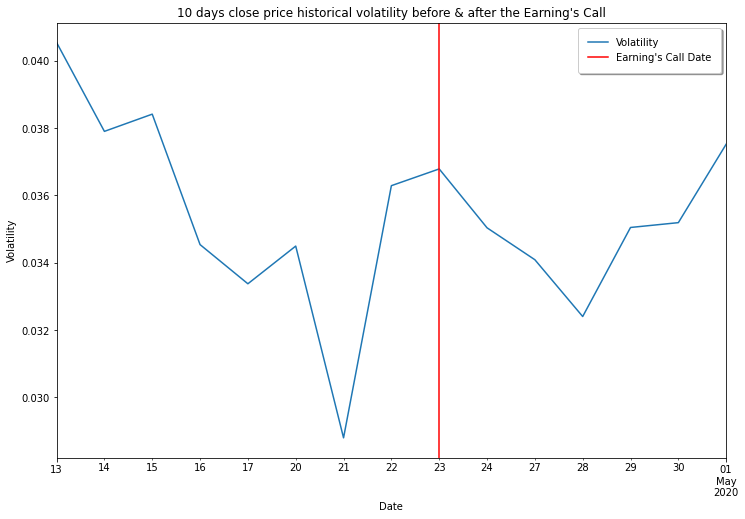

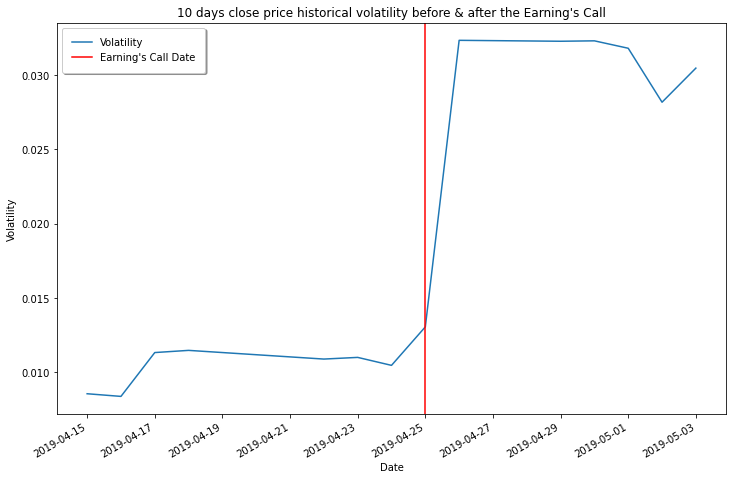

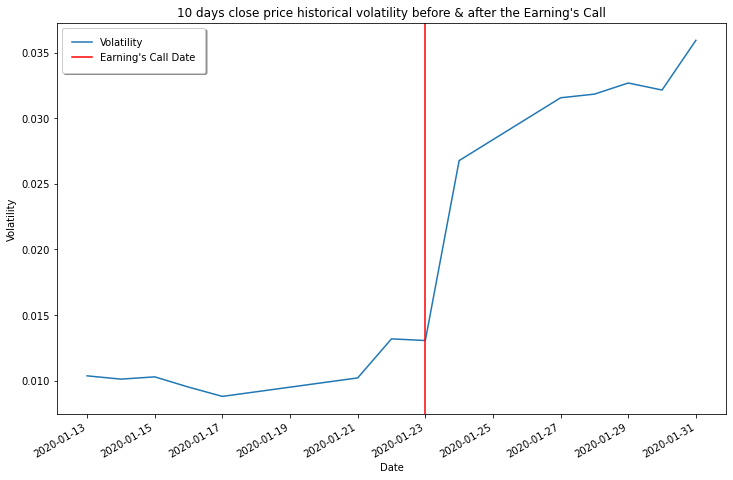

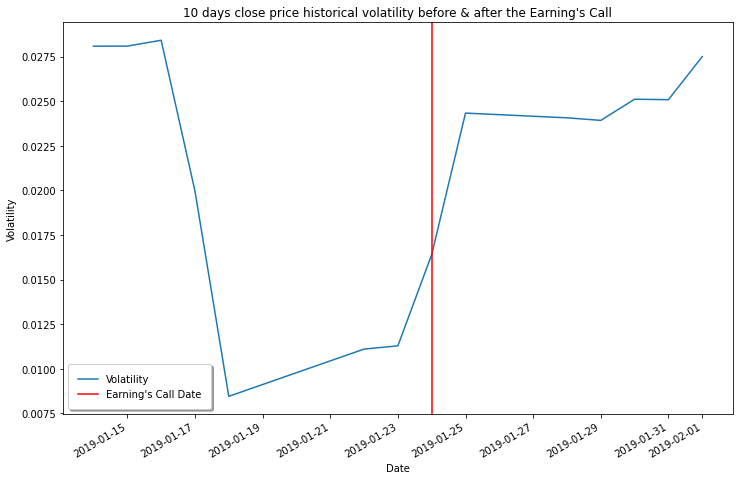

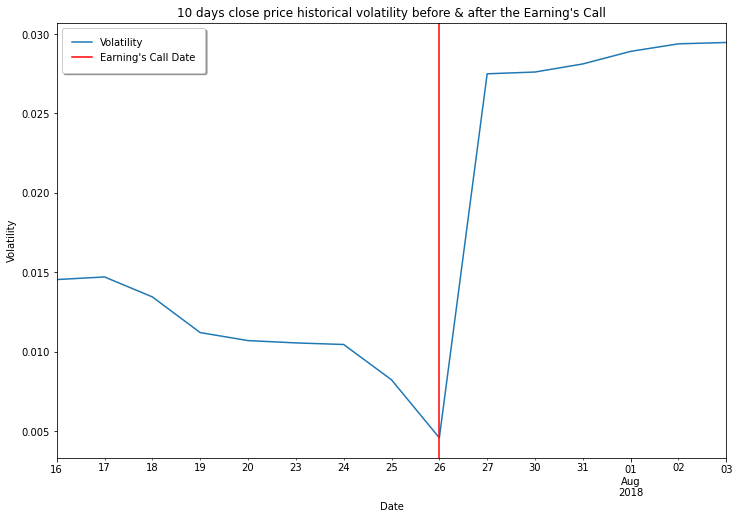

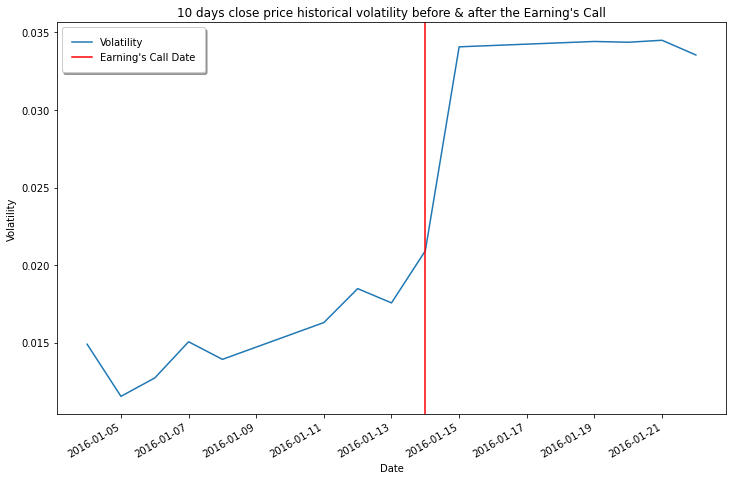

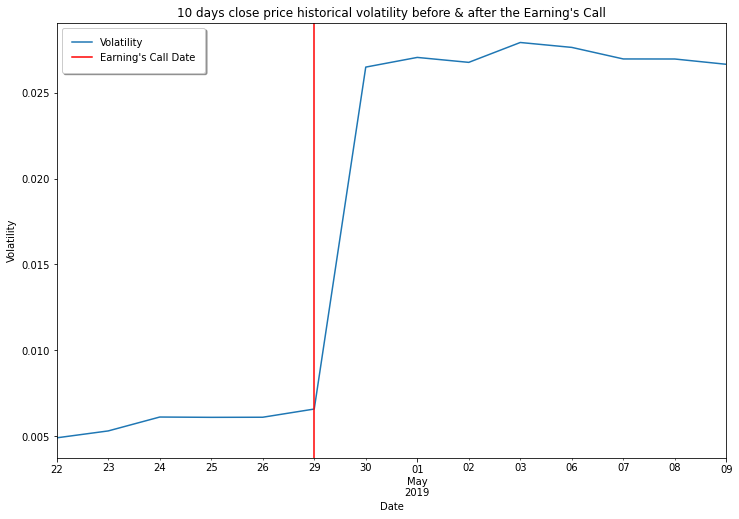

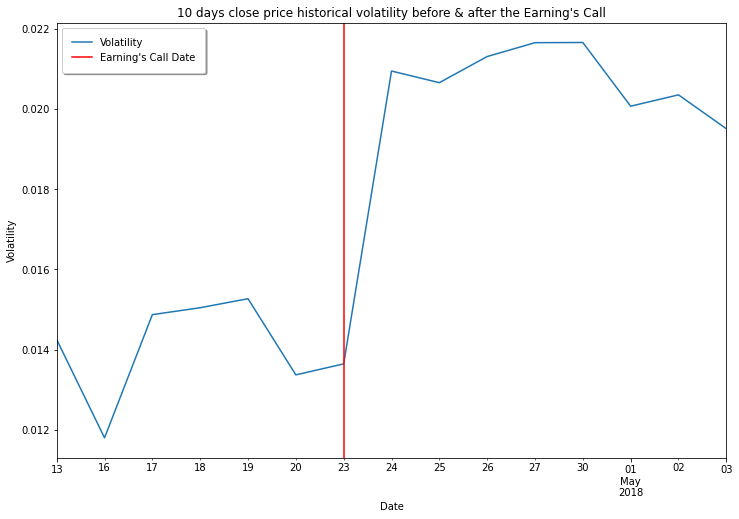

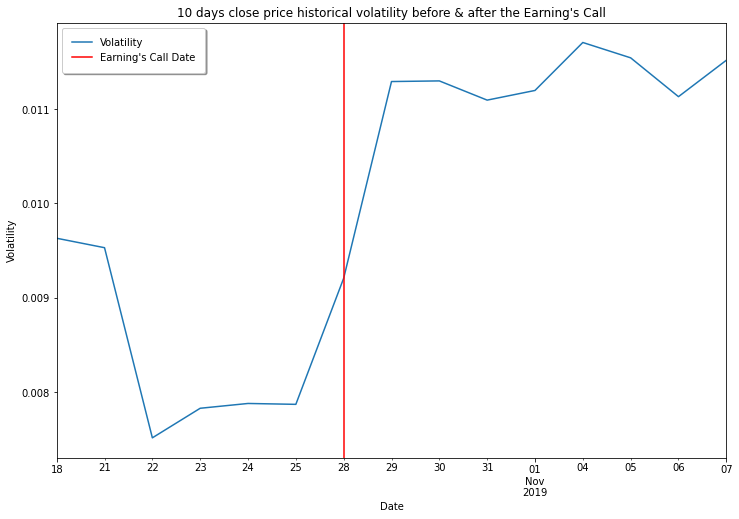

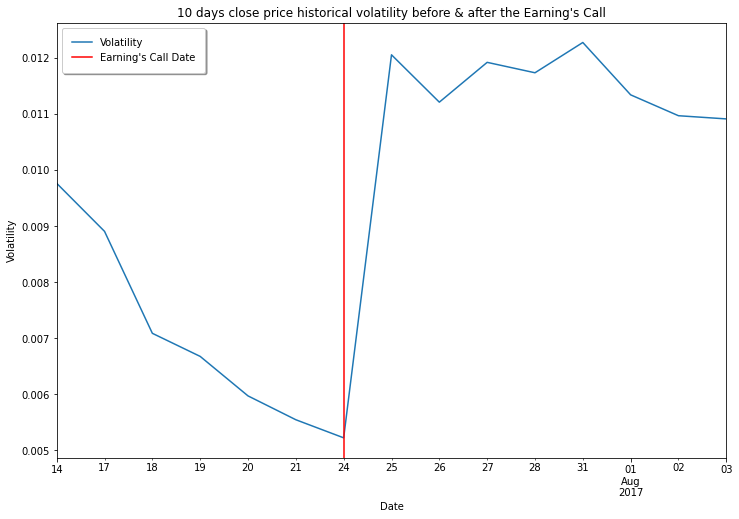

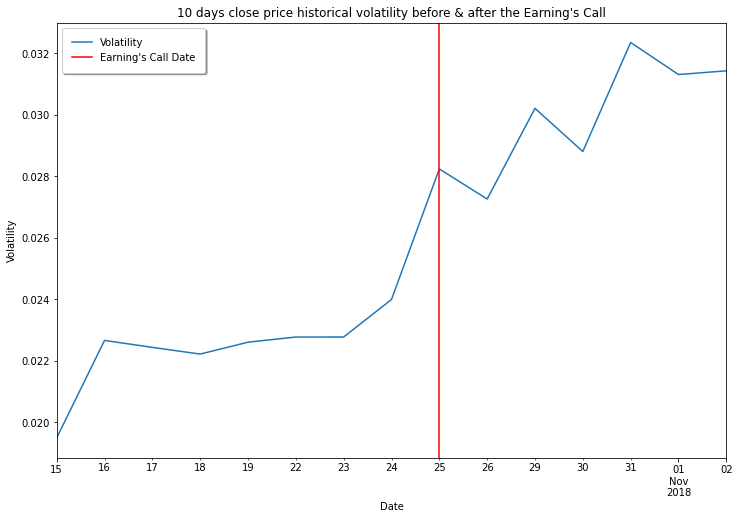

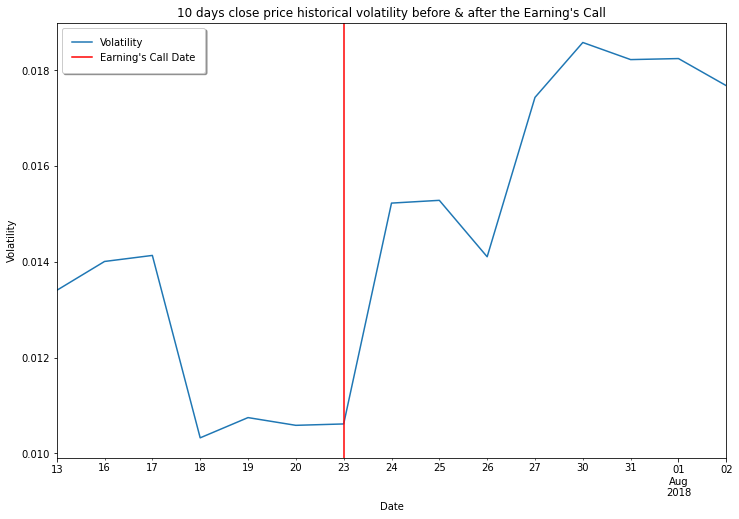

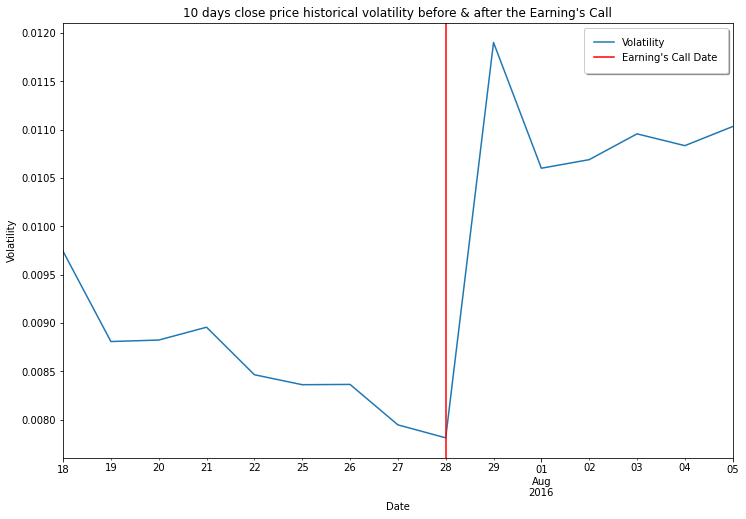

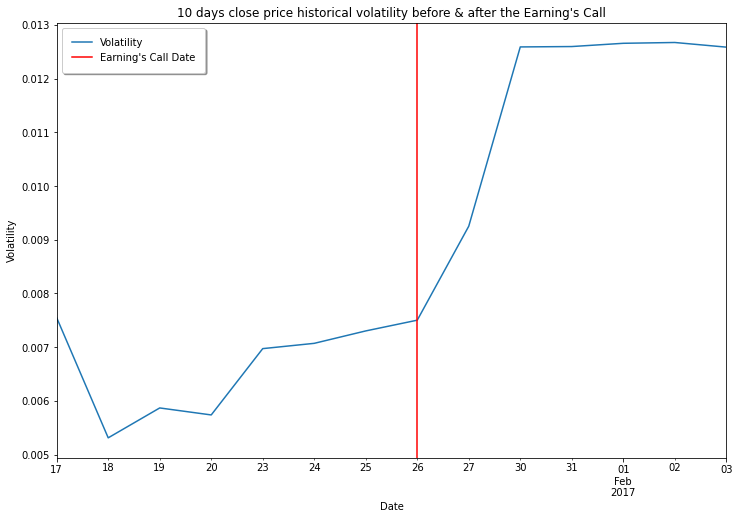

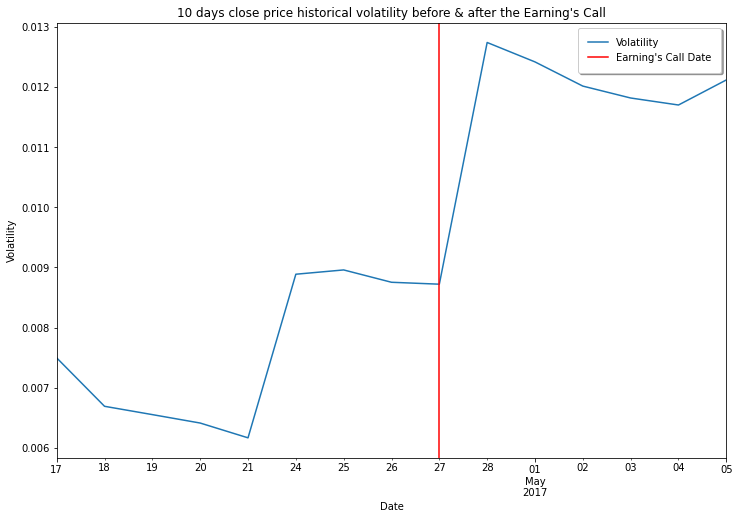

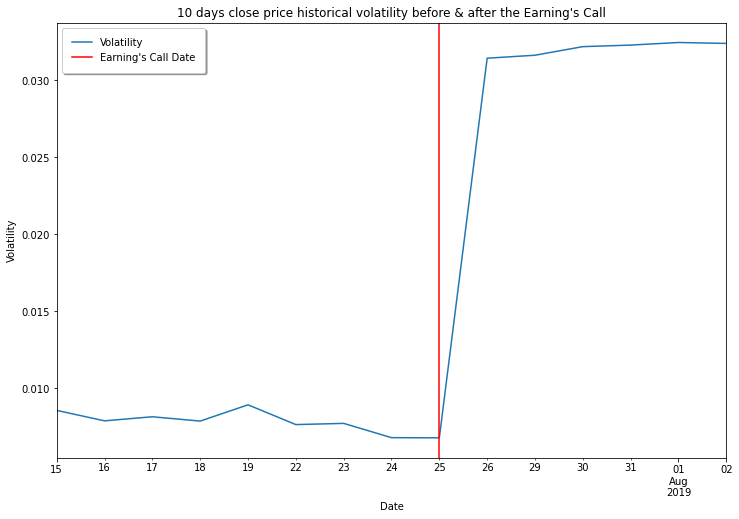

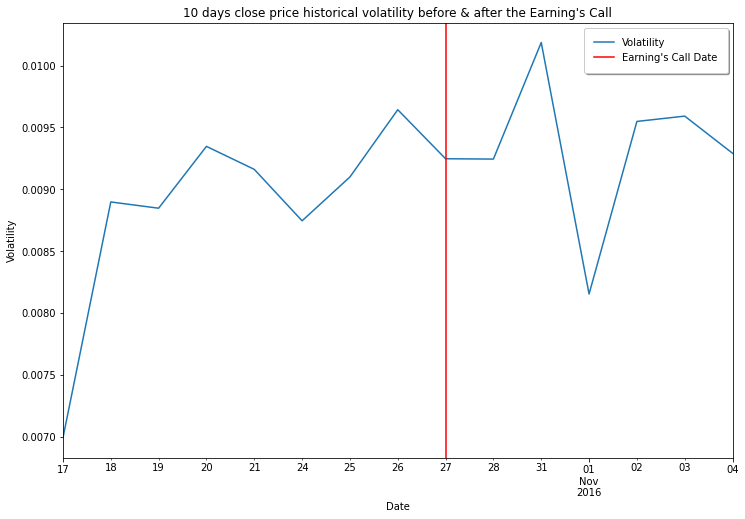

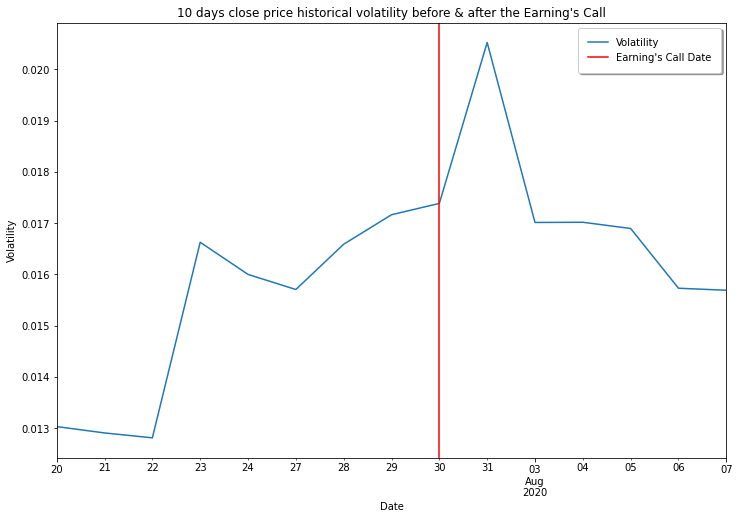

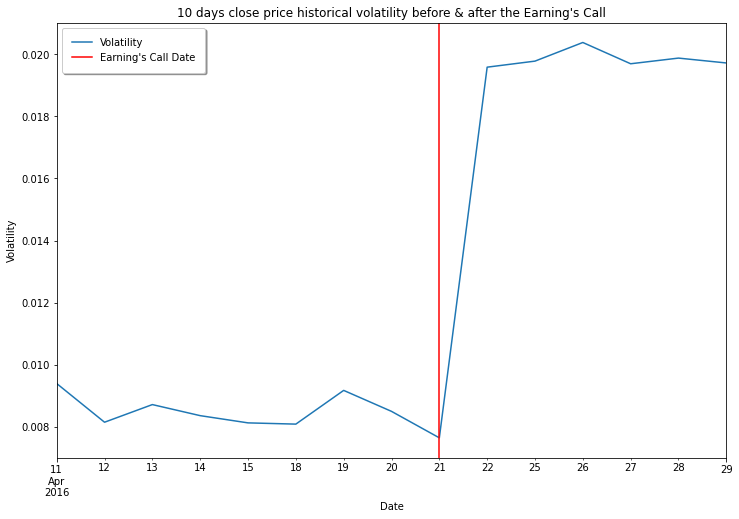

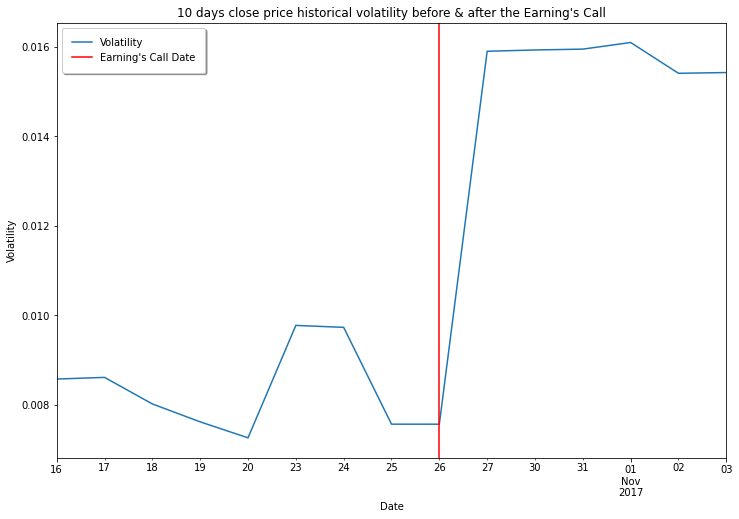

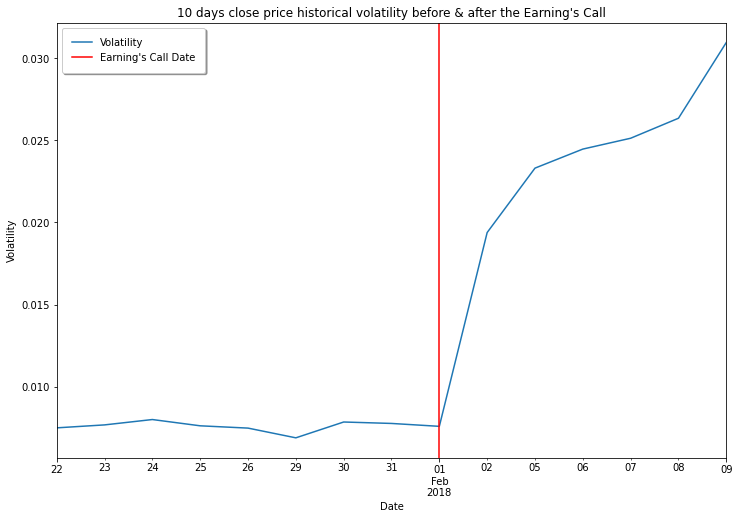

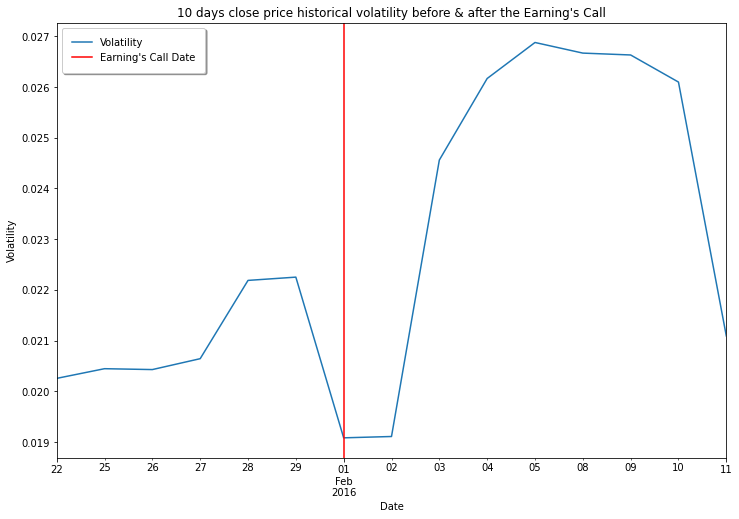

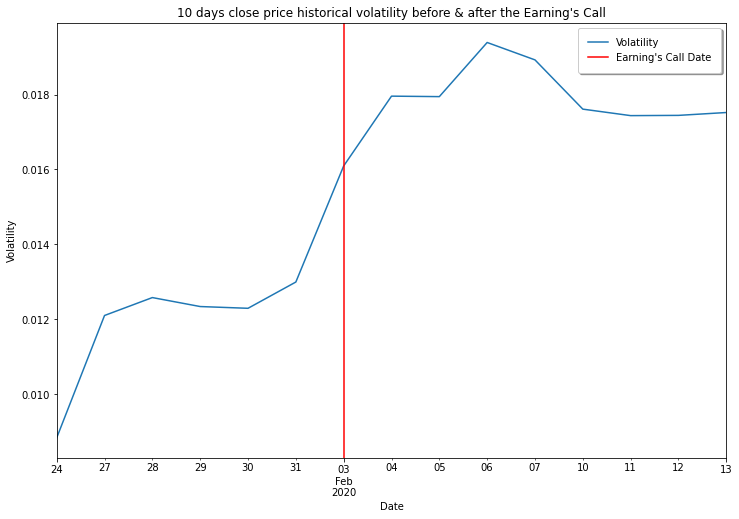

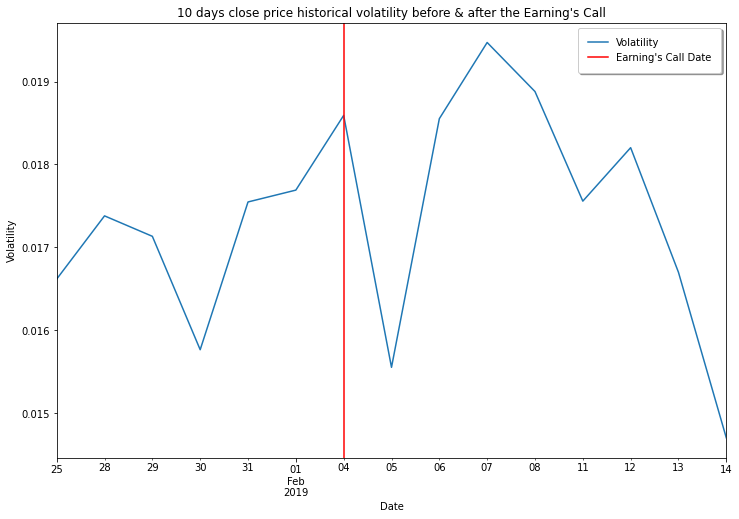

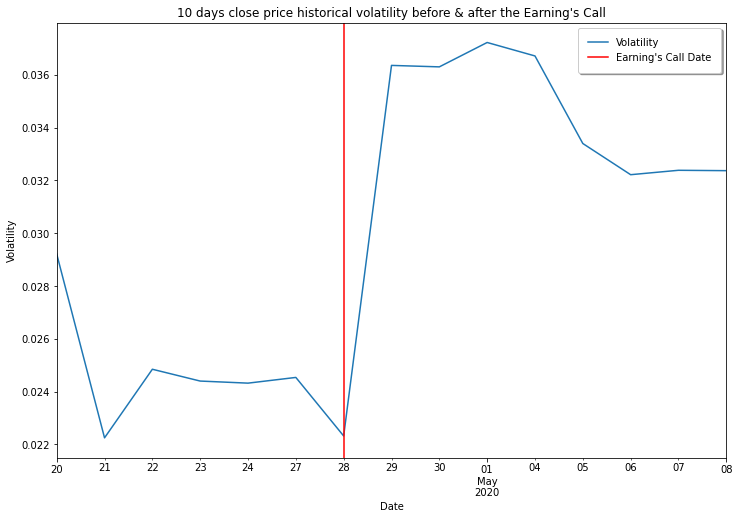

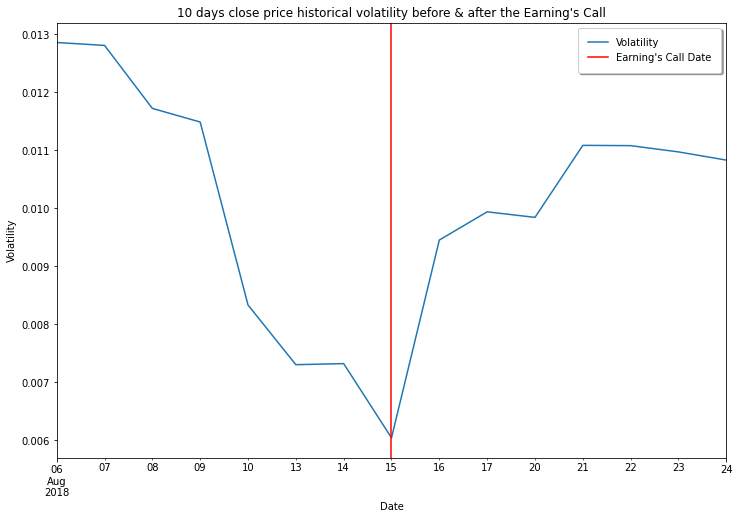

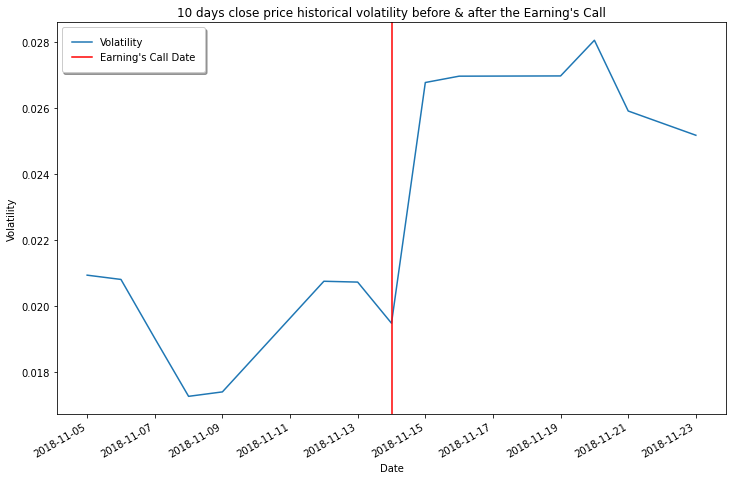

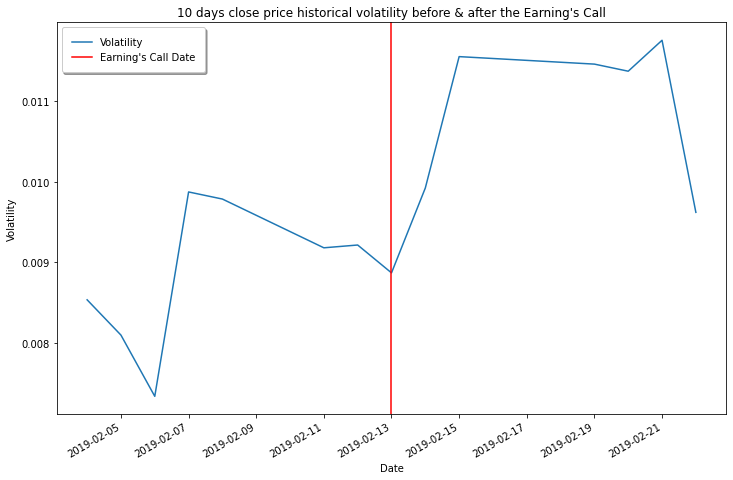

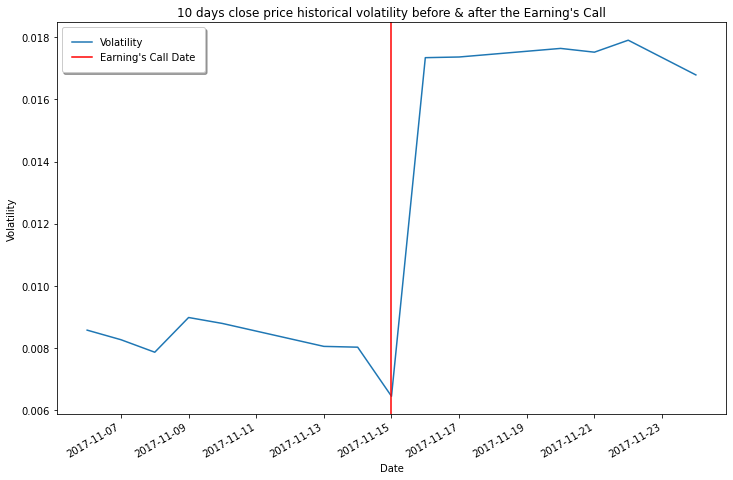

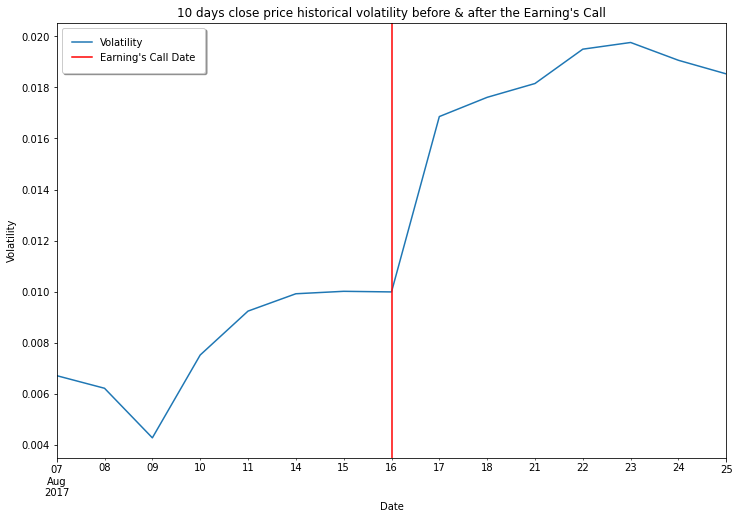

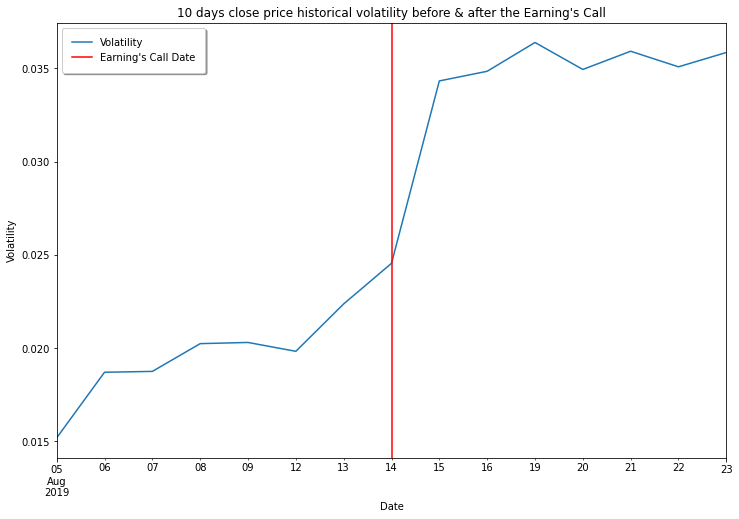

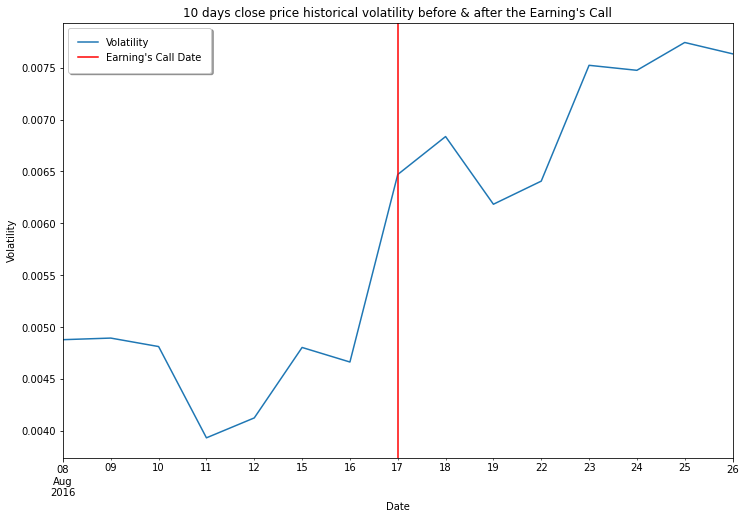

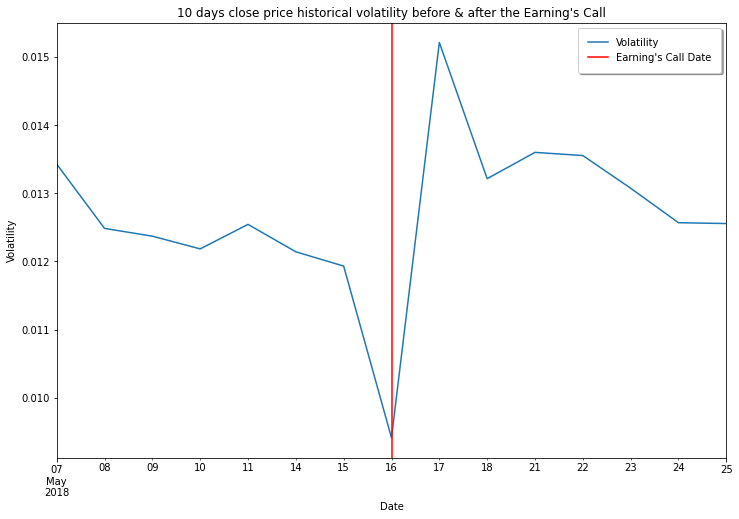

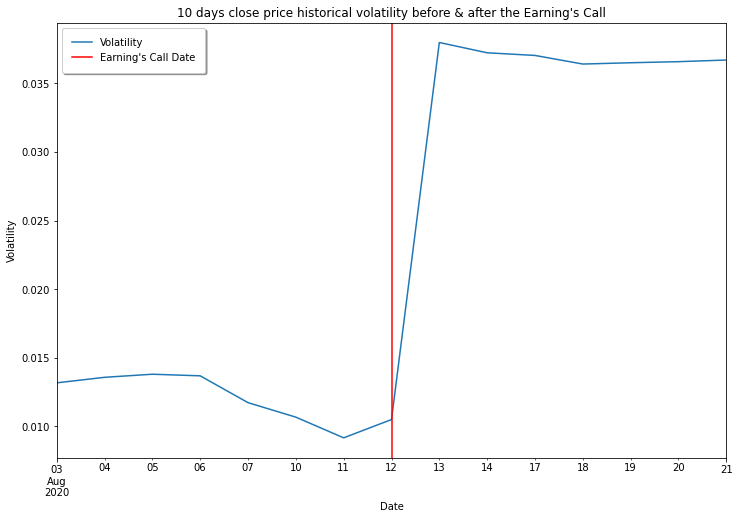

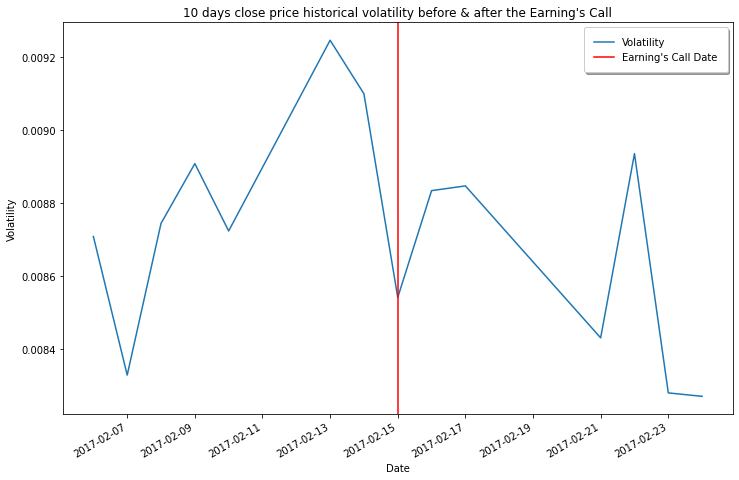

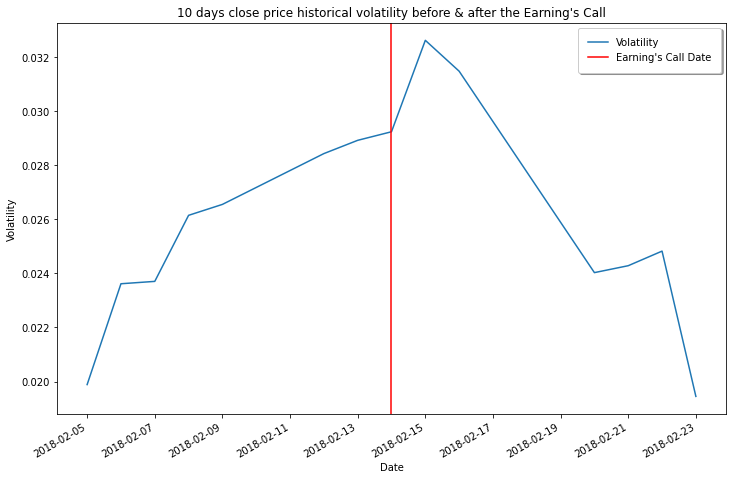

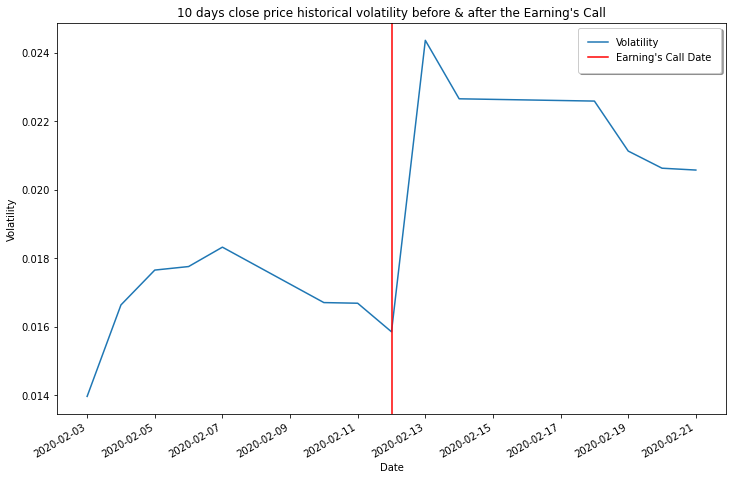

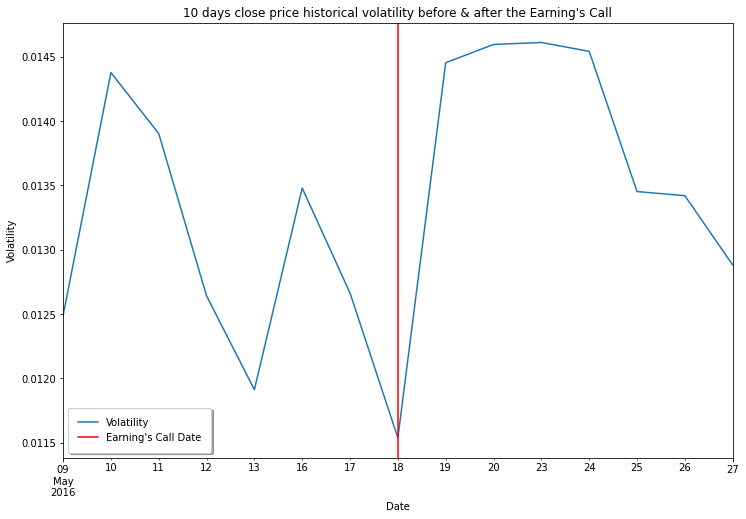

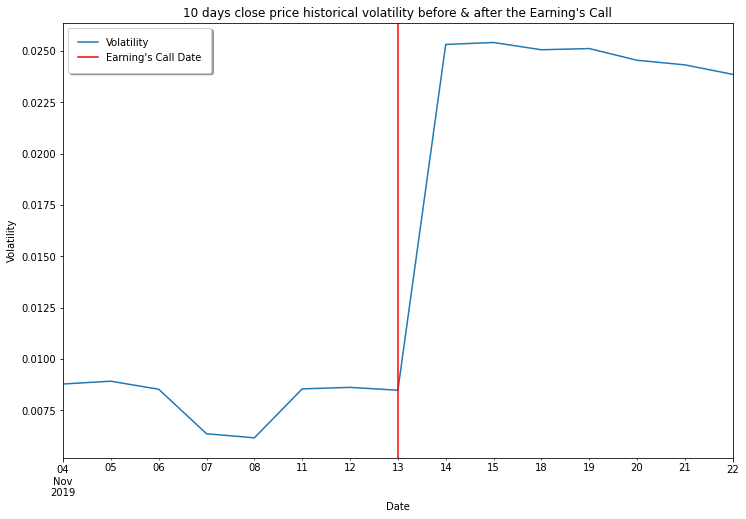

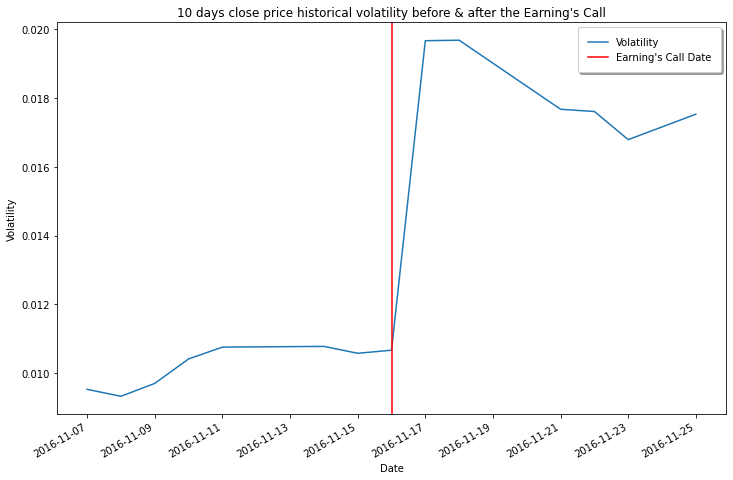

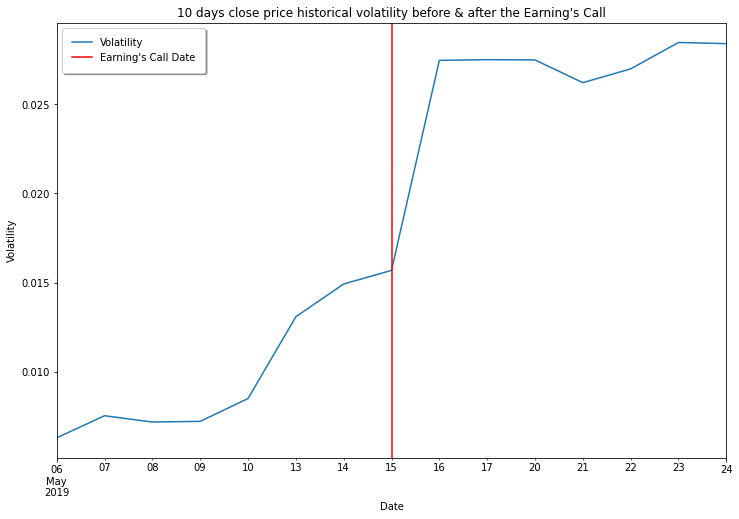

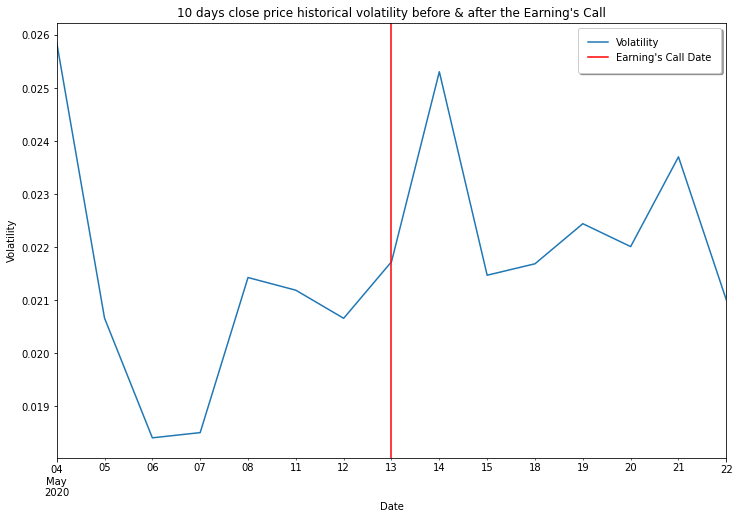

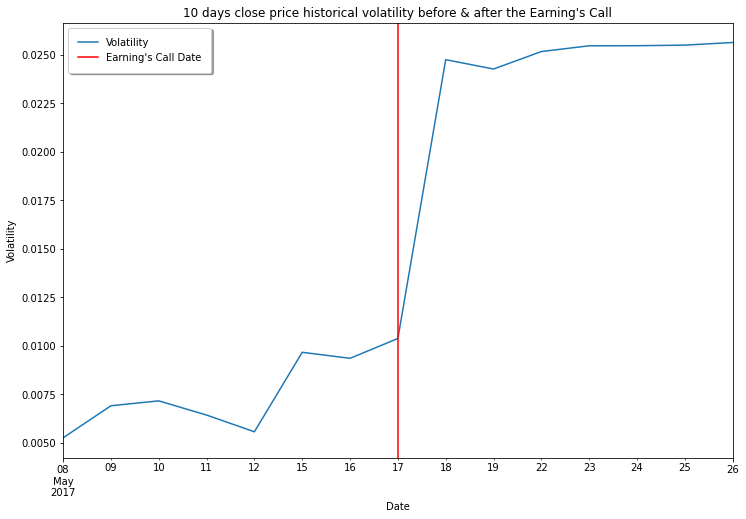

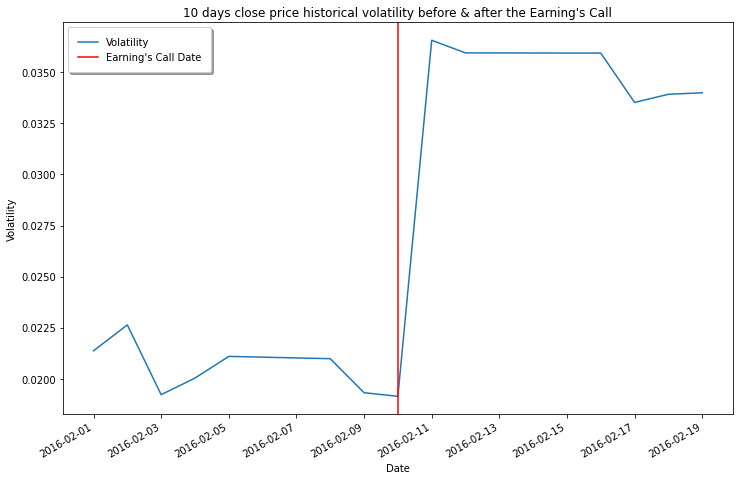

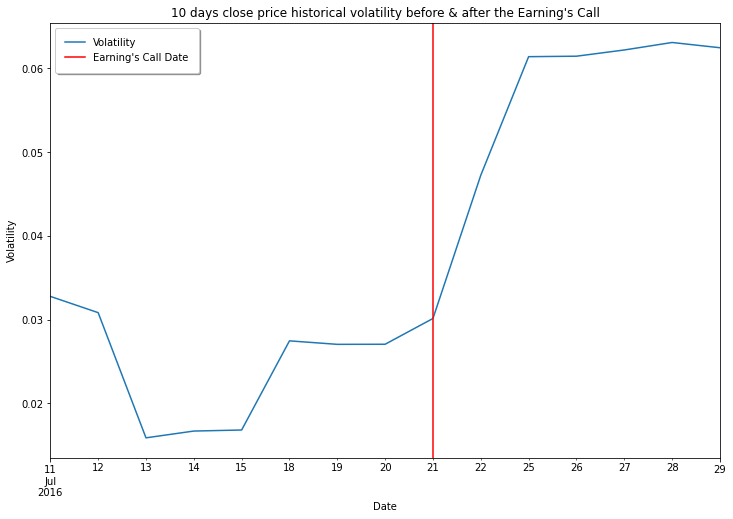

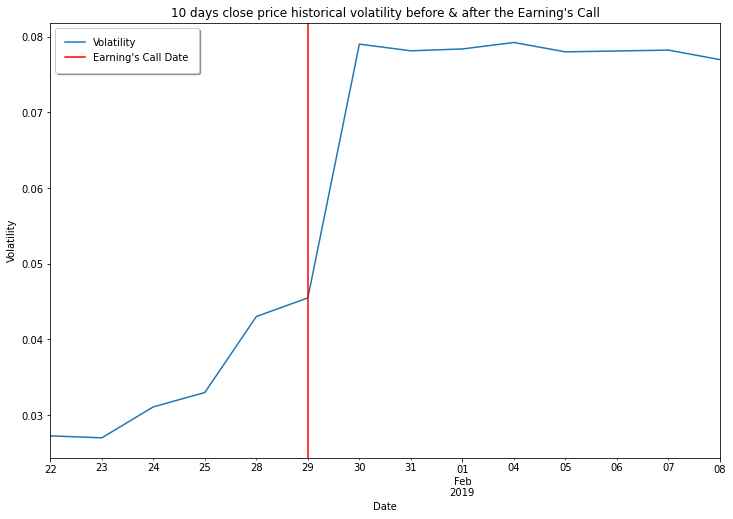

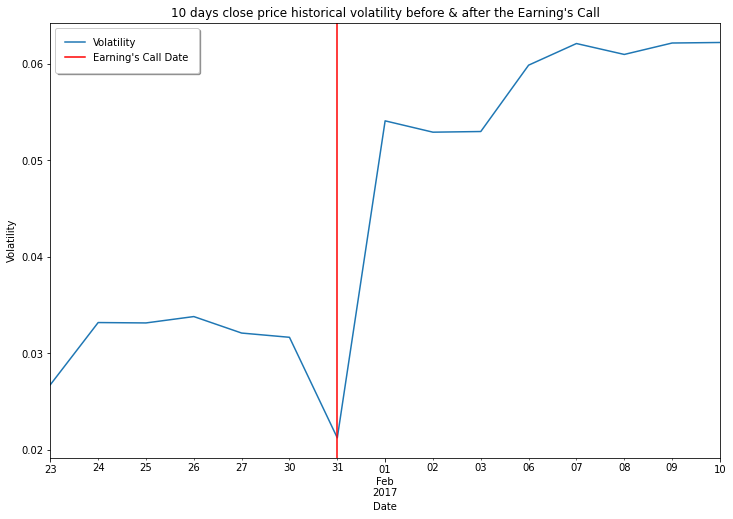

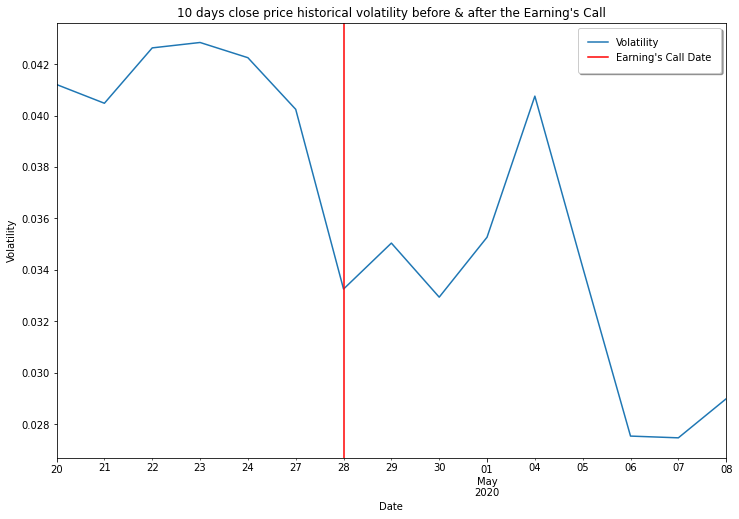

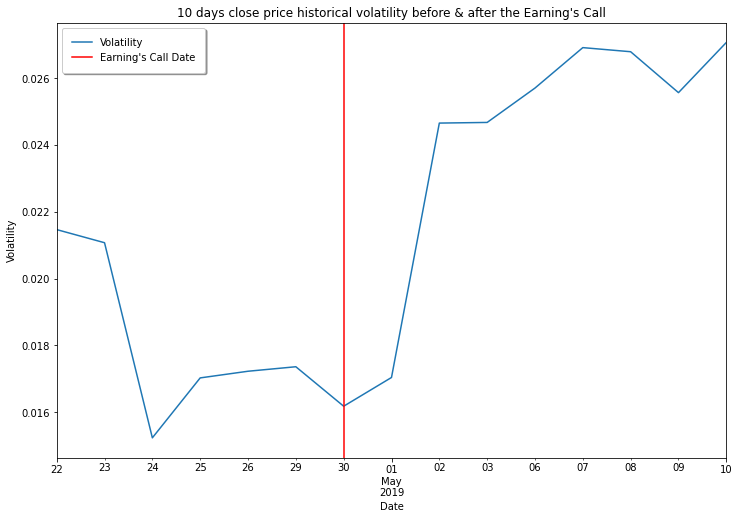

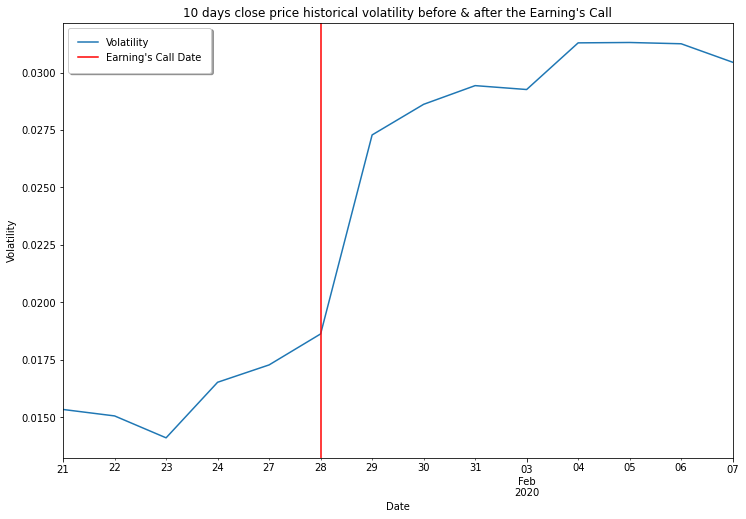

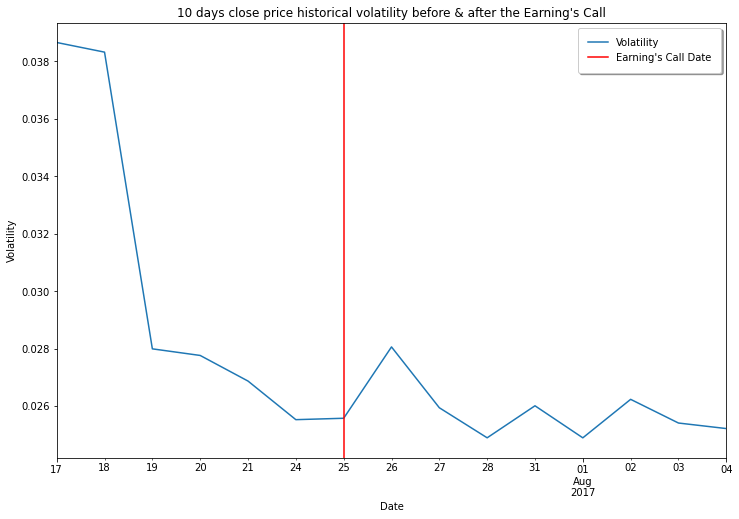

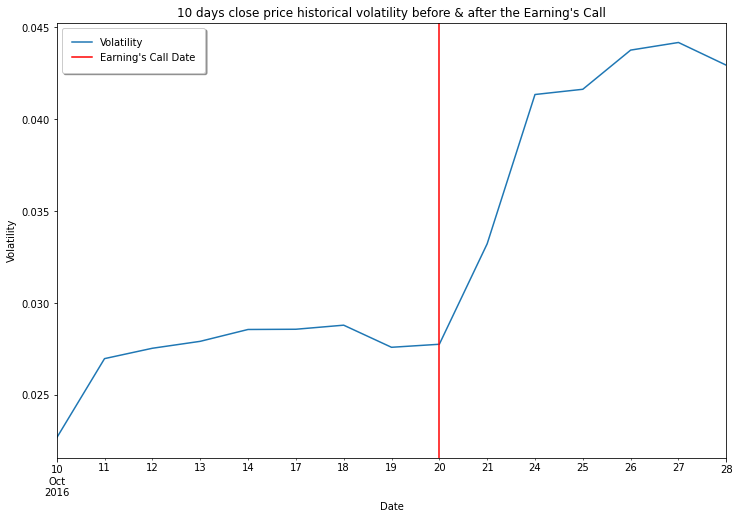

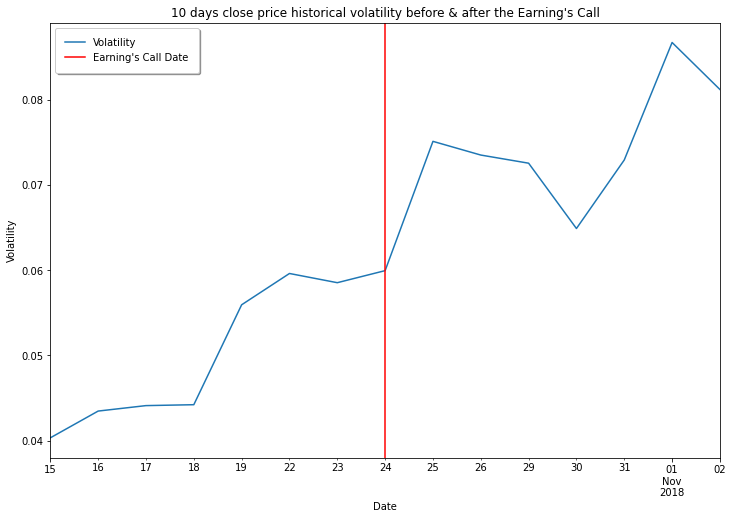

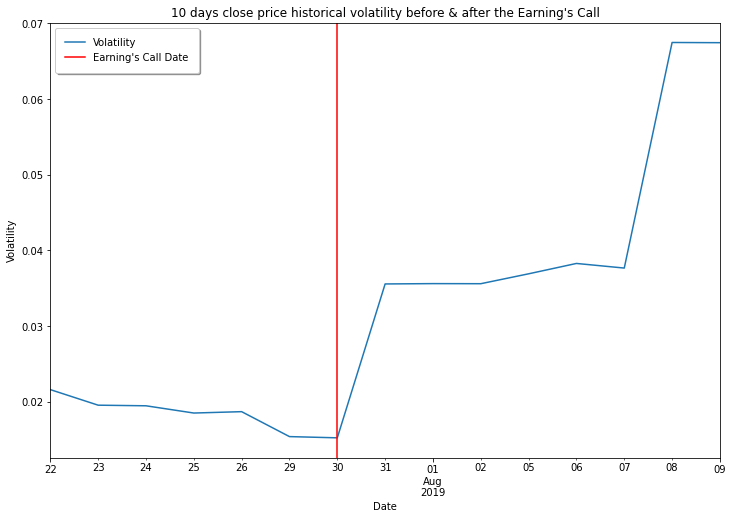

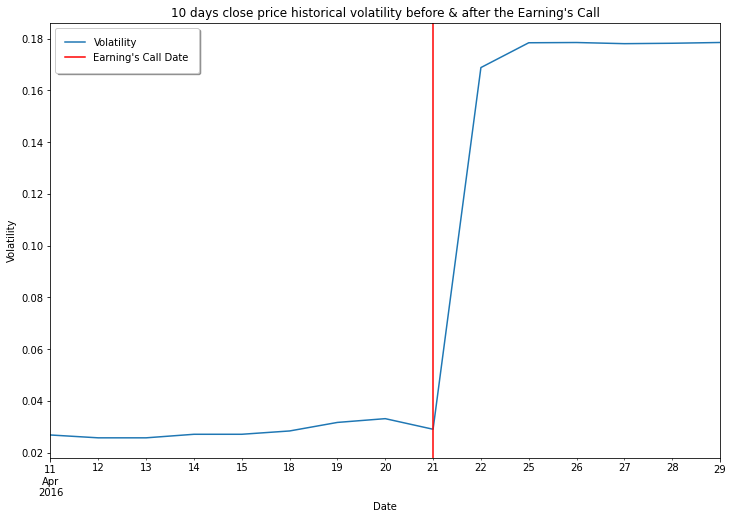

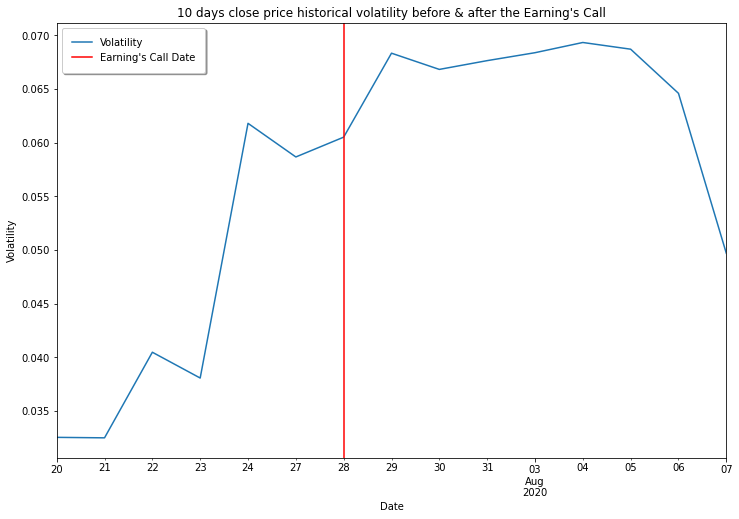

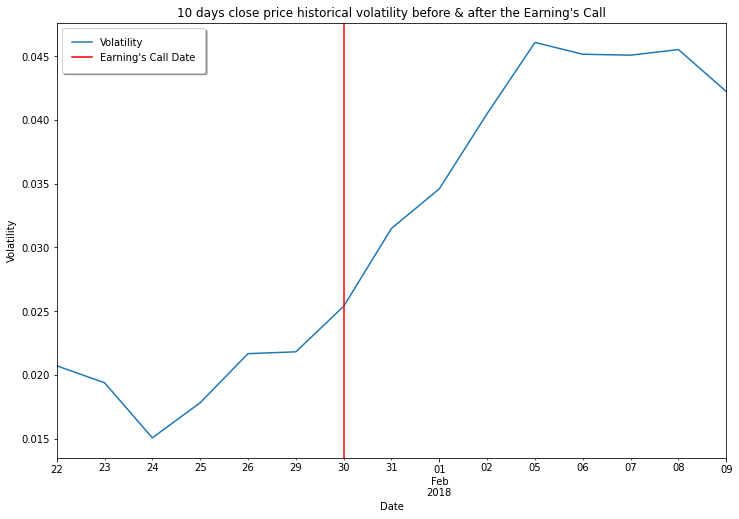

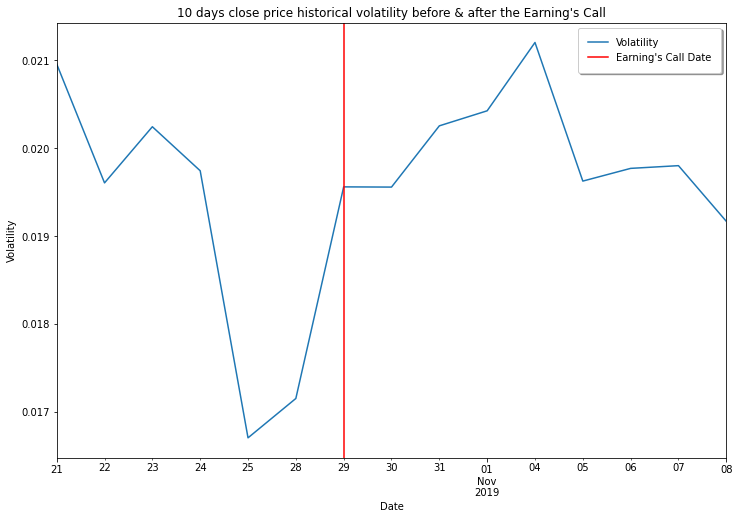

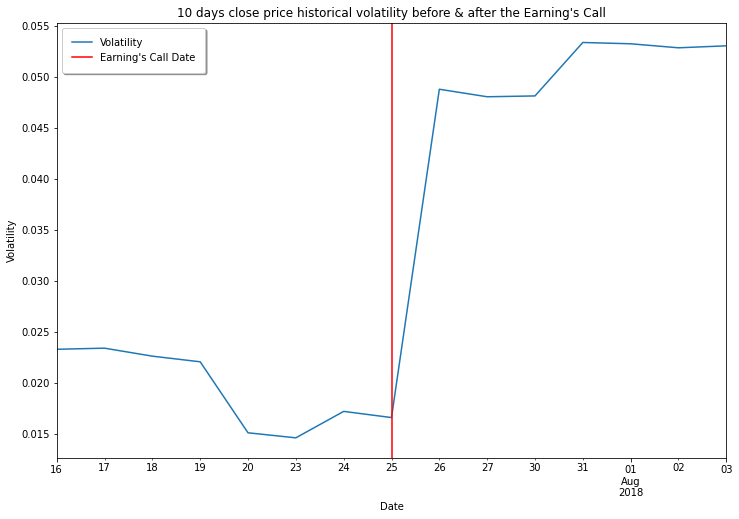

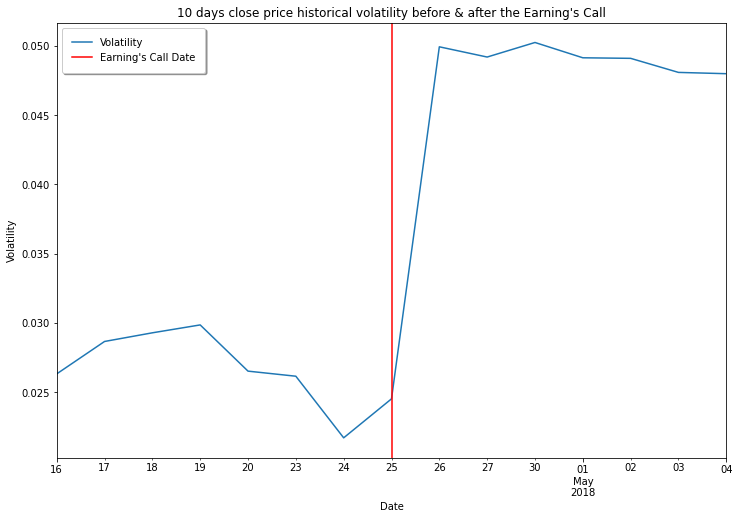

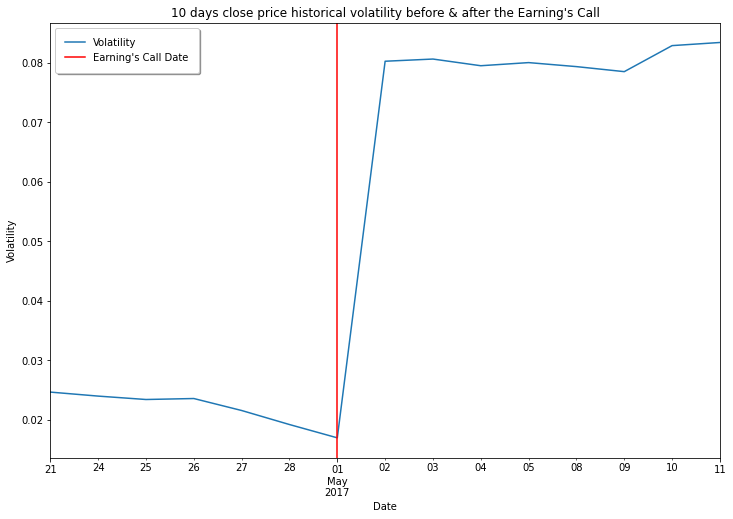

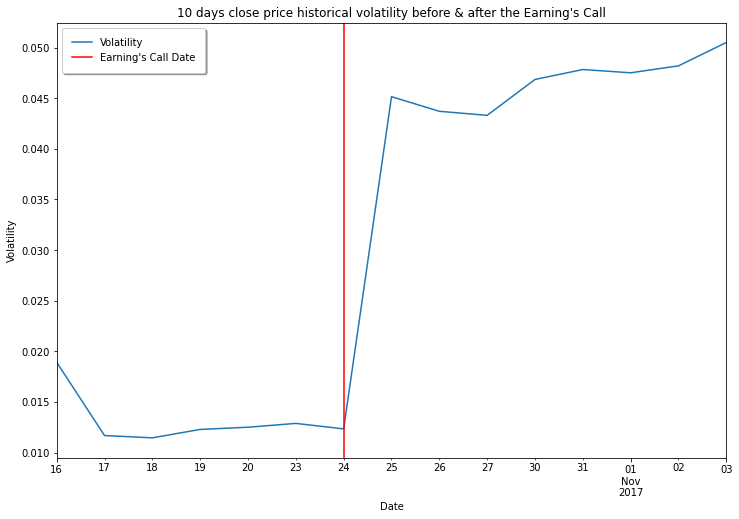

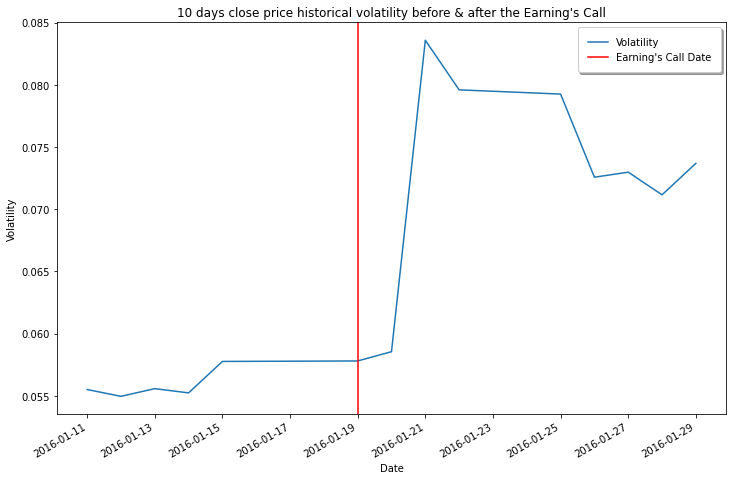

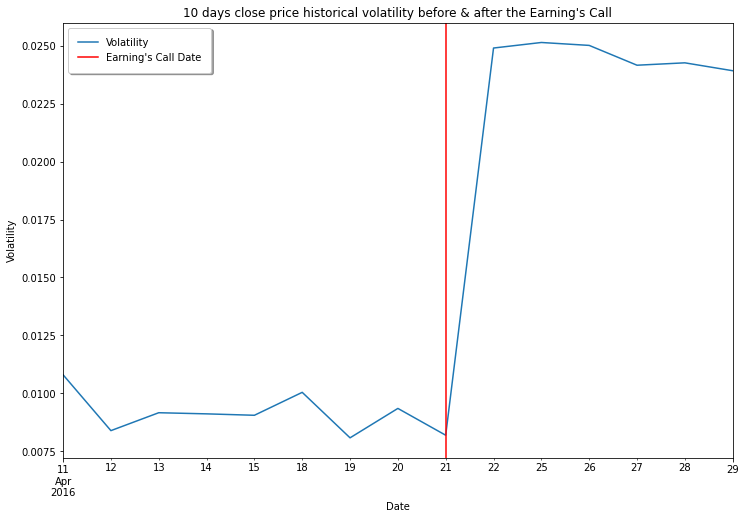

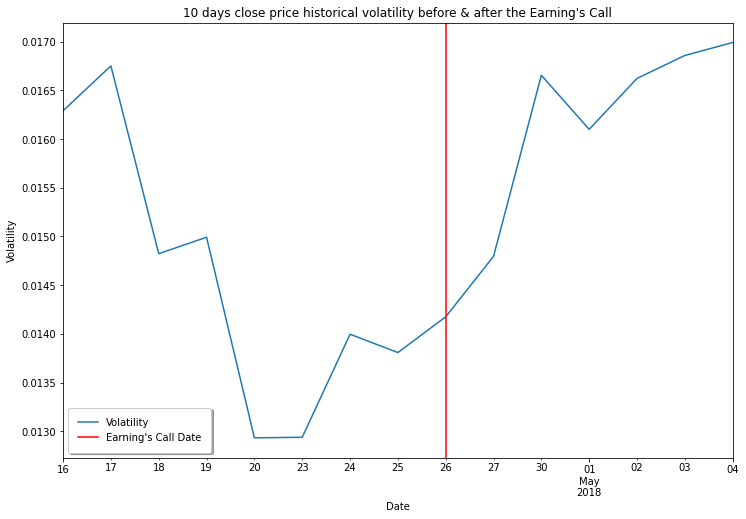

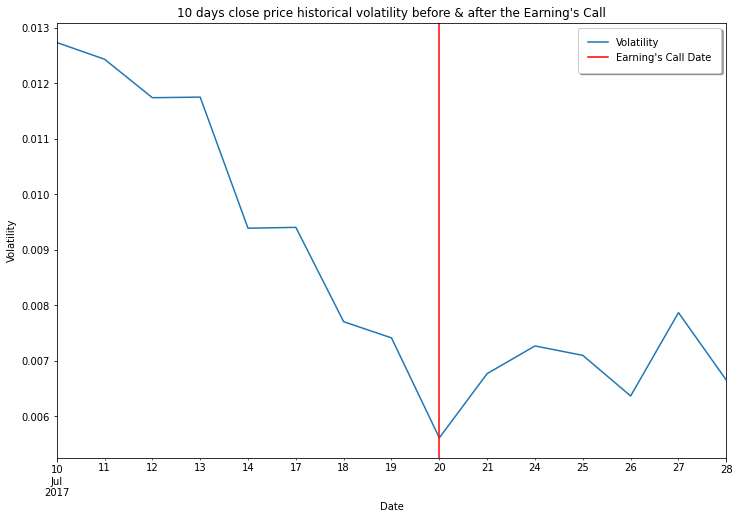

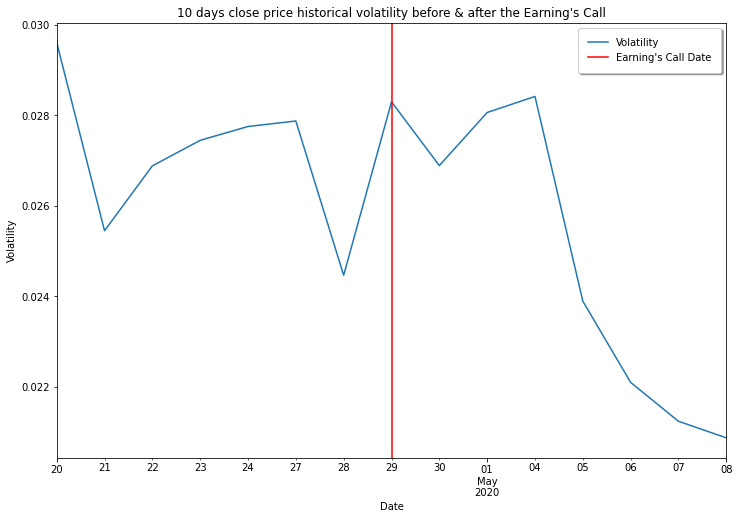

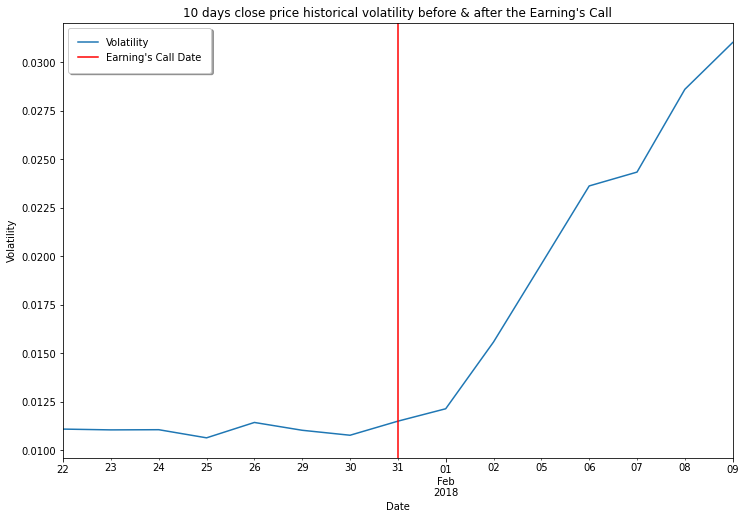

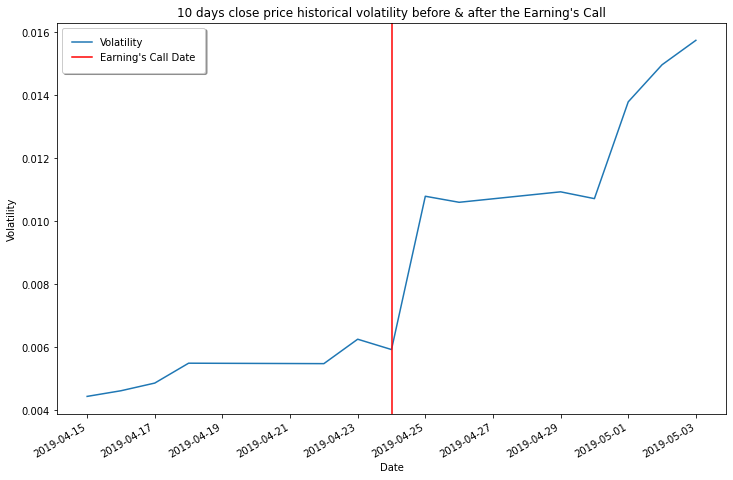

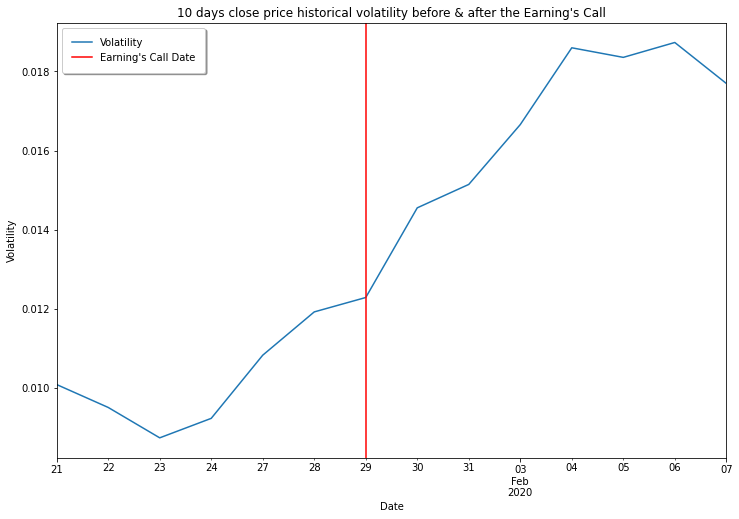

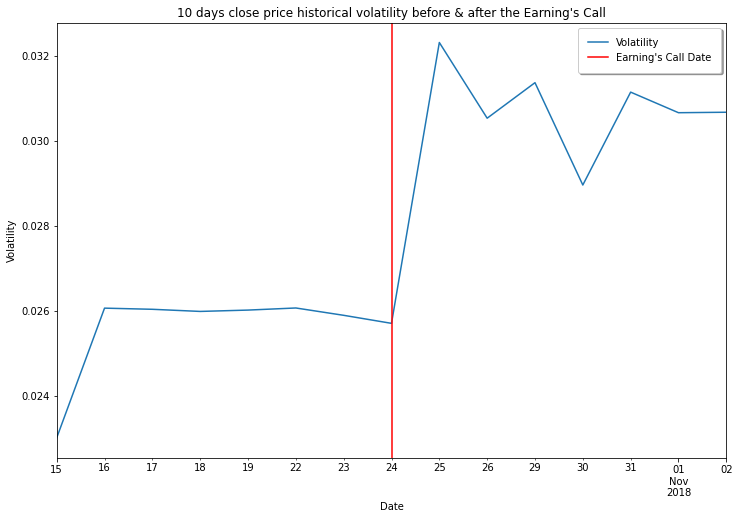

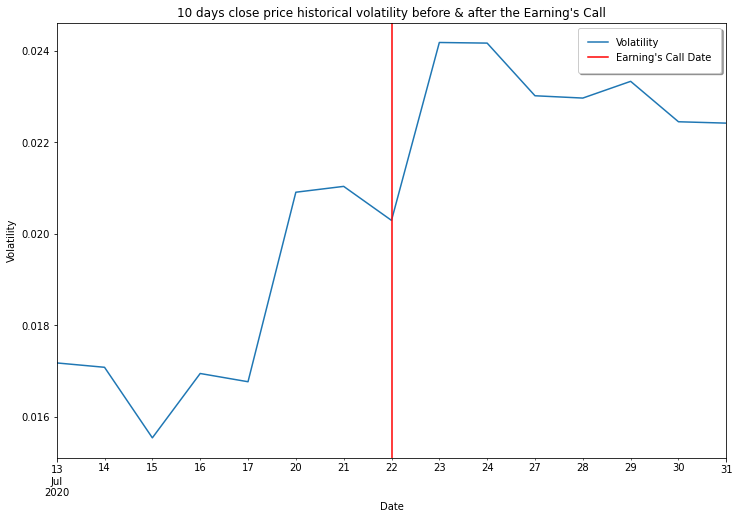

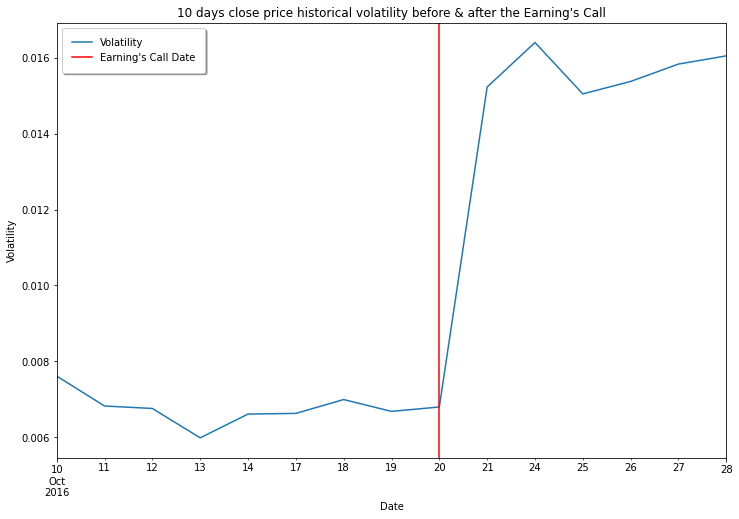

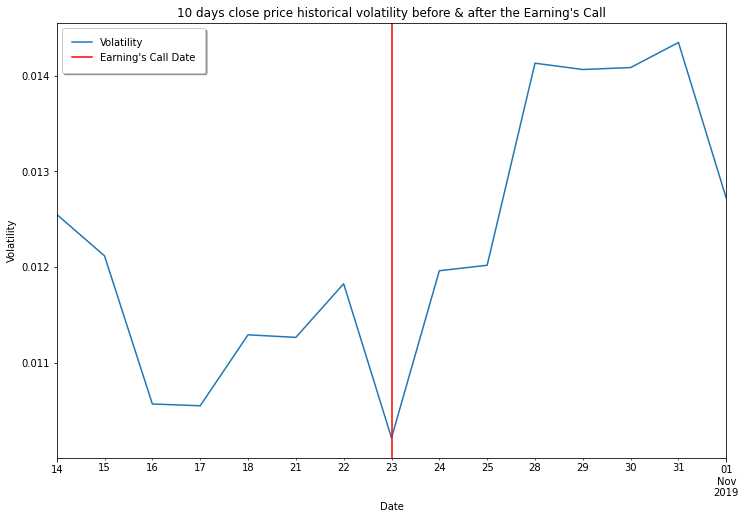

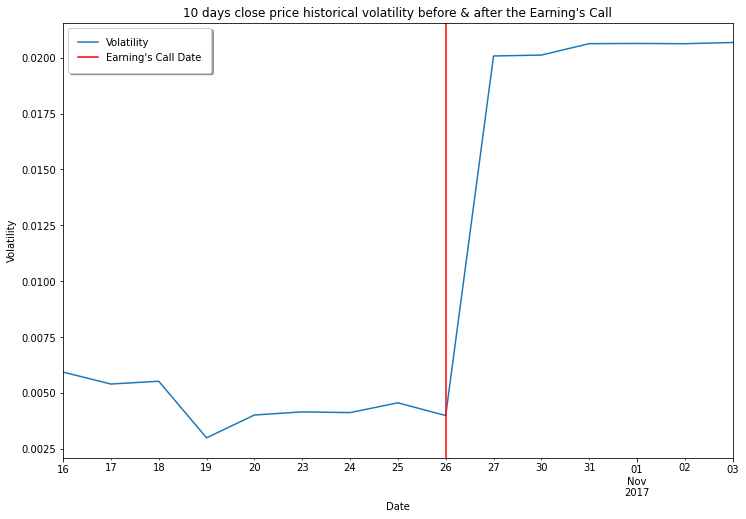

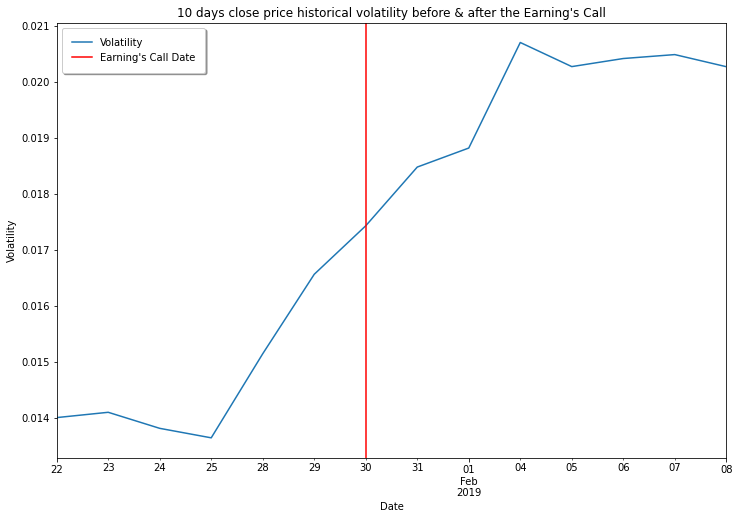

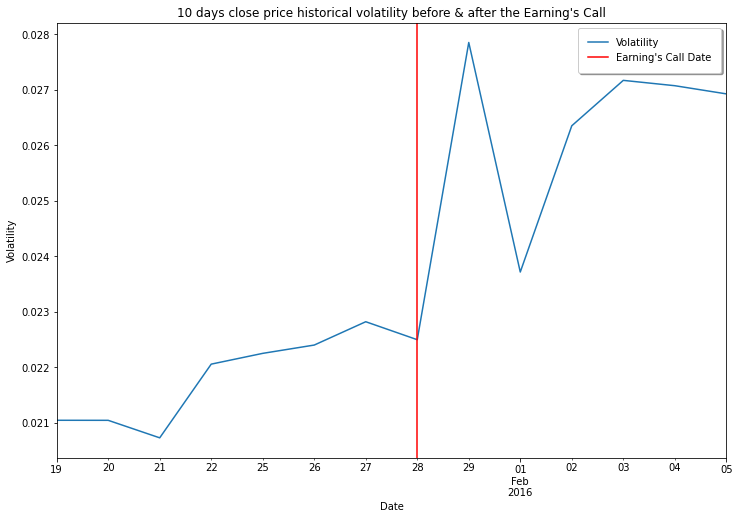

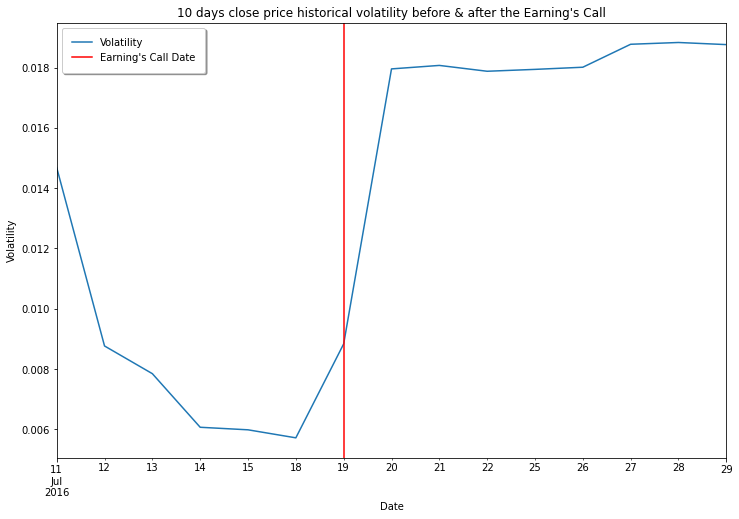

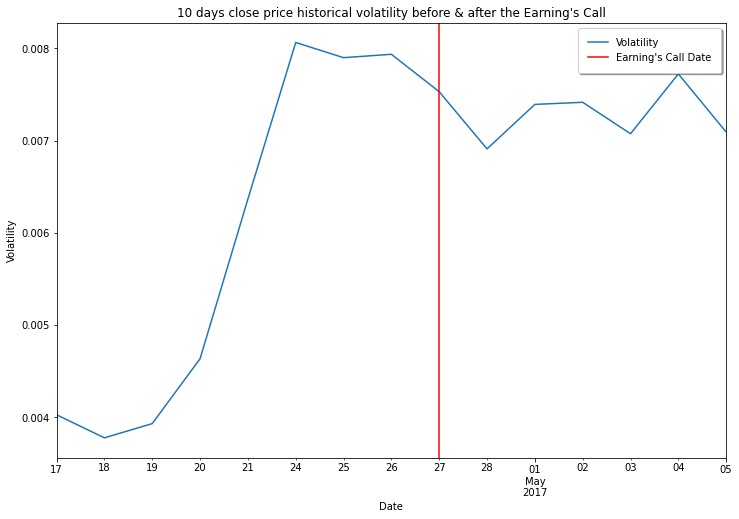

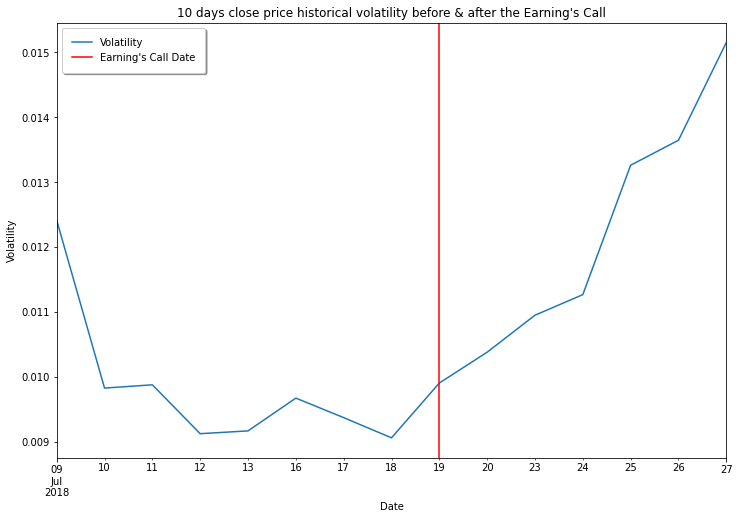

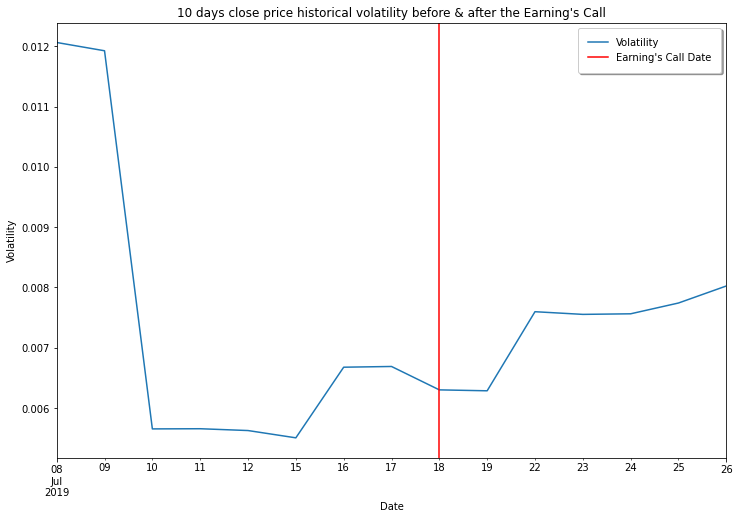

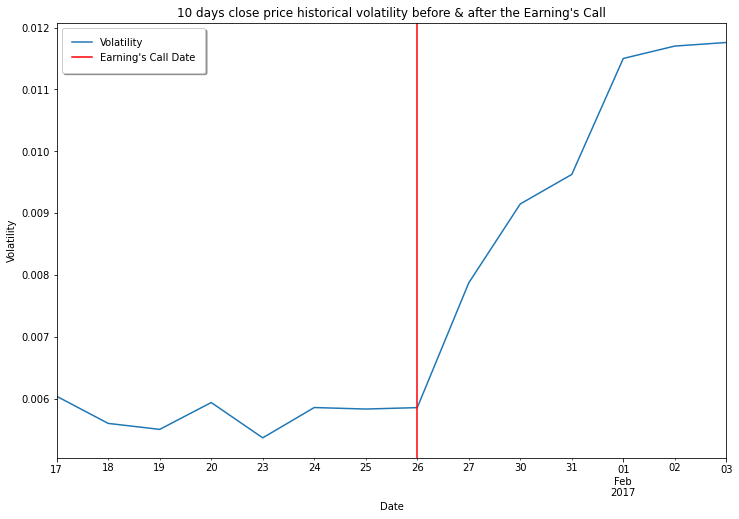

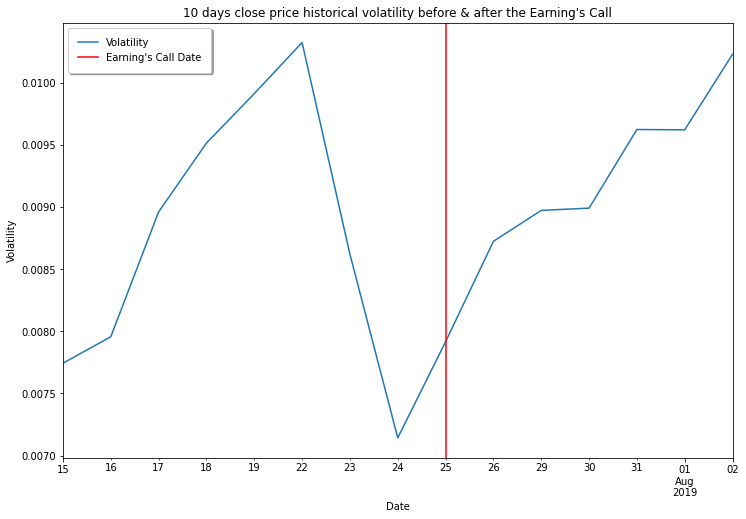

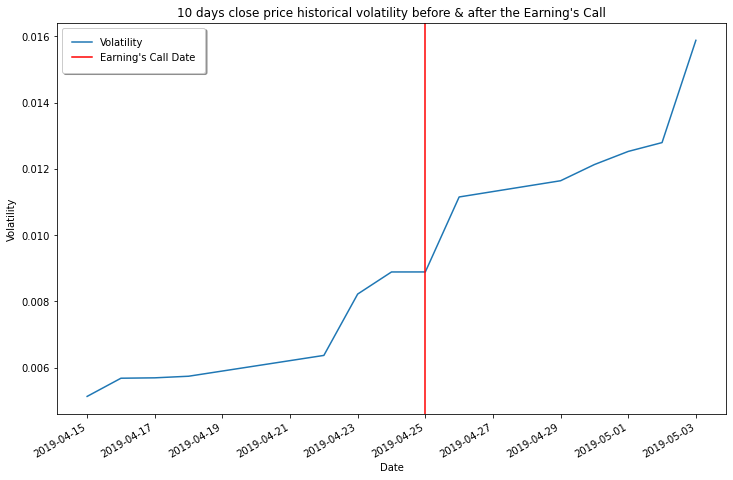

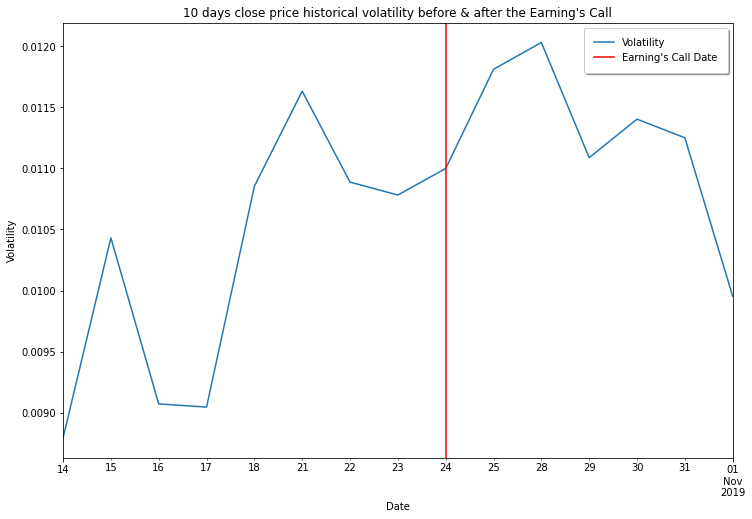

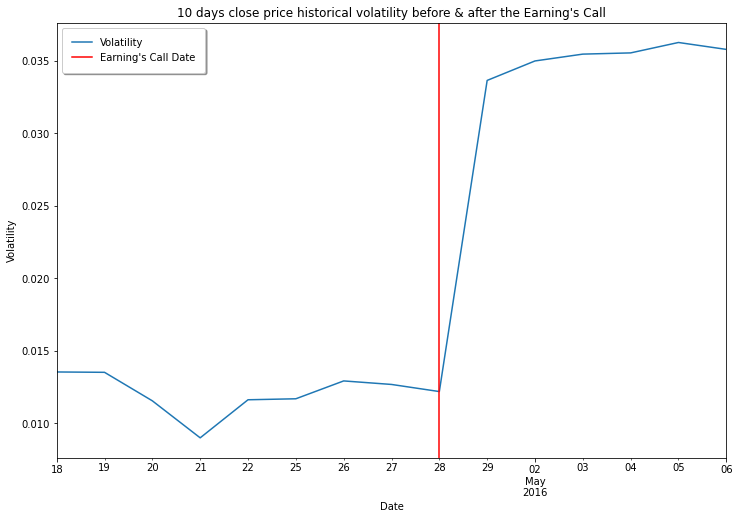

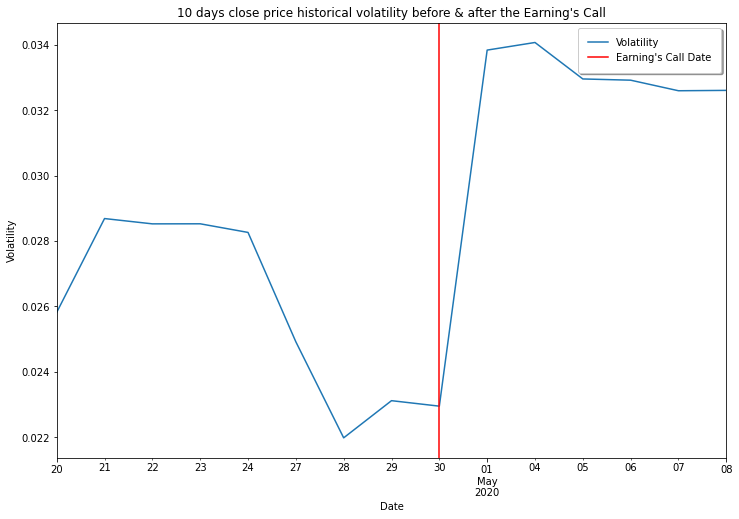

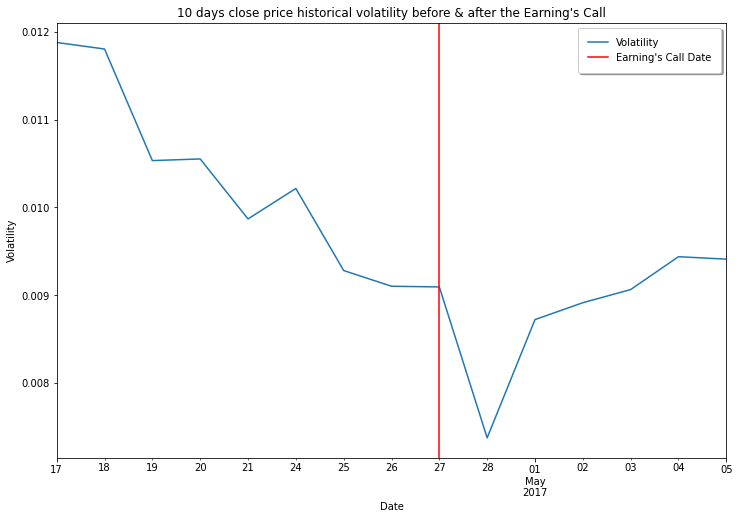

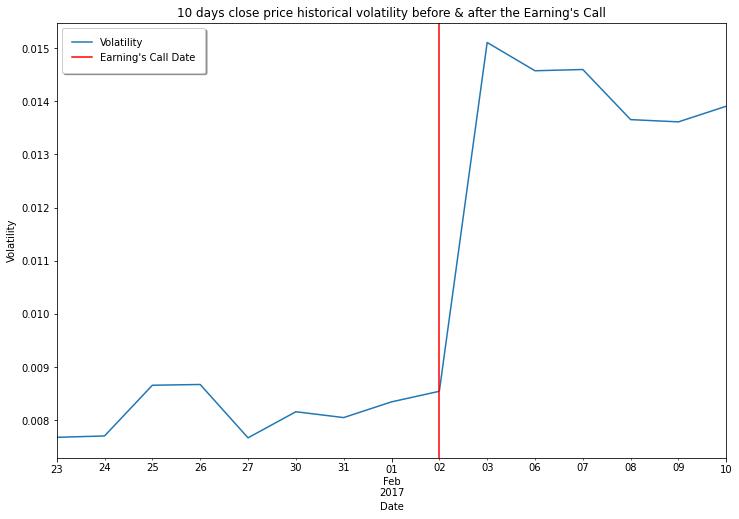

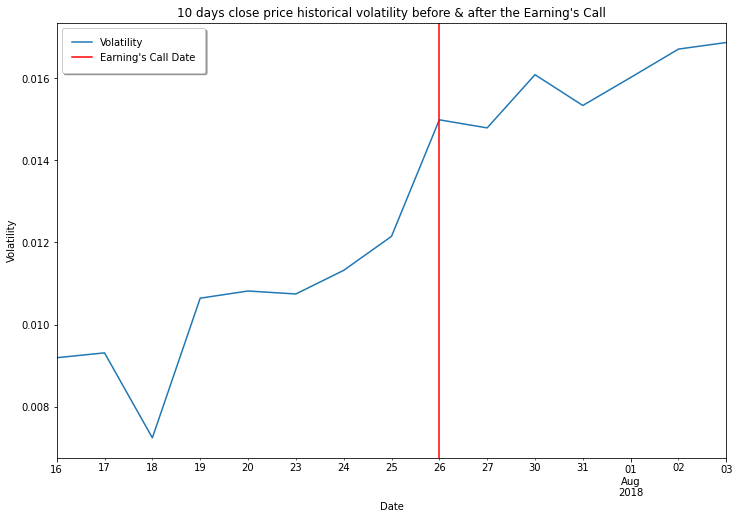

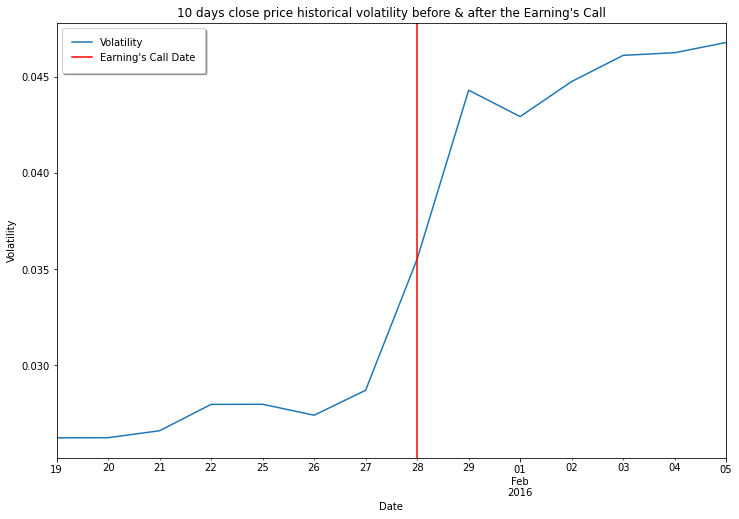

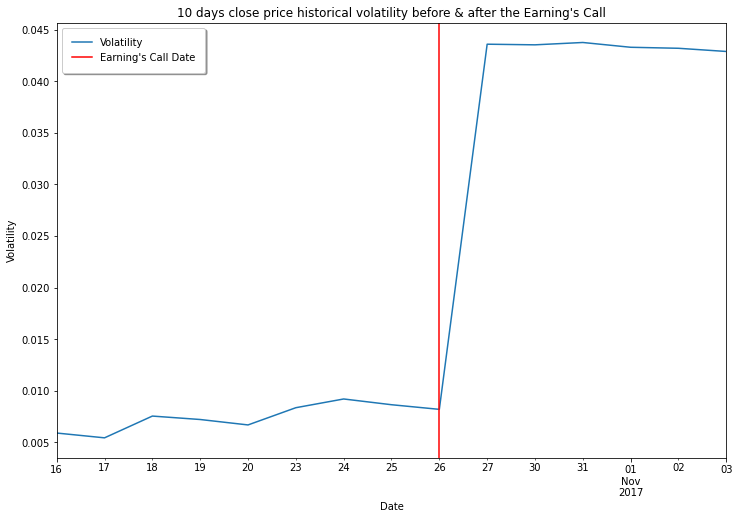

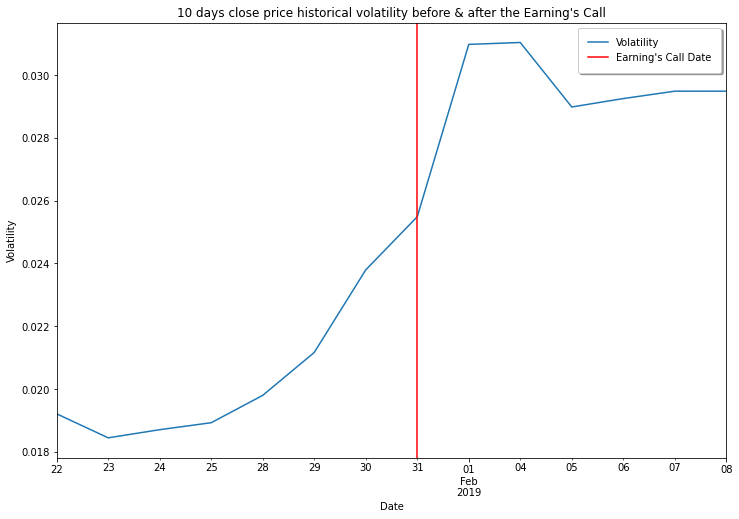

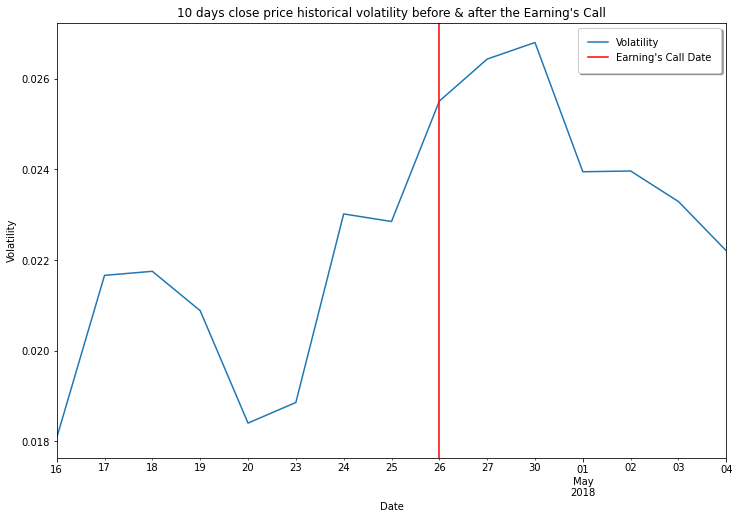

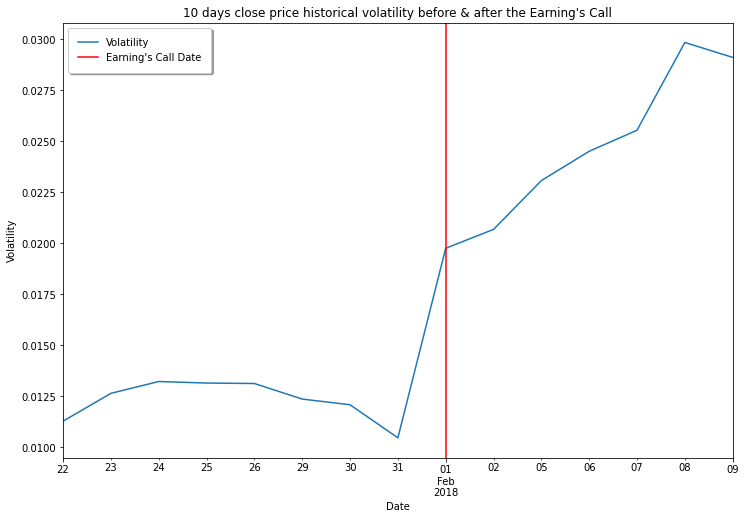

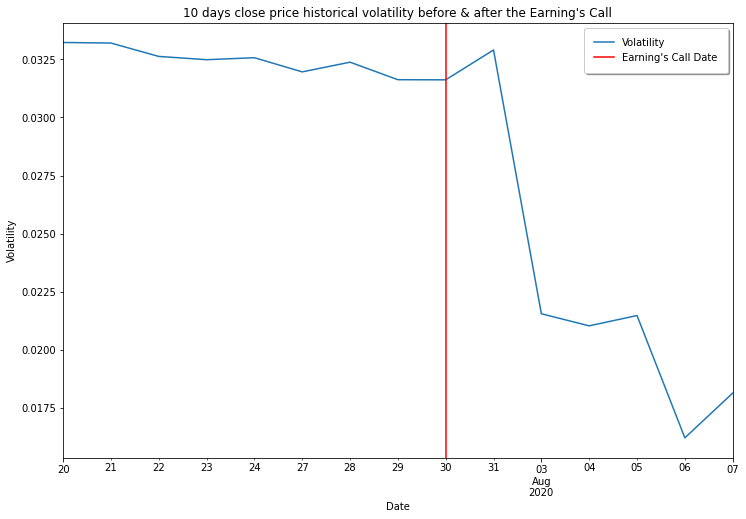

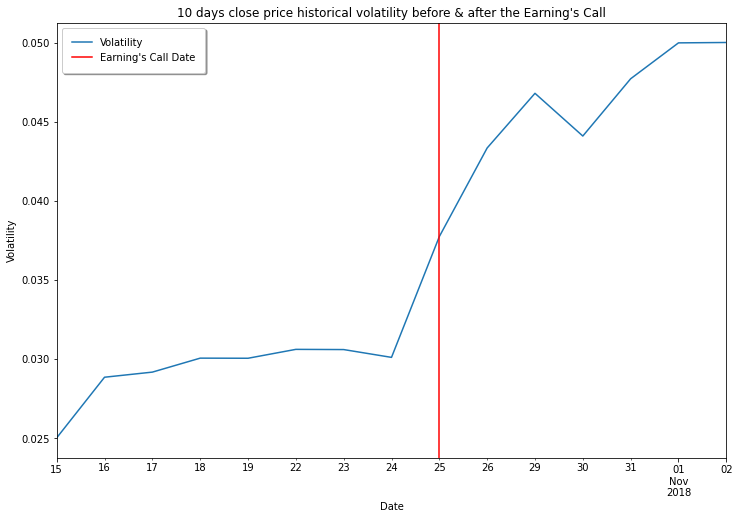

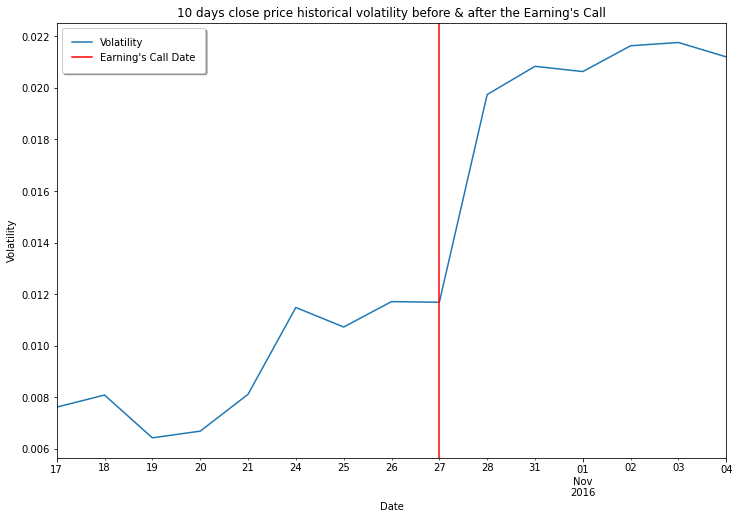

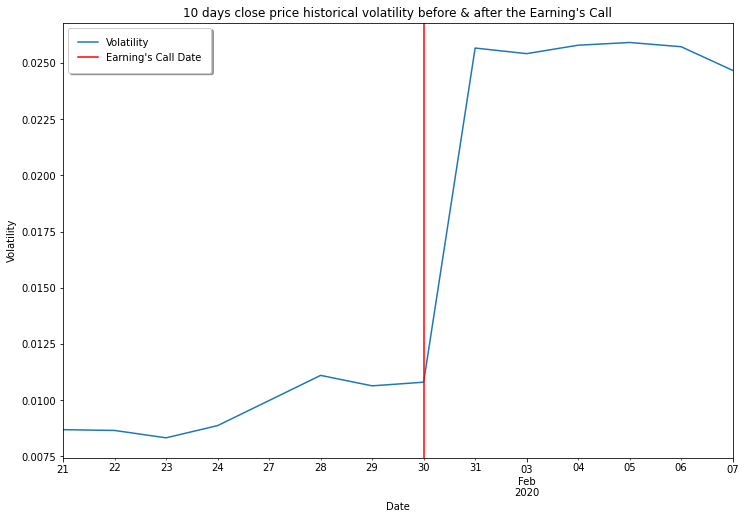

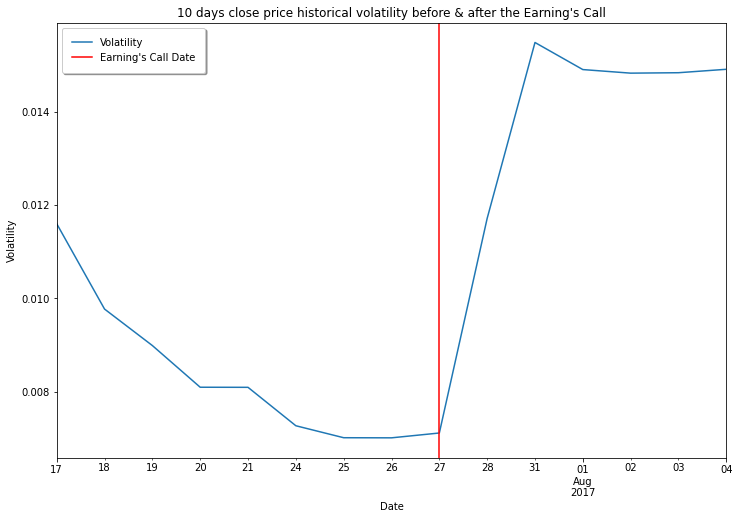

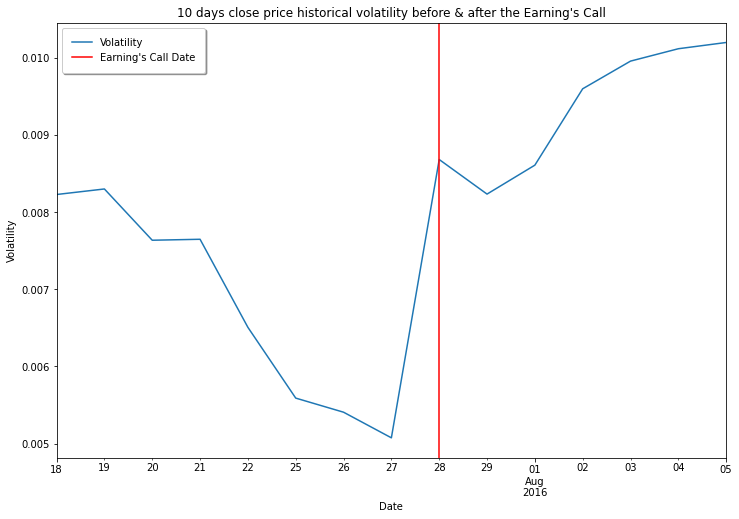

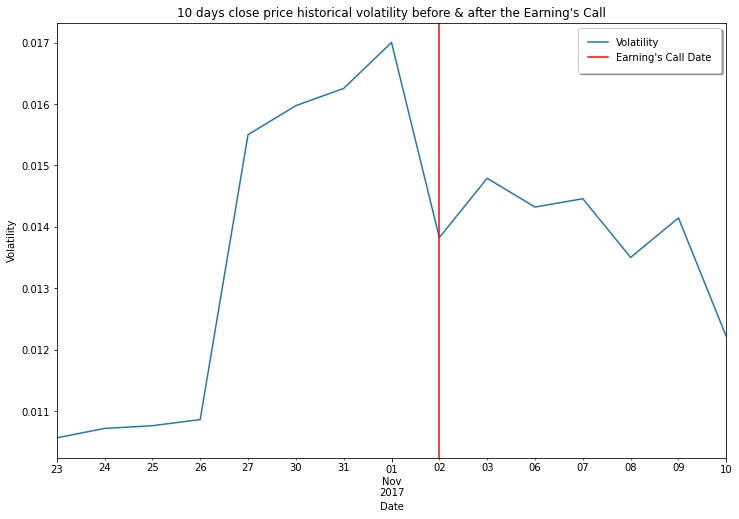

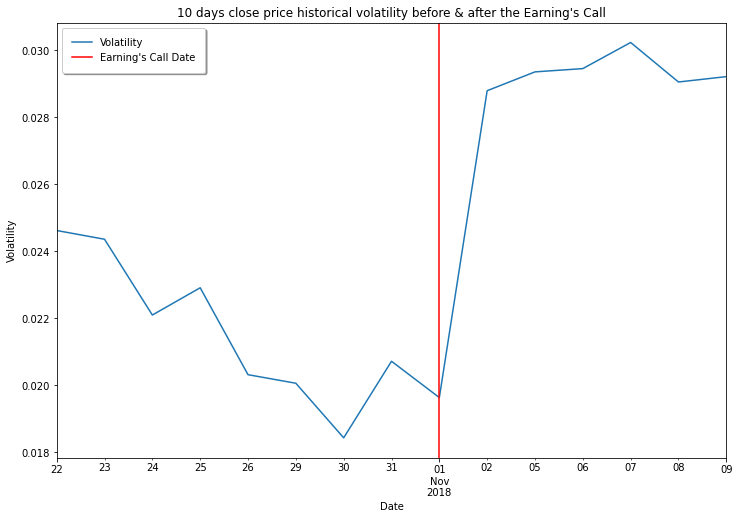

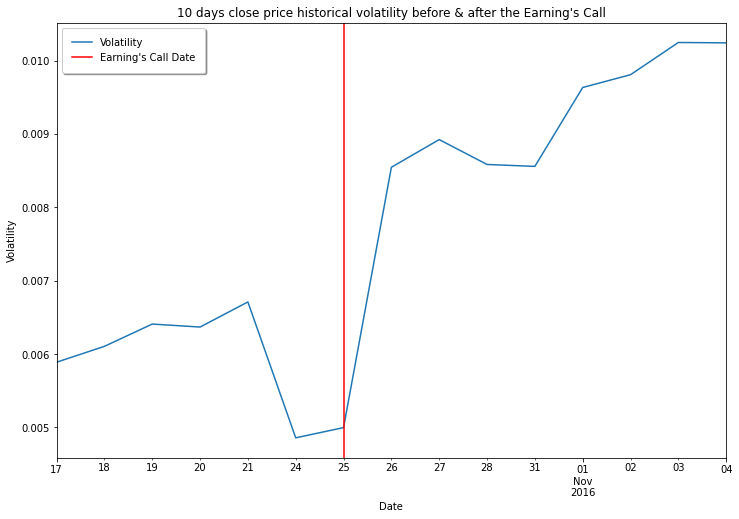

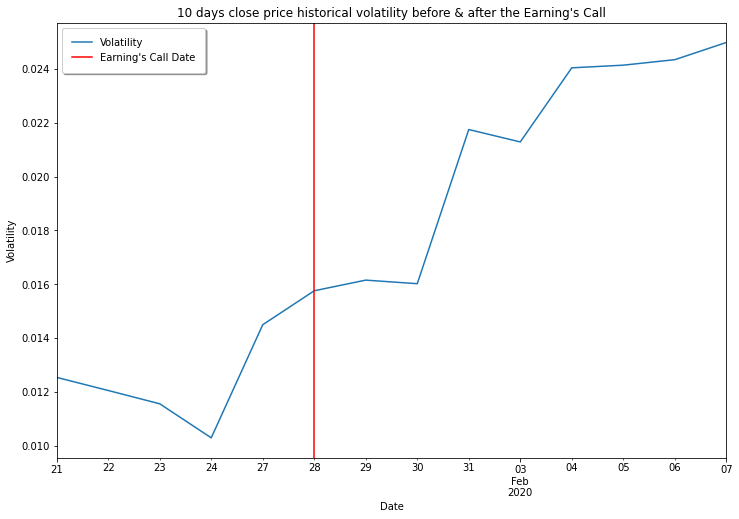

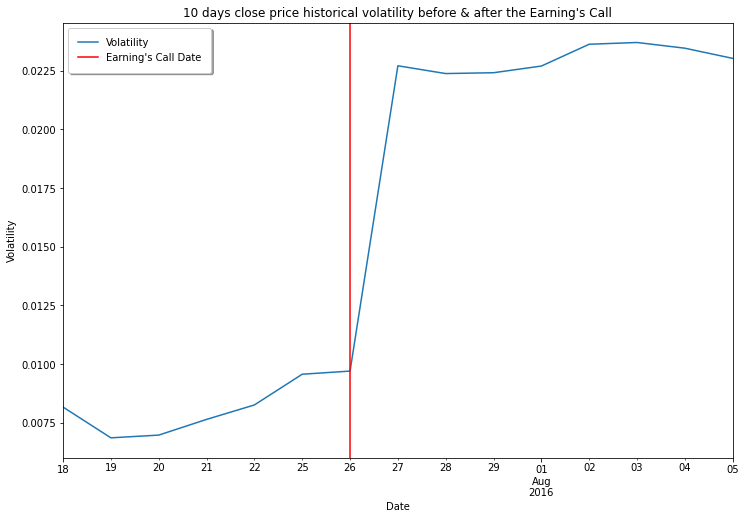

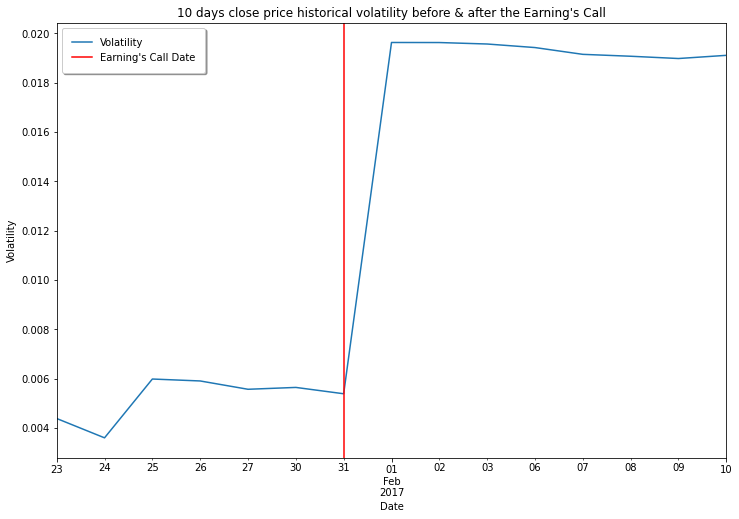

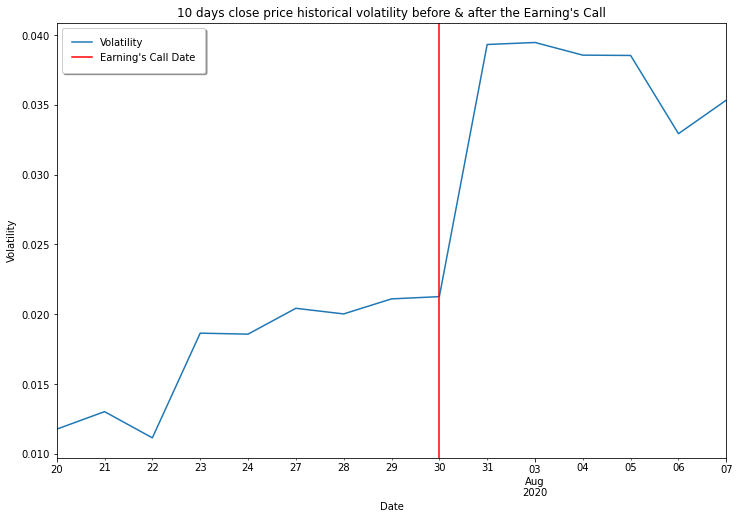

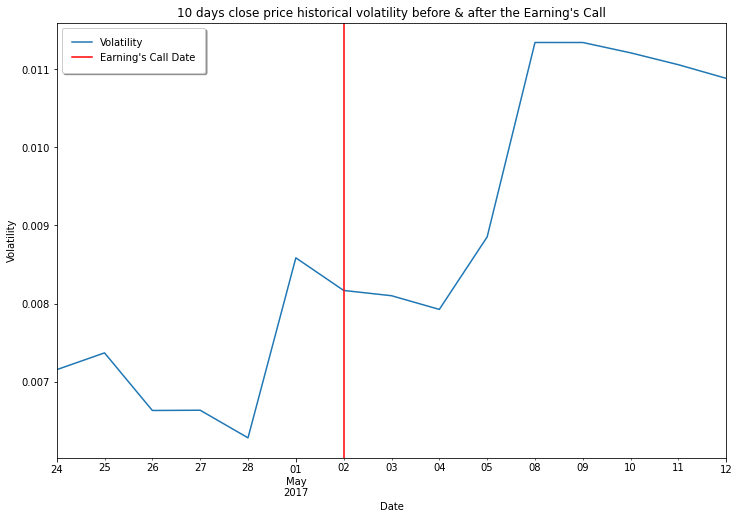

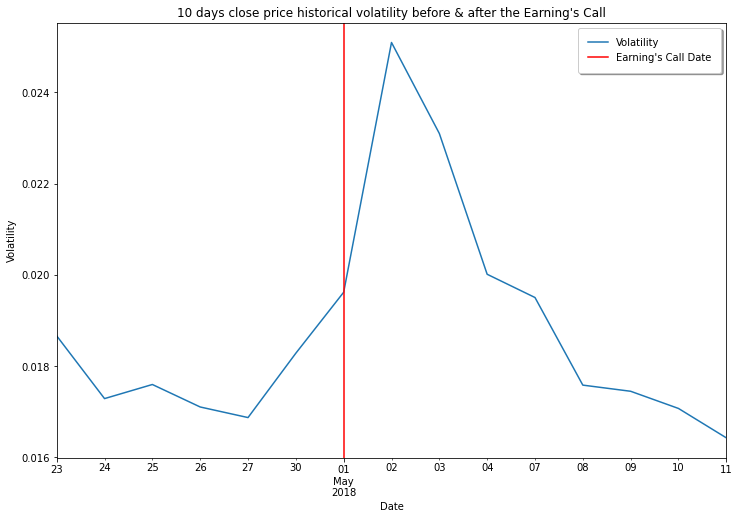

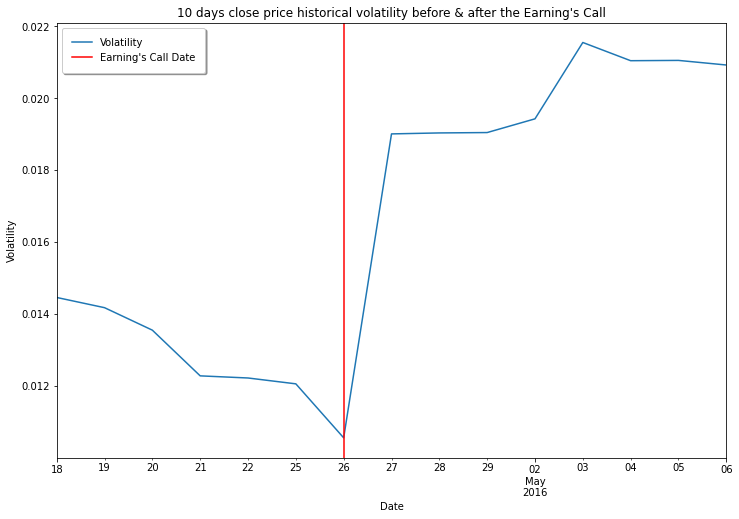

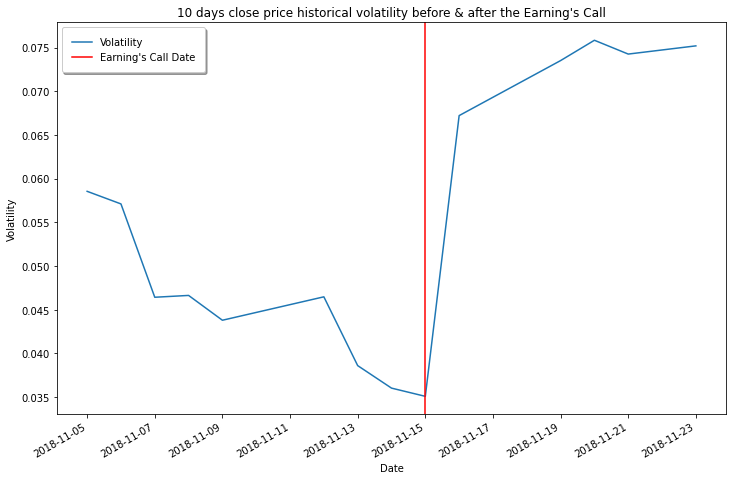

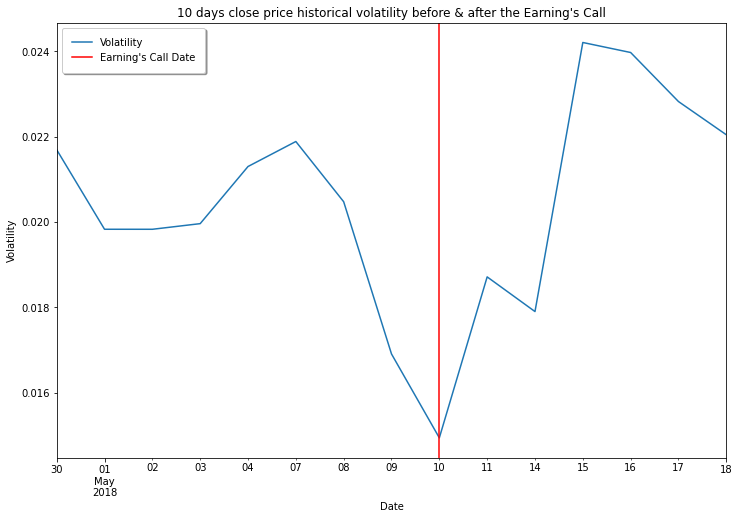

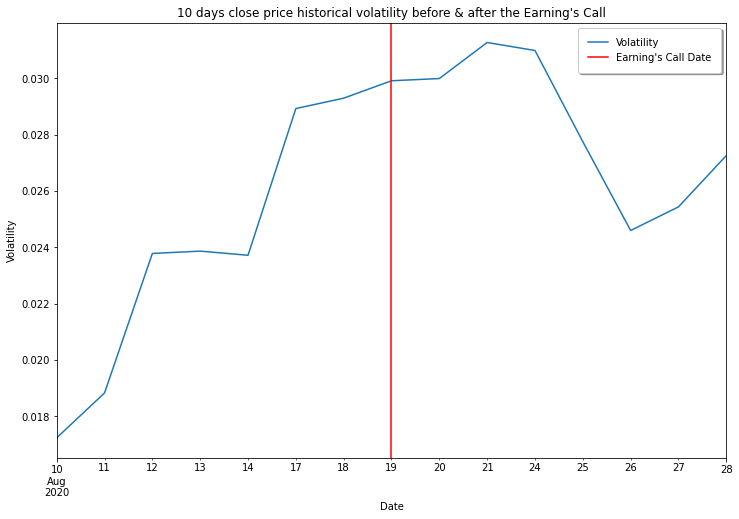

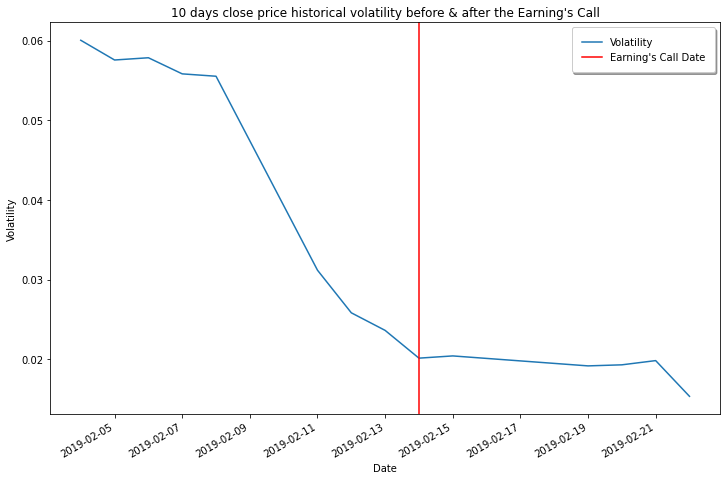

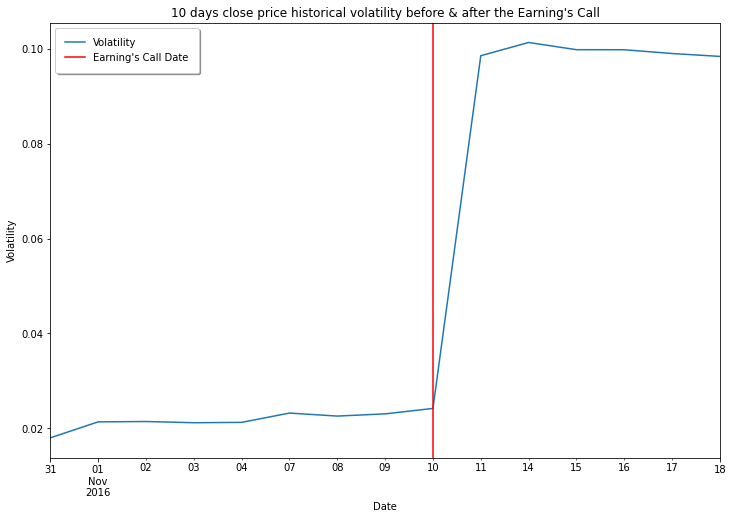

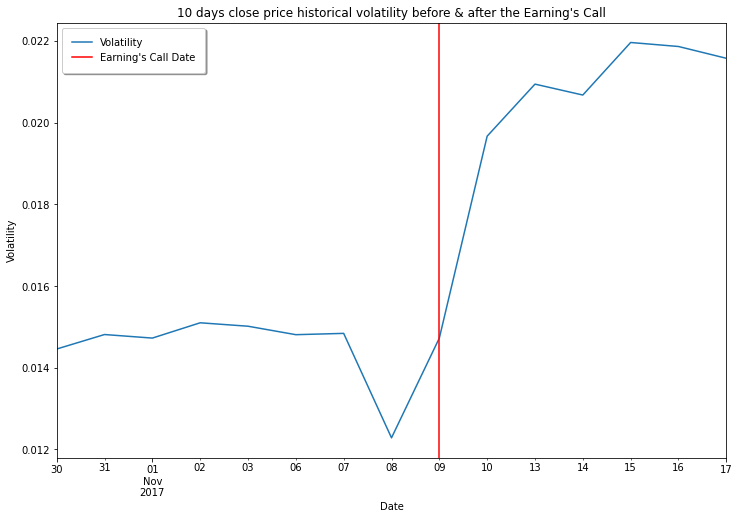

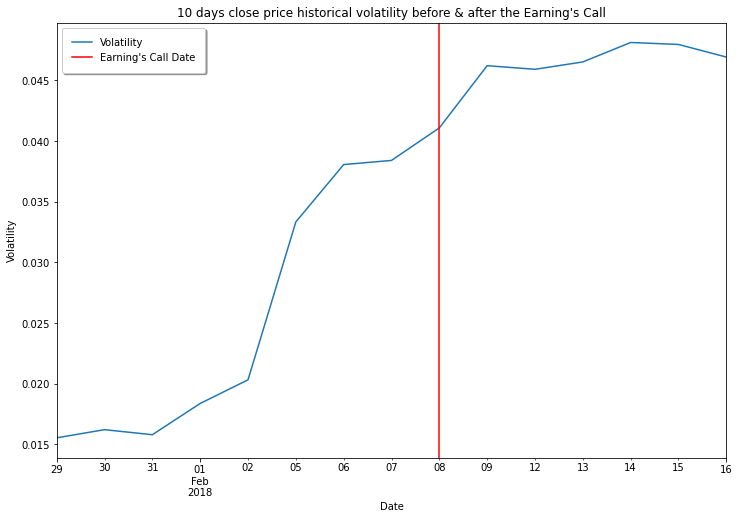

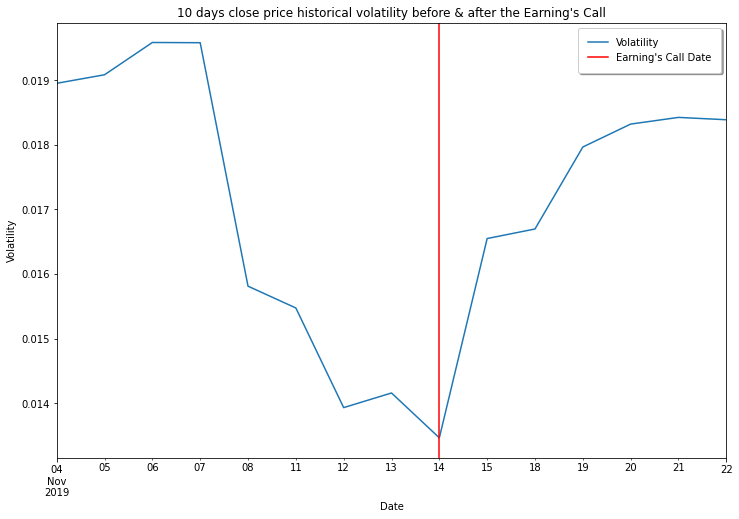

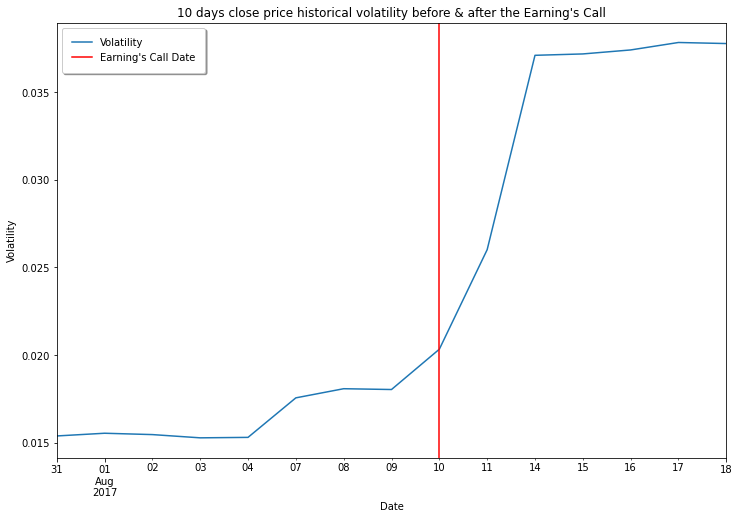

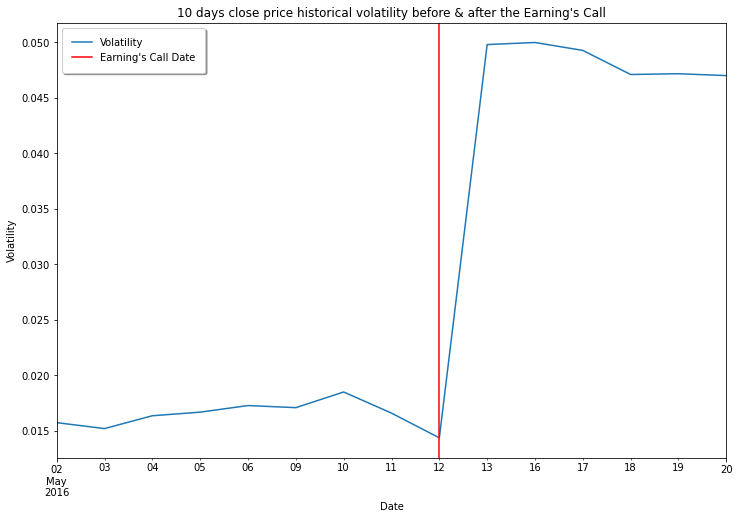

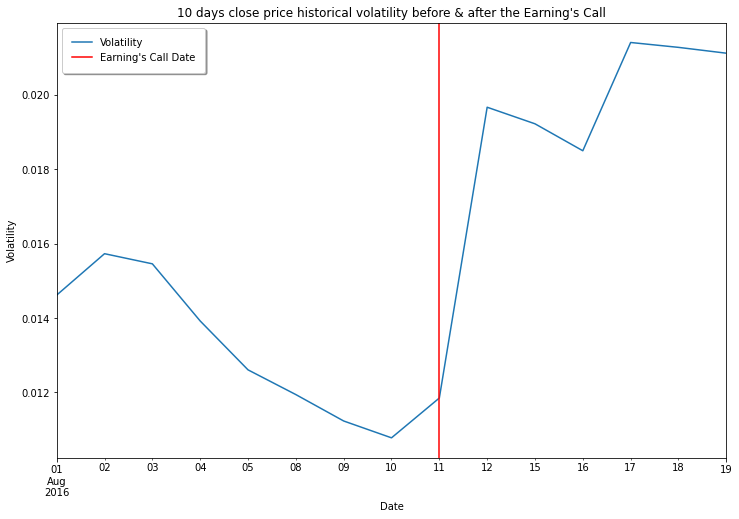

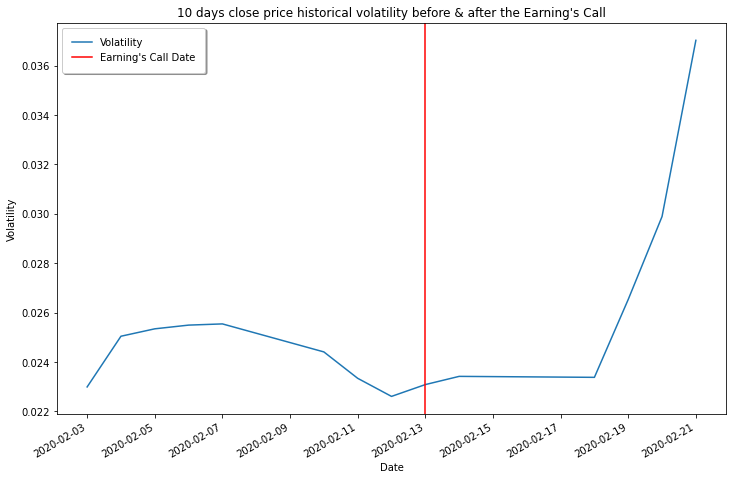

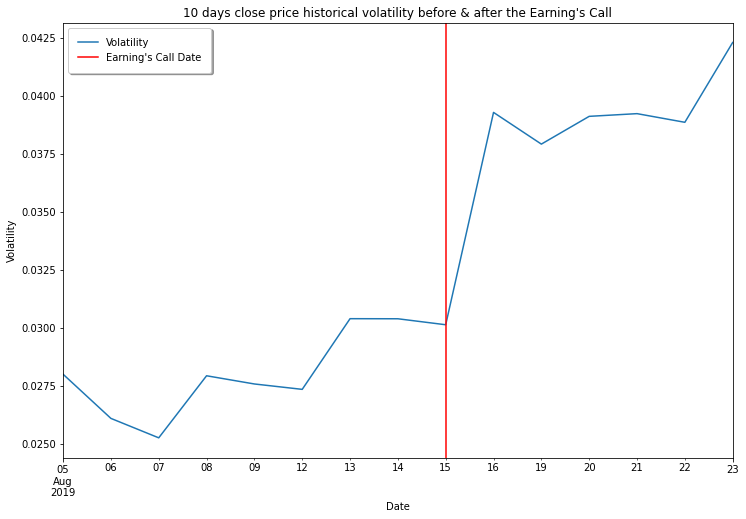

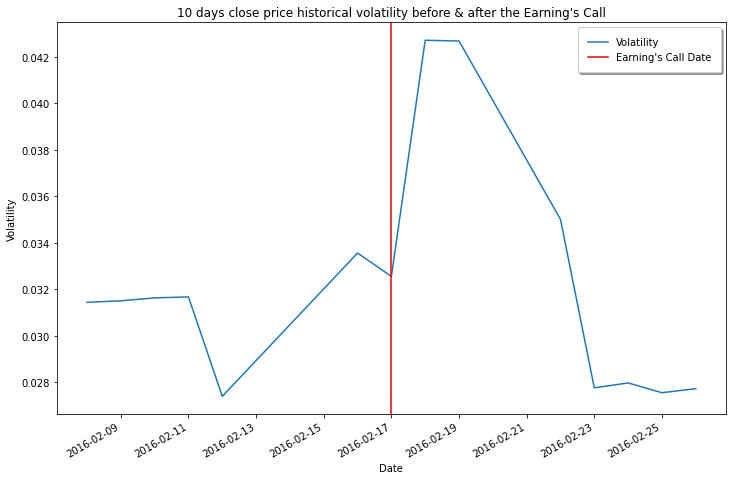

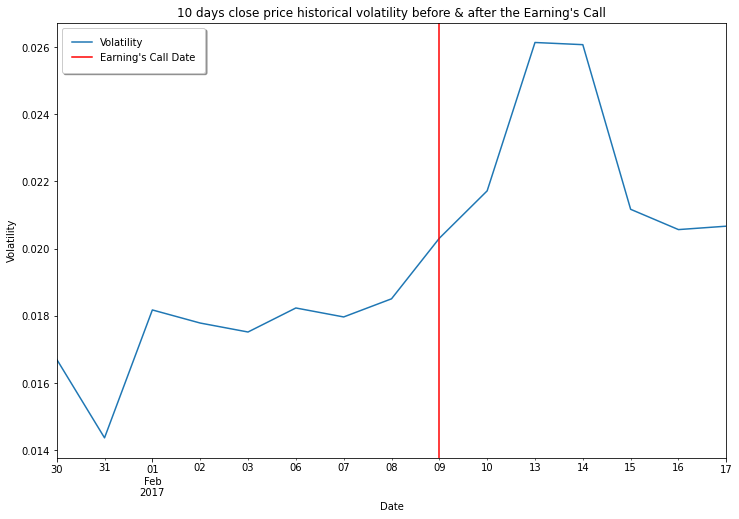

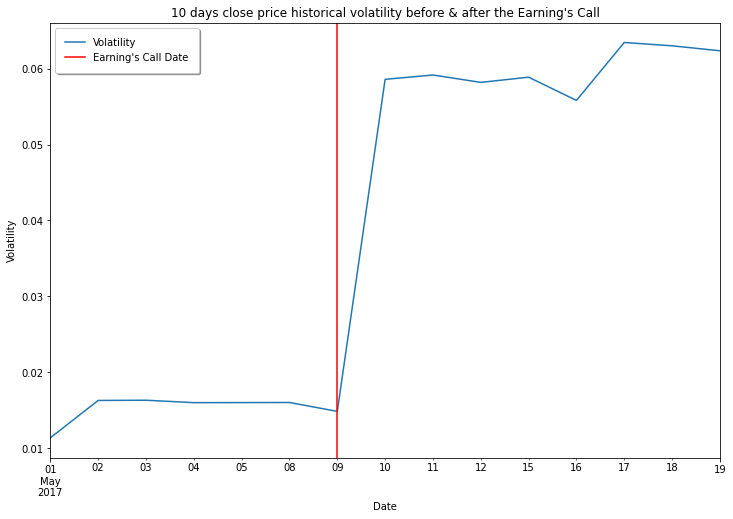

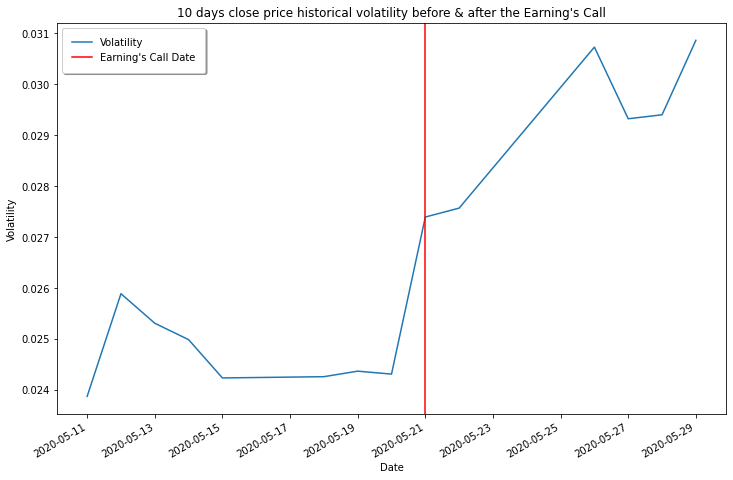

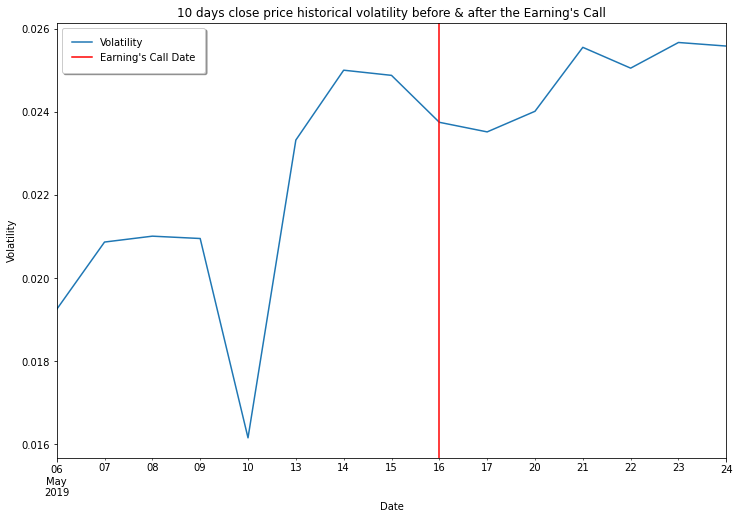

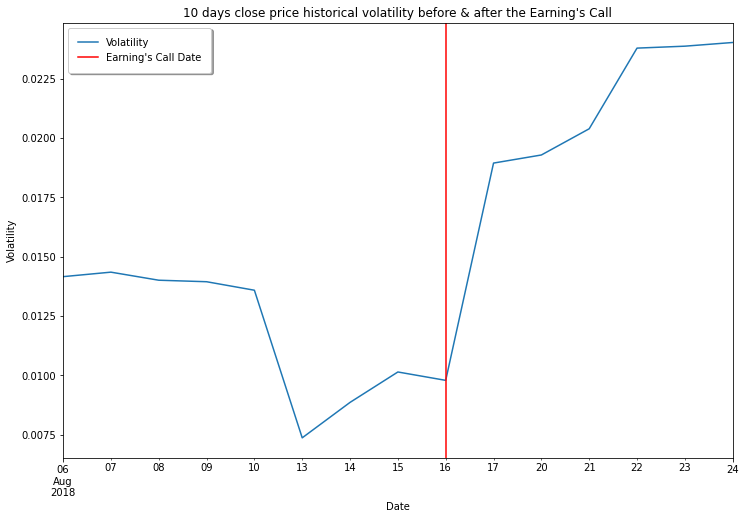

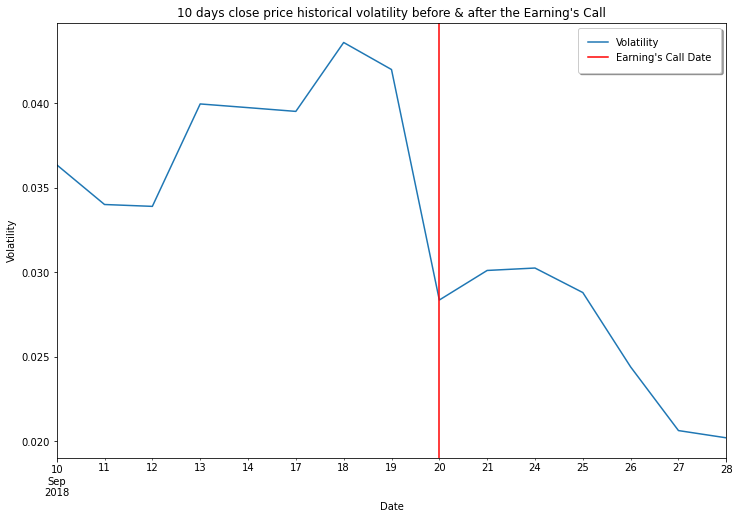

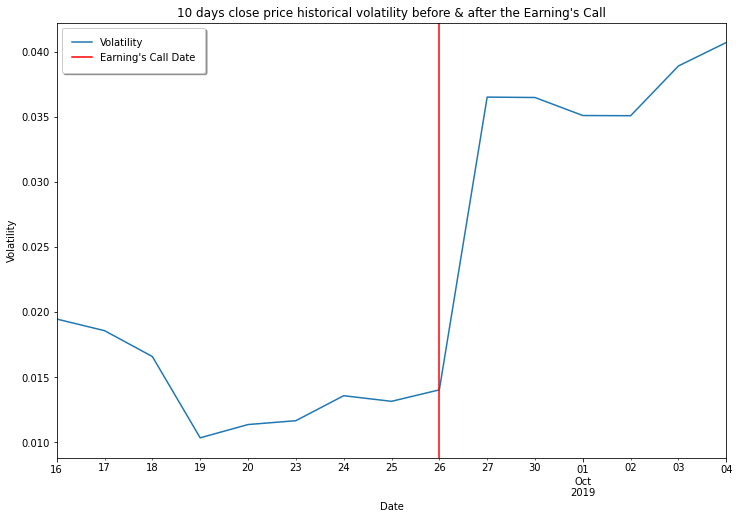

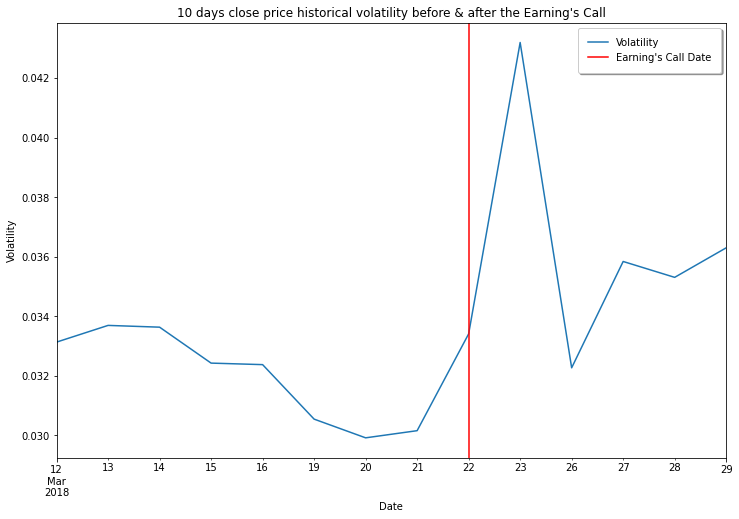

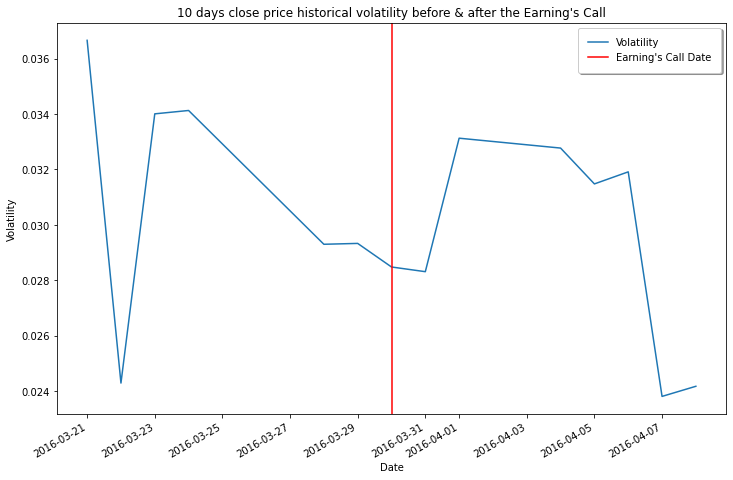

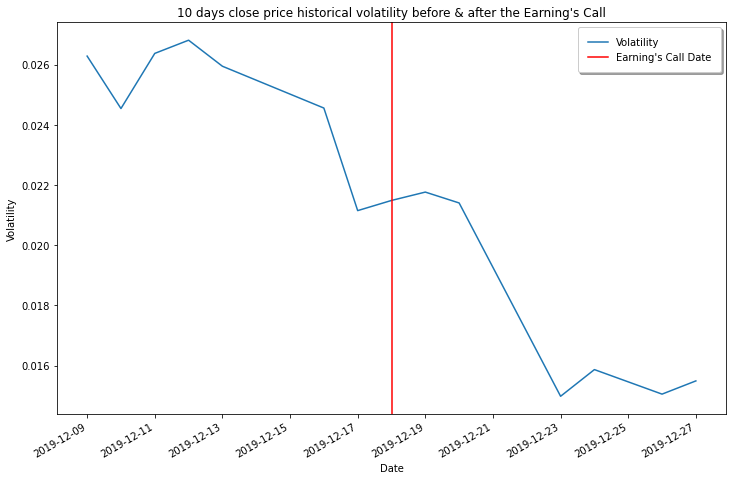

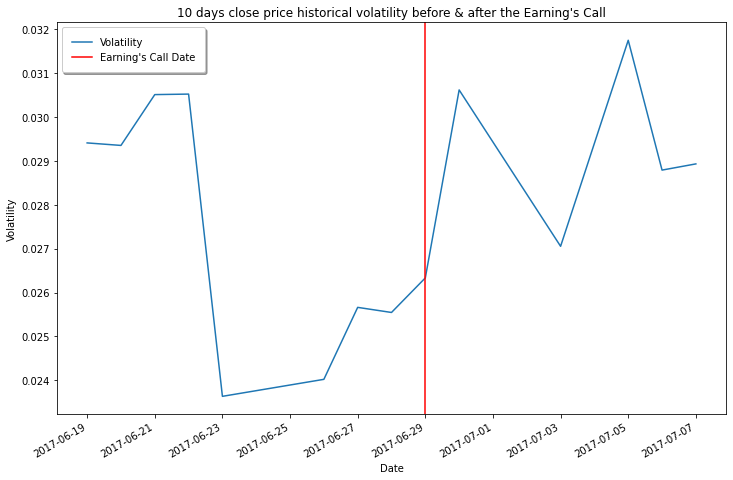

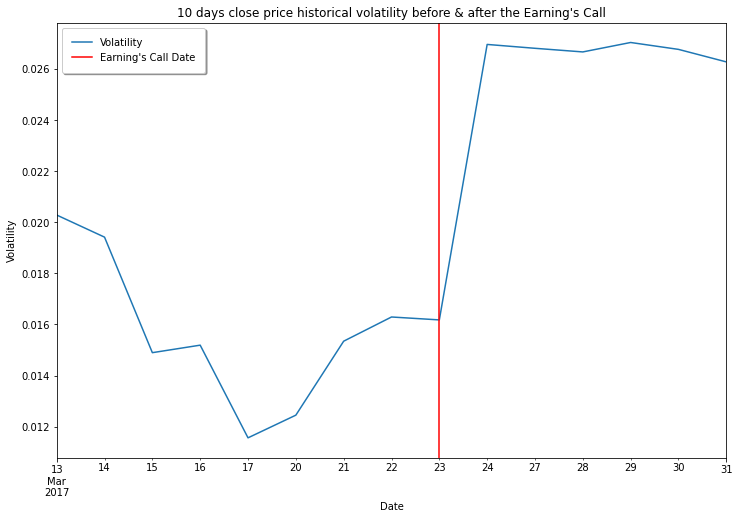

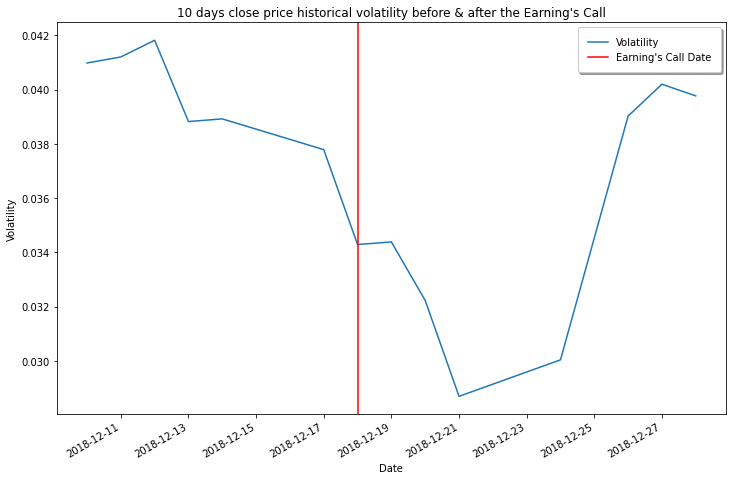

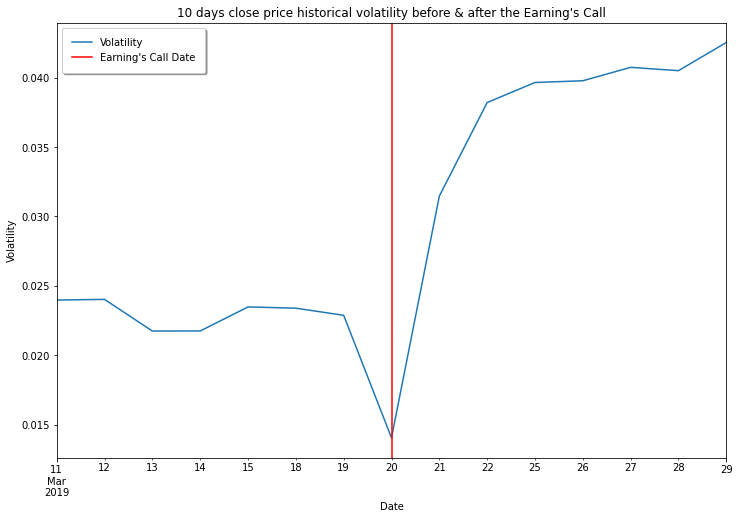

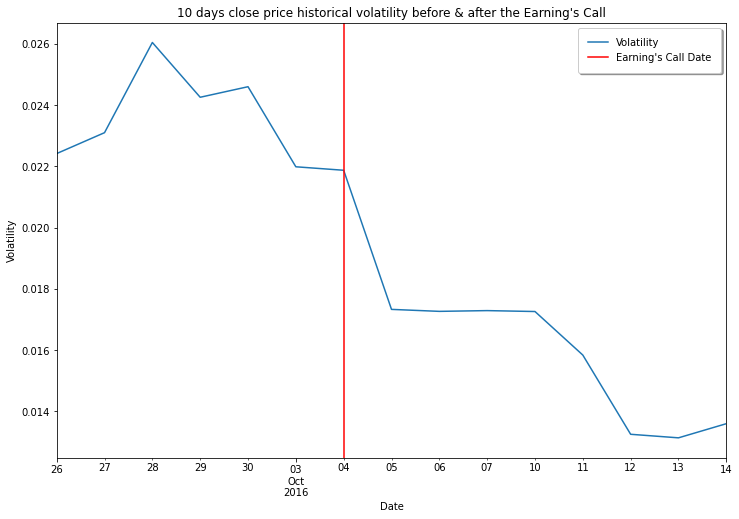

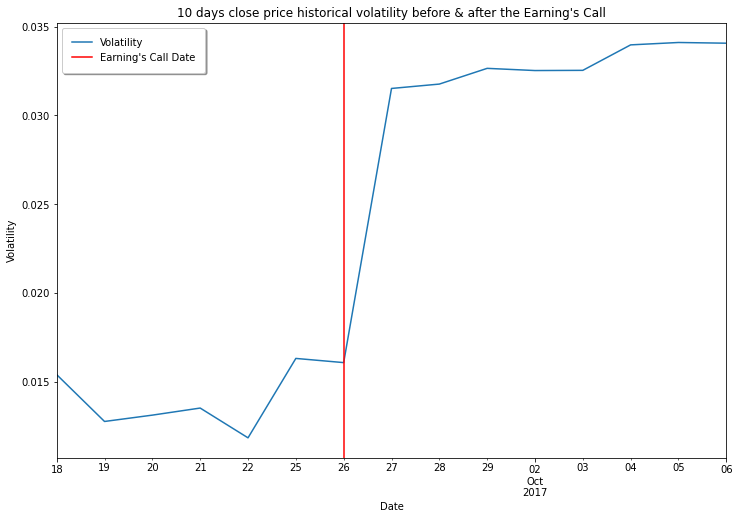

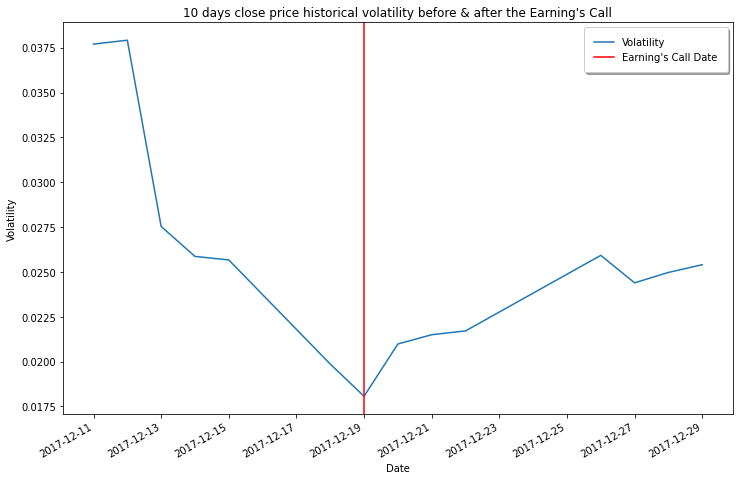

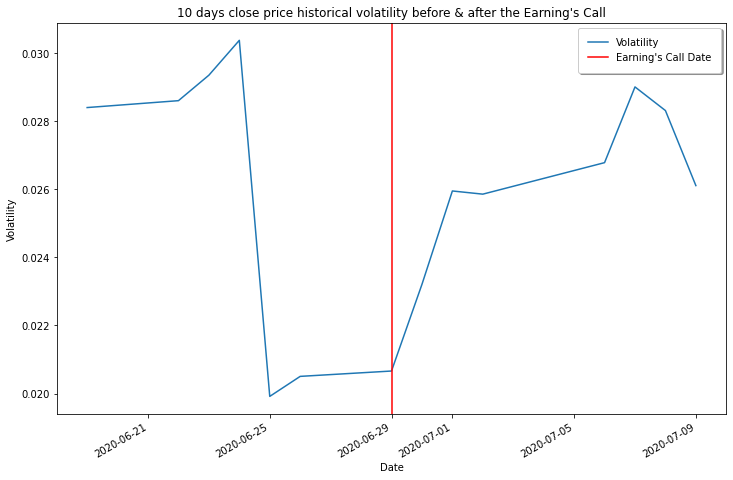

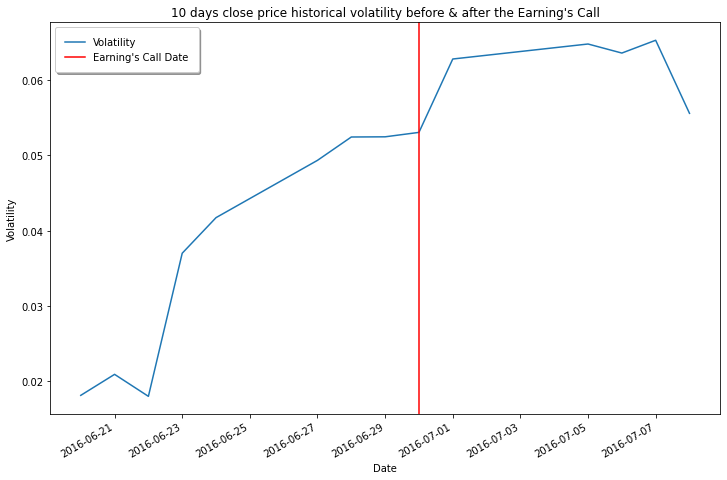

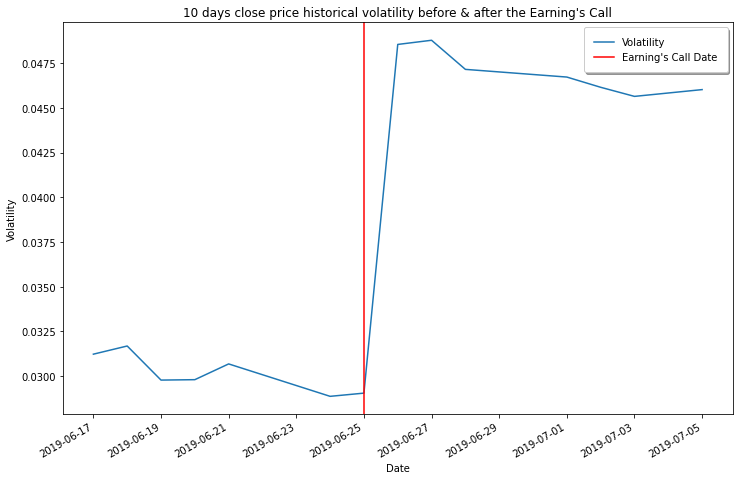

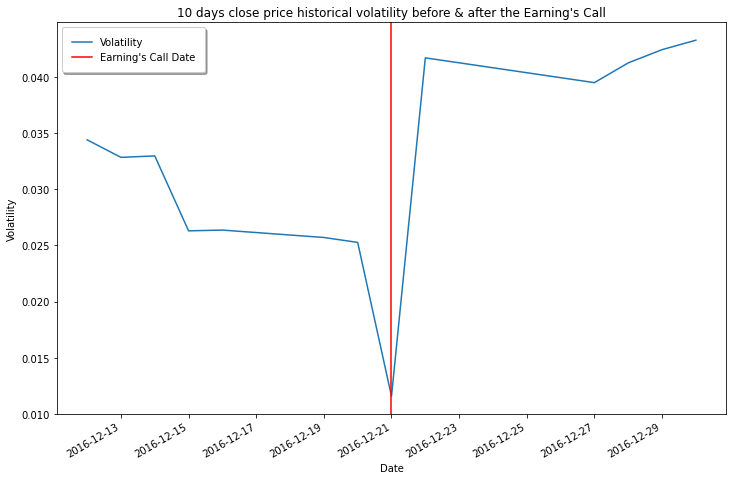

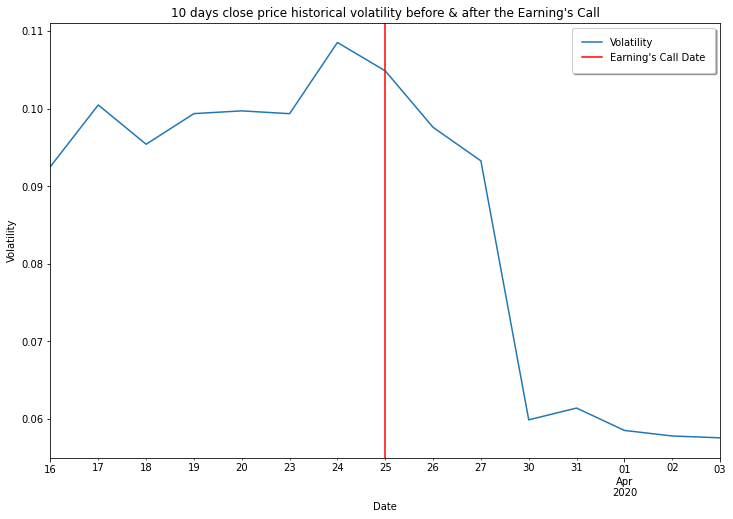

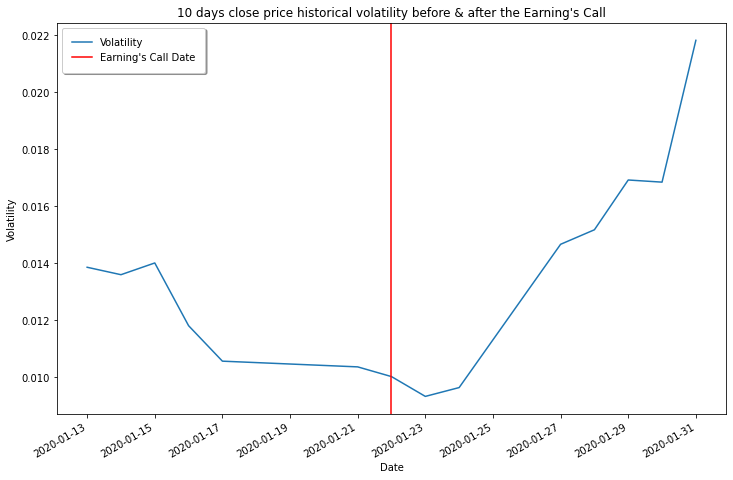

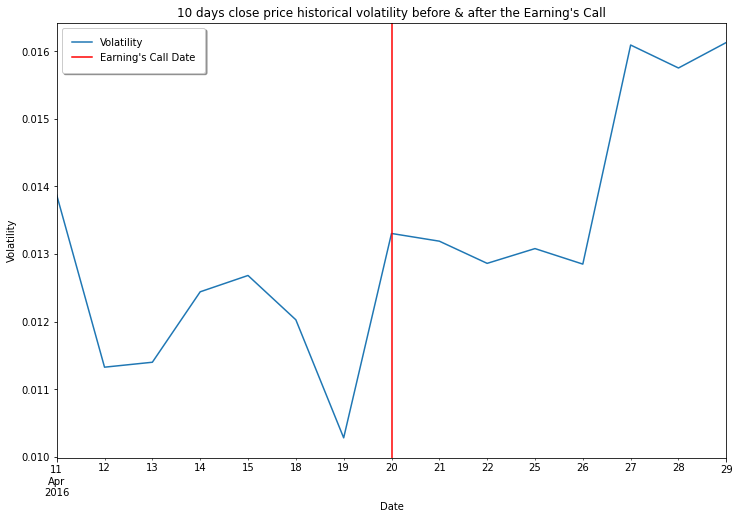

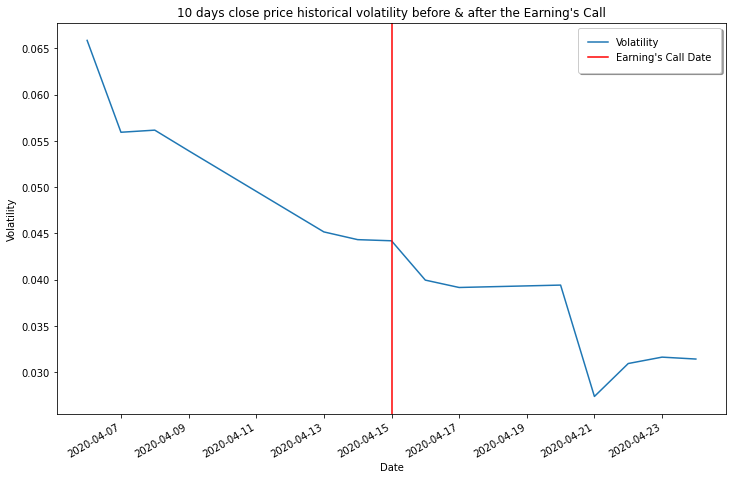

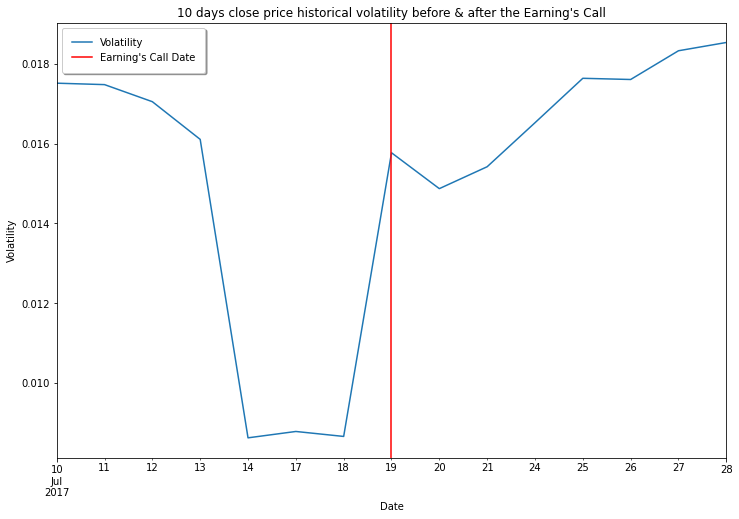

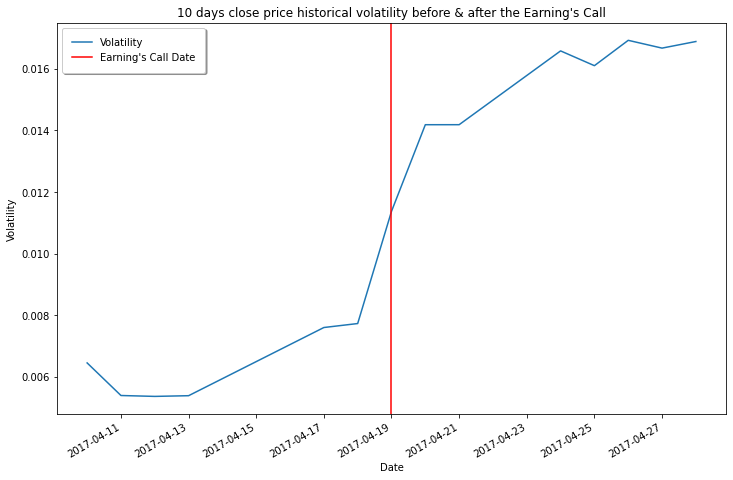

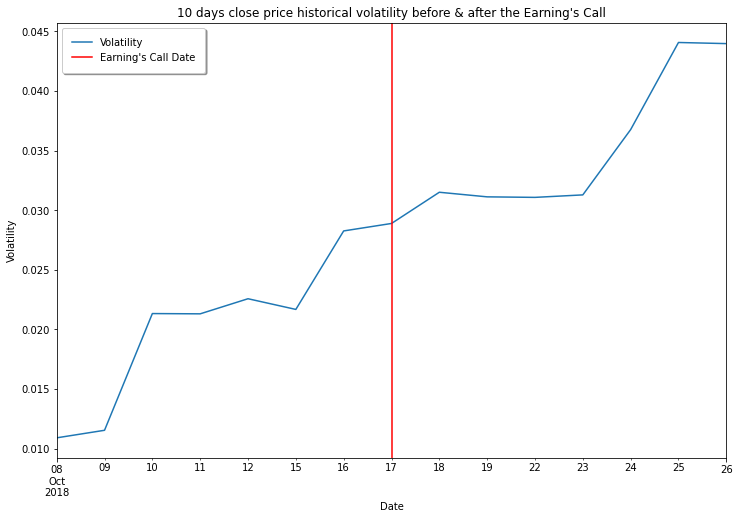

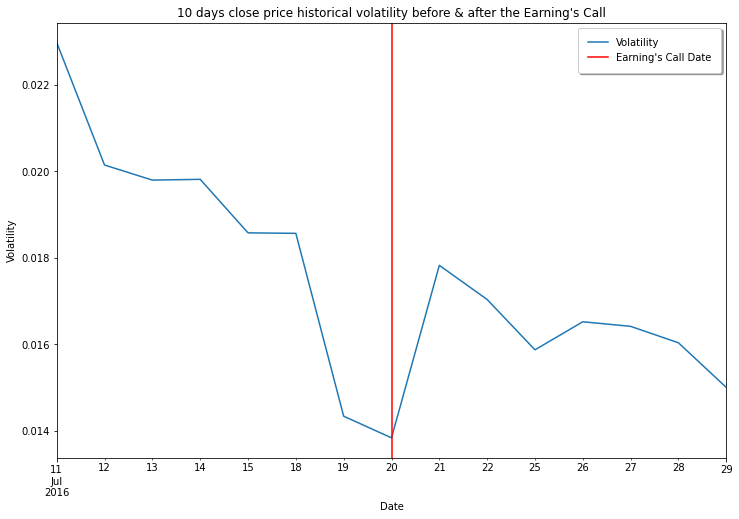

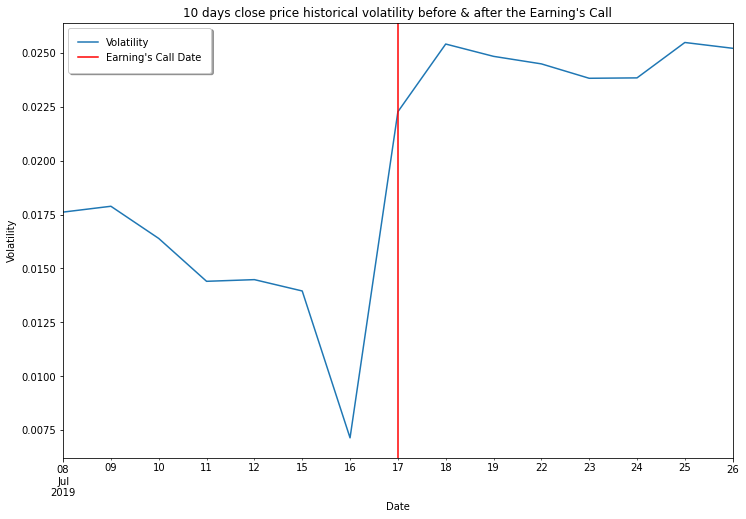

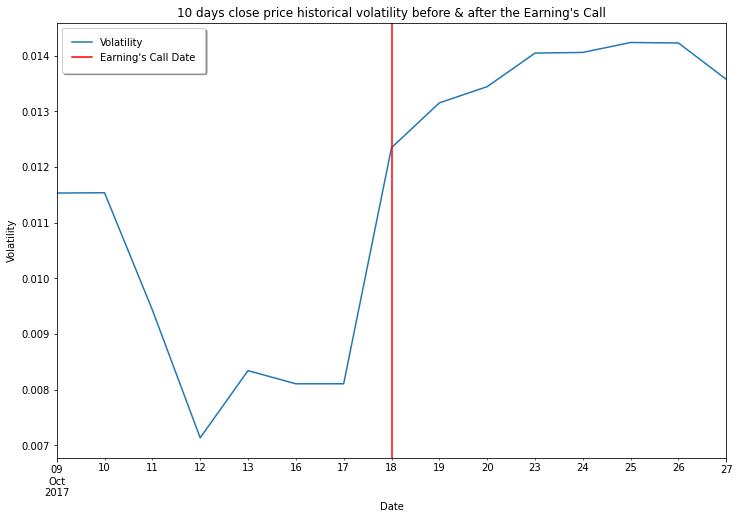

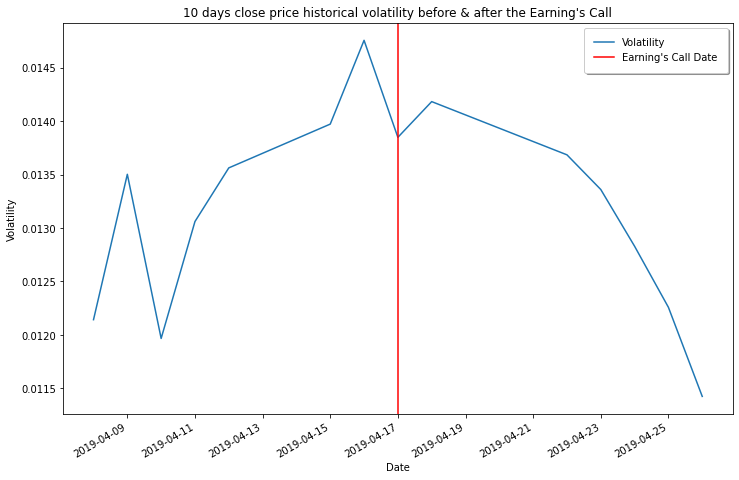

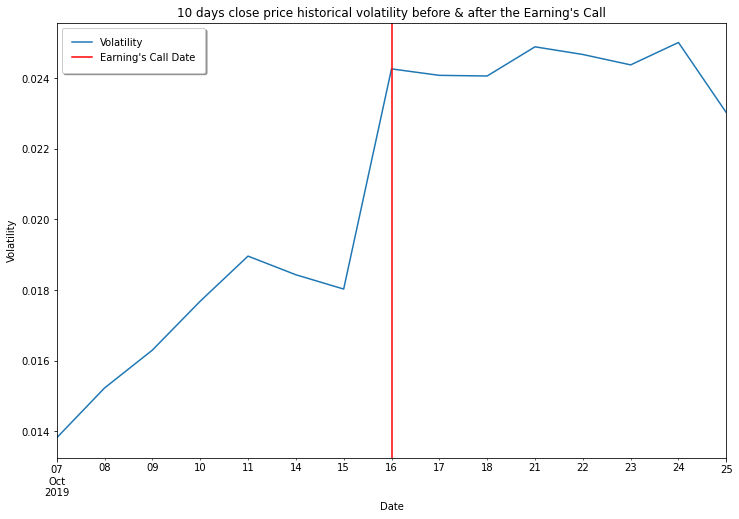

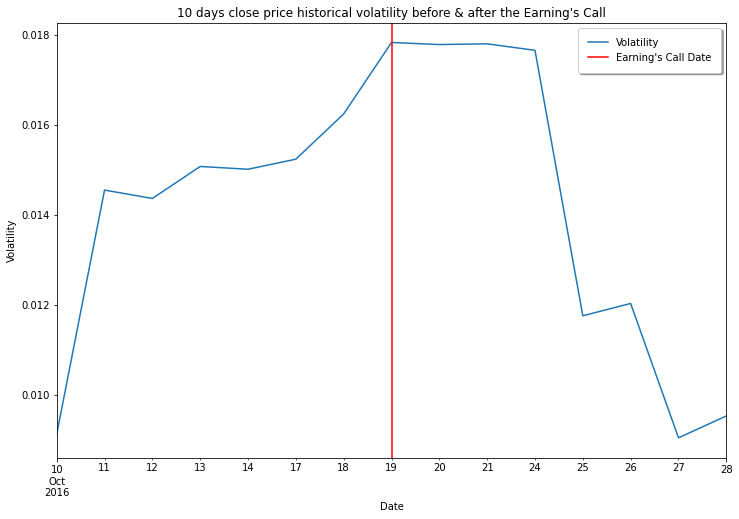

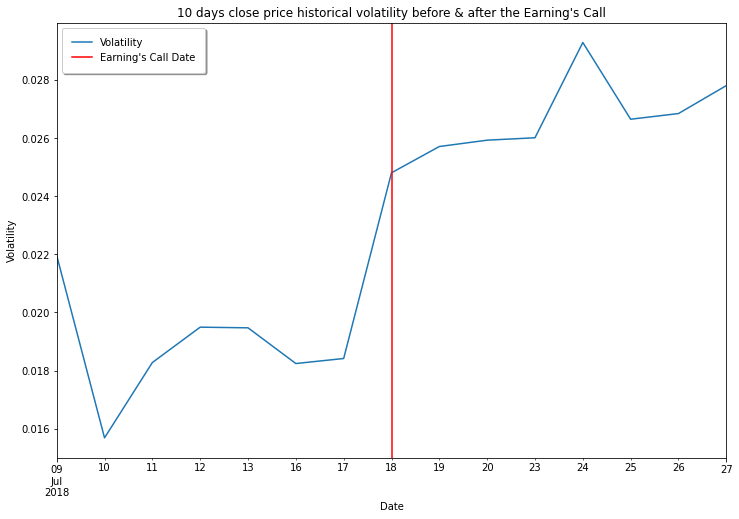

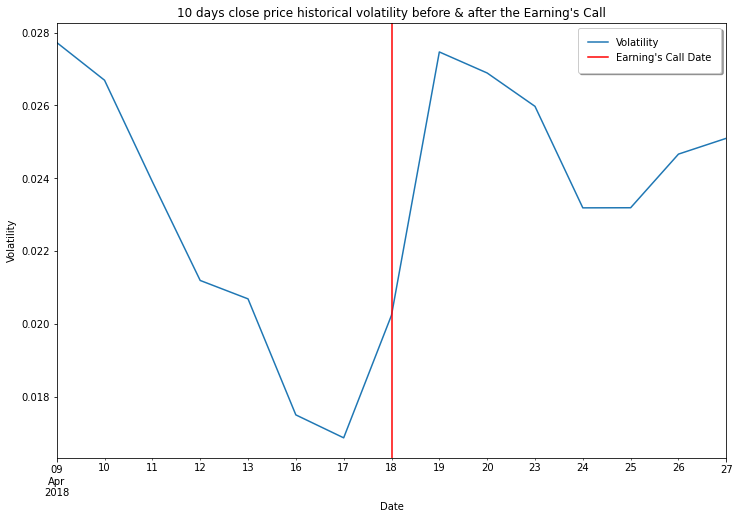

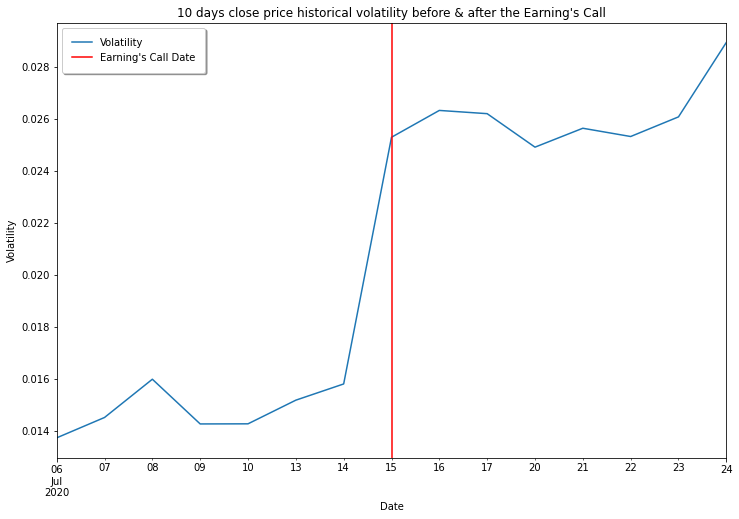

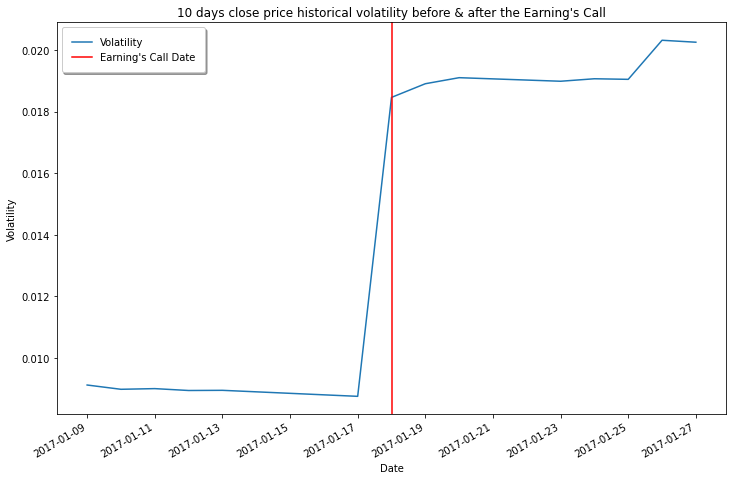

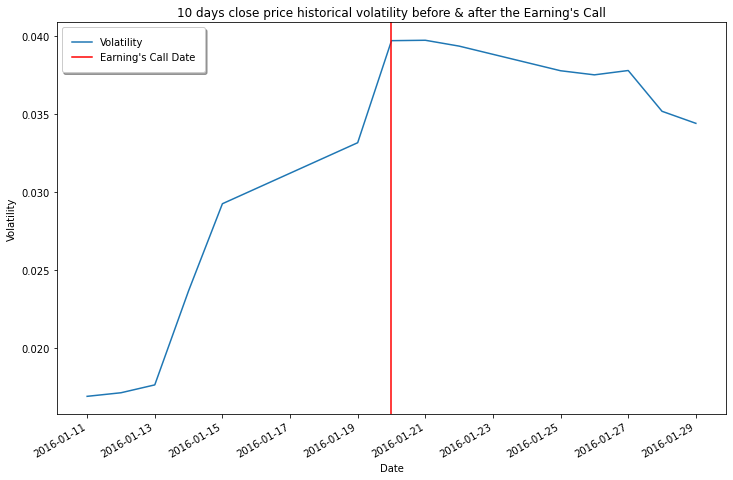

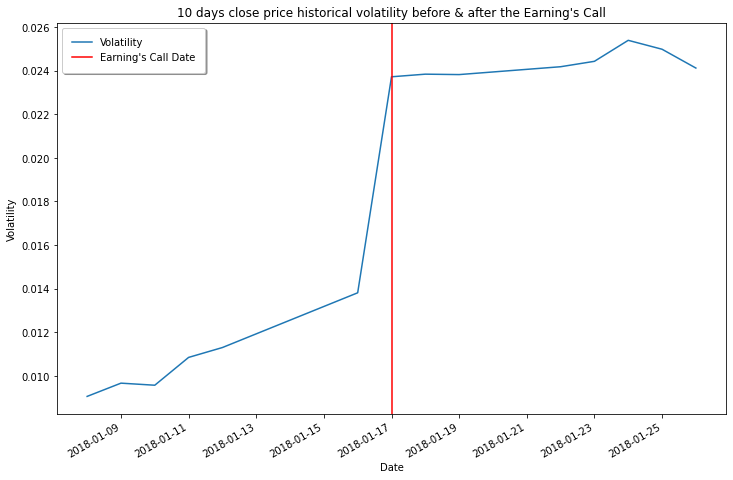

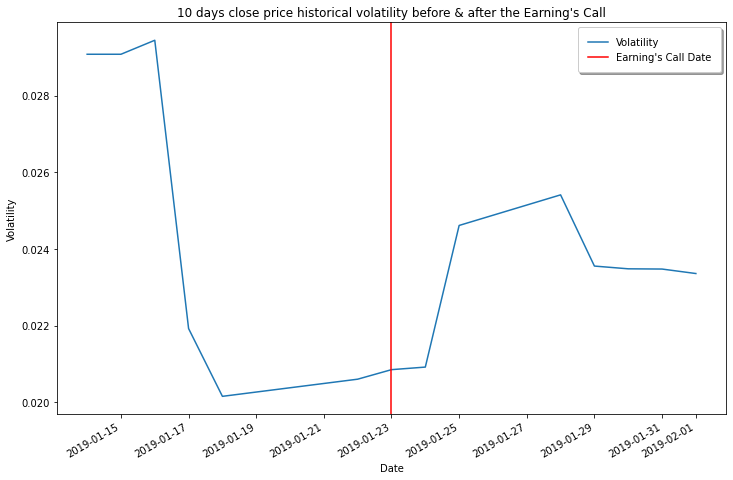

In [ ]:
#IV1 and IV2 (compound and binary)
PreQA_Compound = []
QA_Compound = []
PreQA_NP = []
QA_NP = []

#DV (delta and binary)
Volatility_delta = []
Volatility_increase = []

#CV (delta and binary)
NASDAQ_Volatility_delta = []
NASDAQ_Volatility_increase = []


#Additional data for df
call_names = []


for folder in tqdm(os.listdir('/content/drive/My Drive/PMT/Datasets/Transcripts')):
  folder_path = '/content/drive/My Drive/PMT/Datasets/Transcripts/' + folder + '/*.txt'
  for f in glob.glob(folder_path):

    call_name = f.split('/')[-1]
    preqa,qa = calls(f)

    iv = sentiment_dac(preqa,qa,470)
    dv = volatility(call_name,30)

    call_names.append(call_name)
    PreQA_Compound.append(iv[0])
    QA_Compound.append(iv[1])
    PreQA_NP.append(iv[2])
    QA_NP.append(iv[3])

    Volatility_delta.append(dv[0])
    Volatility_increase.append(dv[1])

    NASDAQ_Volatility_delta.append(dv[2])
    NASDAQ_Volatility_increase.append(dv[3])




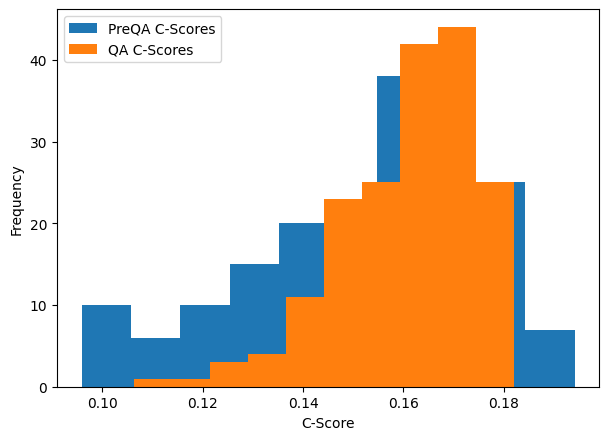

In [ ]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histograms
plt.hist(PreQA_Compound, bins=10, label='PreQA C-Scores')
plt.hist(QA_Compound, bins=10, label='QA C-Scores')
plt.gca().set(xlabel='C-Score', ylabel='Frequency');
plt.legend()

In [ ]:
#Create DF from Dictionary
dict = {'Call Name': call_names, 'PreQA C-Score': PreQA_Compound, 'PreQA B-Sentiment': PreQA_NP, 'QA C-Score': QA_Compound, 'QA B-Sentiment': QA_NP, 'Volatility Delta': Volatility_delta, 'Volatility Increase': Volatility_increase, 'NASDAQ Vol. Delta': NASDAQ_Volatility_delta, 'NASDAQ Vol. Increase': NASDAQ_Volatility_increase}
pmt_df = pd.DataFrame(dict)

#Save as .csv and .xlsx (it saves to the Output folder)
spath_csv = Path('/content/drive/My Drive/PMT/Datasets/Output/pmt_data.csv')
spath_xlsx = Path('/content/drive/My Drive/PMT/Datasets/Output/pmt_data.xlsx')

pmt_df.to_csv(spath_csv, index=False)
pmt_df.to_excel(spath_xlsx, index=False)


#[4] Multiple Linear Regression Model

In [ ]:
#Load Dataset & Preview
pmt_dataset = pd.read_csv('/content/drive/My Drive/PMT/Datasets/Output/pmt_data.csv')

pmt_dataset.head(300)

Call Name  PreQA C-Score  PreQA B-Sentiment  QA C-Score  \
0    2017-Oct-26-INTC.txt       0.176199                  1    0.162804   
1    2016-Jul-20-INTC.txt       0.163673                  1    0.170555   
2    2020-Jul-23-INTC.txt       0.151358                  1    0.155809   
3    2019-Oct-24-INTC.txt       0.154503                  1    0.166164   
4    2018-Apr-26-INTC.txt       0.171203                  1    0.149385   
..                    ...            ...                ...         ...   
174  2020-Jul-15-ASML.txt       0.175672                  1    0.130680   
175  2017-Jan-18-ASML.txt       0.163749                  1    0.140244   
176  2016-Jan-20-ASML.txt       0.173358                  1    0.156950   
177  2018-Jan-17-ASML.txt       0.158820                  1    0.142894   
178  2019-Jan-23-ASML.txt       0.098863                  1    0.106371   

     QA B-Sentiment  Volatility Delta  Volatility Increase  NASDAQ Vol. Delta  \
0                 1          0.013989                    1          -0.004814   
1                 1          0.004801                    1           0.000518   
2                 1          0.033630                    1           0.005023   
3                 1          0.010594                    1           0.003089   
4                 1         -0.001126                    0           0.002195   
..              ...               ...                  ...                ...   
174               1          0.009960                    1          -0.003369   
175               1          0.008949                    1          -0.001689   
176               1          0.012316                    1           0.004027   
177               1          0.011729                    1           0.002131   
178               1         -0.001240                    0          -0.006703   

     NASDAQ Vol. Increase  
0                       0  
1                       1  
2                       1  
3                       1  
4                       1  
..                    ...  
174                     0  
175                     0  
176                     1  
177                     1  
178                     0  

[179 rows x 9 columns]

In [ ]:
#Descriptive Statistics
pmt_desc = pmt_dataset.describe()
pmt_desc.to_excel('pmt_desc.xlsx', index=False)

pmt_desc

PreQA C-Score  PreQA B-Sentiment  QA C-Score  QA B-Sentiment  \
count     179.000000              179.0  179.000000           179.0   
mean        0.151760                1.0    0.161007             1.0   
std         0.023564                0.0    0.013383             0.0   
min         0.095856                1.0    0.106371             1.0   
25%         0.139623                1.0    0.152382             1.0   
50%         0.156245                1.0    0.163521             1.0   
75%         0.169247                1.0    0.171195             1.0   
max         0.194120                1.0    0.182113             1.0   

       Volatility Delta  Volatility Increase  NASDAQ Vol. Delta  \
count        179.000000           179.000000         179.000000   
mean           0.008784             0.865922           0.000041   
std            0.014204             0.341692           0.003267   
min           -0.026152             0.000000          -0.010814   
25%            0.001740             1.000000          -0.002362   
50%            0.005903             1.000000           0.000671   
75%            0.013872             1.000000           0.002226   
max            0.127346             1.000000           0.007437   

       NASDAQ Vol. Increase  
count            179.000000  
mean               0.564246  
std                0.497246  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

In [ ]:
#IVs: PreQA C-Score & QA C-Score
X = pmt_dataset[['PreQA C-Score', 'QA C-Score', 'NASDAQ Vol. Delta']]

#DV: Volatility Delta
Y = pmt_dataset['Volatility Delta']

#Split data into 80% training set and 20% test set
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Text(0.5, 0, 'Compound Score')

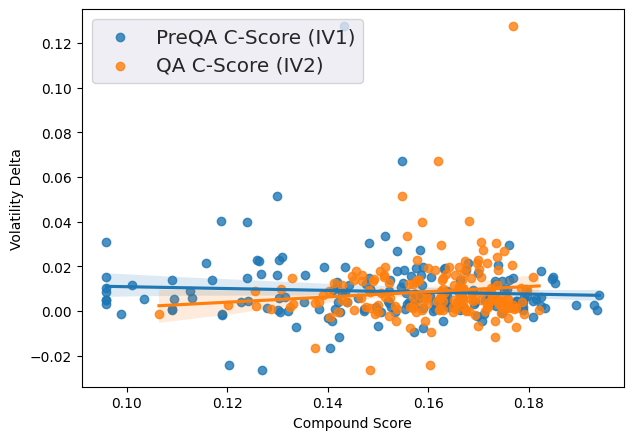

In [ ]:
#Linearity
fig, axs = plt.subplots(ncols=1)
sns.regplot(x='PreQA C-Score', y='Volatility Delta', data=pmt_dataset, ax=axs, label='PreQA C-Score (IV1)')
sns.regplot(x='QA C-Score', y='Volatility Delta', data=pmt_dataset, ax=axs, label='QA C-Score (IV2)')
sns.set(rc={'figure.figsize':(16,8)})
plt.legend(fontsize = 'large')
plt.xlabel('Compound Score')

In [ ]:
#Train Algorithm
pmt_linreg = LinearRegression()
pmt_linreg.fit(X, Y)

LinearRegression()

Text(0.5, 0, 'Residuals')

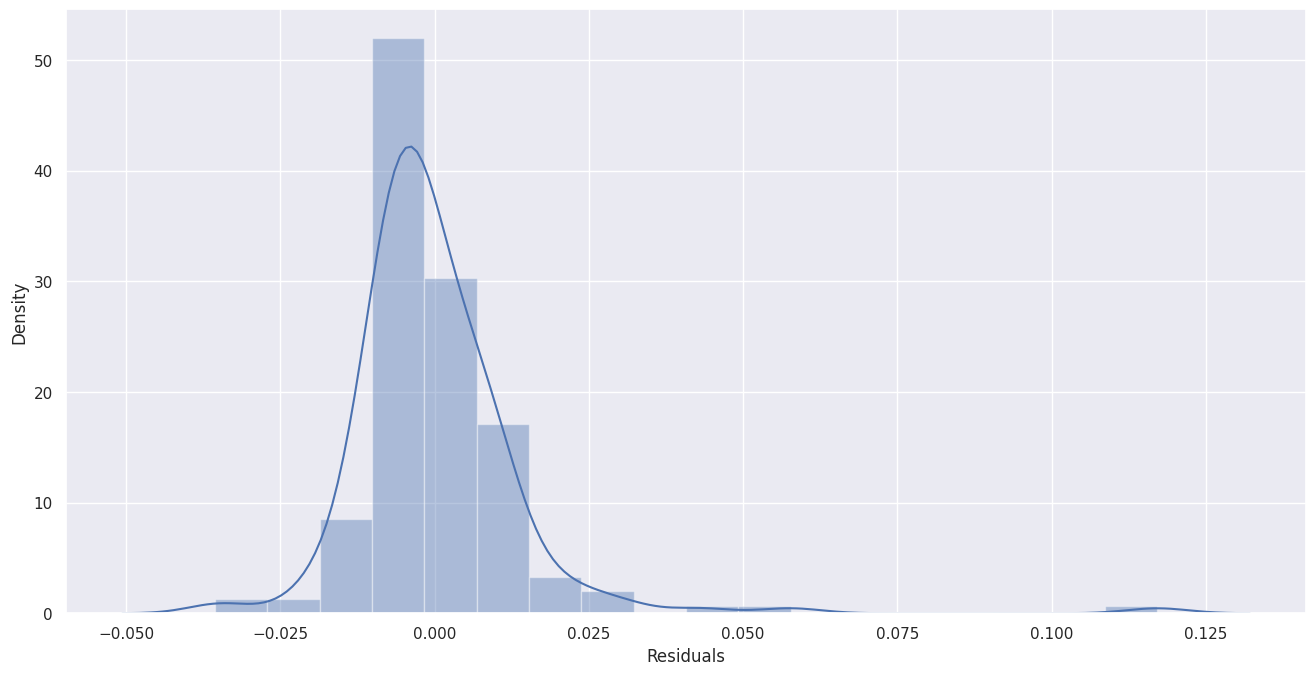

In [ ]:
predictions = pmt_linreg.predict(X)

residuals = Y - predictions

sns.distplot(residuals, bins=18)
plt.xlabel('Residuals')

In [ ]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.

    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')

    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)

    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)

    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()

    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

In [ ]:
normal_errors_assumption(pmt_linreg, X, Y)

In [ ]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')

    print('Residuals should have relative constant variance')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

In [ ]:
homoscedasticity_assumption(pmt_linreg, X, Y)

In [ ]:
#Coefficients
coeff_df = pd.DataFrame(pmt_linreg.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
#Predictions
#Y_pred = pmt_linreg.predict(X_test)
#pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
#pred_df

In [ ]:
#Code from another tutorial
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(print_model), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/PMT/Datasets/Output/pmt_mlr-ouput.png')

In [ ]:
model = ols('Y ~ X', data=pmt_dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

#Topics Researched Log:



how to calculate volatility in python https://thepythonyouneed.com/how-to-compute-volatility-in-python/

yfinance api guide https://pypi.org/project/yfinance/

.strptime converting strings into datetime objects https://www.programiz.com/python-programming/datetime/strptime

how to convert a string to a date in python https://www.educative.io/edpresso/how-to-convert-a-string-to-a-date-in-python

python regex https://www.w3schools.com/python/python_regex.asp

extract words from given string https://www.geeksforgeeks.org/python-extract-words-from-given-string/

adding days to a date in python  https://stackoverflow.com/questions/6871016/adding-days-to-a-date-in-python

how to save plot to a file using matplotlib https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/

matplotlib .legend https://matplotlib.org/stable/api/legend_api.html?highlight=legend#module-matplotlib.legend

more on .legend https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

python .strip w3schools https://www.w3schools.com/python/ref_string_strip.asp

removing stop words with NLTK https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

stop words article https://medium.com/analytics-vidhya/removing-stop-words-with-nltk-library-in-python-f33f53556cc1

cleaning stop words and doing sentiment analysis https://realpython.com/python-nltk-sentiment-analysis/

how to use or in an if statement https://pythonexamples.org/python-if-or/

how to convert df into list https://datatofish.com/convert-pandas-dataframe-to-list/

graph plotting in python https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/

how to find meean of a list https://www.guru99.com/find-average-list-python.html#:~:text=The%20formula%20to%20calculate%20average,of%20numbers%20in%20the%20list.

create a pandas dataframe from lists or dictionaries https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

how to save pandas dataframe to csv and excel https://www.projectpro.io/recipes/save-pandas-dataframe-as-csv-file

how to do linear regression in python with scikit https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

multiple linear regression https://datatofish.com/multiple-linear-regression-python/

single and multiple linear regression https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

sentiment analysis for longer texts through splitting texts into chunks https://towardsdatascience.com/how-to-apply-transformers-to-any-length-of-text-a5601410af7f

find the average of a list in python https://www.geeksforgeeks.org/find-average-list-python/

textwrap to split texts into even sized chunks https://stackoverflow.com/questions/21351275/split-a-string-to-even-sized-chunks

assumptions single linear regression python https://subscription.packtpub.com/book/data/9781789806311/1/ch01lvl1sec07/identifying-a-linear-relationship


all assumptions linear regression https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/




## Cell-metery

In [1]:
def sentiment(PreQA_final, QA_final):

  stopwords = nltk.corpus.stopwords.words("english")

  #tokenize PreQA_final and QA_final, as well as exclude punctuation & stopwords
  PreQA_tkn = [w for w in word_tokenize(PreQA_final) if w.isalpha() if w.lower() not in stopwords]
  QA_tkn = [w for w in word_tokenize(QA_final) if w.isalpha() if w.lower() not in stopwords]

  #get sentiment polarity scores (compound, neg, neu, pos)
  sia = SentimentIntensityAnalyzer()
  PreQA_ps = sia.polarity_scores(' '.join(PreQA_tkn))
  QA_ps = sia.polarity_scores(' '.join(QA_tkn))

  #define if positive (1) or negative (0)

#  for score in PreQA_ps:
  if PreQA_ps['neg'] < PreQA_ps['pos']:
      PreQA_np = 1
  else:
      PreQA_np = 0

#  for score in QA_ps:
  if QA_ps['neg'] < QA_ps['pos']:
    QA_np = 1
  else:
    QA_np = 0


  return (PreQA_ps['compound'], QA_ps['compound'], PreQA_np, QA_np)
